# AlphaPept Systems Check

This notebook will run several tests and compare the performance to MaxQuant. Depending on the machine, this can take several hours.
Each run is called via the `test_ci.py` script, which downloads files to a temporary folder which can be specified in this file.

This notebook requires the `matplotlib_venn` (`!pip install matplotlib_venn`) package.

## Reference Data

Download MaxQuant reference files. Referance MaxQuant data from `PXD006109` and `PXD010012` were taken from the paper, the others were analyzed with `MaxQuant_1.6.14`, default settings w/o second peptides and provided with the given contaminants file.

In [1]:
import os
import sys
sys.path.append(os.path.join(".."))
import test_ci

try:
    import wget
except ImportError:
    !pip install wget
    import wget
    
FILE_DICT = {}
#FILE_DICT['PXD006109_ref.txt'] = 'https://datashare.biochem.mpg.de/s/1E2G1IwgcgdsCHC/download' #OLD MQ FILES
#FILE_DICT['PXD006109_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/Fn2uxeYNL60JSd3/download'

#FILE_DICT['PXD006109_ref.txt'] = 'https://datashare.biochem.mpg.de/s/vMNferEoSoROJbb/download' #AP Files
#FILE_DICT['PXD006109_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/KLBotZbodMByigh/download'

FILE_DICT['PXD006109_ref.txt'] = 'https://datashare.biochem.mpg.de/s/fLhxQ8mVb29x9xH/download'
FILE_DICT['PXD006109_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/BkMMHPregCQgKLg/download'
FILE_DICT['PXD010012_ref.txt'] = 'https://datashare.biochem.mpg.de/s/ps226k7Fme1K0jf/download'
FILE_DICT['PXD010012_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/pyhKMrytjdDU2sX/download'
FILE_DICT['bruker_HeLa_evd.txt'] = 'https://datashare.biochem.mpg.de/s/fRcoGuwlcbH2SBJ/download'
FILE_DICT['thermo_HeLa_evd.txt'] = 'https://datashare.biochem.mpg.de/s/p4Omj9K5hHmSoDl/download'

tmp_folder = os.path.join(os.getcwd(),'temp/')


BASE_DIR = os.path.join(tmp_folder , 'test_files/') # Storarge location for test files
TEST_DIR = os.path.join(tmp_folder, 'test_temp/')
ARCHIVE_DIR = os.path.join(tmp_folder, ' test_archive/')

MONGODB_USER = 'github_actions'
MONGODB_URL = 'ci.yue0n.mongodb.net/'

if not os.path.isdir(tmp_folder):
    os.mkdir(tmp_folder)


test_ci.config_test_paths(BASE_DIR, TEST_DIR, ARCHIVE_DIR, MONGODB_USER, MONGODB_URL)

for file in FILE_DICT:
    target = os.path.join(tmp_folder, file)
    if not os.path.isfile(target):
        wget.download(FILE_DICT[file], target)
        
software_1 = 'AlphaPept'
software_2 = 'MaxQuant'

## Single Files

Compare to the single HeLa test files

### Thermo IRT

In [2]:
%run -i ../test_ci.py $tmp_folder thermo_irt

2021-06-05 01:03:22> Logging to C:\Users\admin\alphapept\logs\log_20210605010322.txt.
2021-06-05 01:03:22> Platform information:
2021-06-05 01:03:22> system     - Windows
2021-06-05 01:03:22> release    - 10
2021-06-05 01:03:22> version    - 10.0.18362
2021-06-05 01:03:22> machine    - AMD64
2021-06-05 01:03:22> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2021-06-05 01:03:22> cpu count  - 24
2021-06-05 01:03:22> ram memory - 101.2/127.7 Gb (available/total)
2021-06-05 01:03:22> 
2021-06-05 01:03:22> Python information:
2021-06-05 01:03:22> SQLAlchemy     - 1.3.22
2021-06-05 01:03:22> alphapept      - 0.3.26
2021-06-05 01:03:22> biopython      - 1.78
2021-06-05 01:03:22> click          - 7.1.2
2021-06-05 01:03:22> comtypes       - 1.1.7
2021-06-05 01:03:22> fastcore       - 1.3.5
2021-06-05 01:03:22> h5py           - 3.1.0
2021-06-05 01:03:22> lxml           - 4.6.2
2021-06-05 01:03:22> matplotlib     - 3.3.3
2021-06-05 01:03:22> nbdev          - 1.1.4
2021-06-05 01:

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:03:23> FASTA contains 247 entries.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:29<00:00, 29.82s/it]

2021-06-05 01:03:53> Digested 247 proteins and generated 50,840 spectra
2021-06-05 01:03:53> Database saved to F:\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 0.02 GB



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:03:53> Processing 1 files for step raw_conversion
2021-06-05 01:03:53> File F:\alphapept\sandbox\temp/test_temp\thermo_IRT has extension .raw - converting from Thermo.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:31<00:00, 31.28s/it]


2021-06-05 01:03:57> File conversion complete. Extracted 2,603 precursors.
2021-06-05 01:03:57> File conversion of file F:\alphapept\sandbox\temp/test_temp\thermo_IRT.raw complete.
2021-06-05 01:03:57> Cupy is not available


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:03:59> Processing 1 files for step find_features
2021-06-05 01:03:59> No *.hdf file with features found for F:\alphapept\sandbox\temp/test_temp\thermo_IRT.ms_data.hdf. Adding to feature finding list.
2021-06-05 01:03:59> Feature finding on F:\alphapept\sandbox\temp/test_temp\thermo_IRT.raw
2021-06-05 01:03:59> Hill extraction with centroid_tol 8 and max_gap 2
2021-06-05 01:04:01> Number of hills 45,516, len = 20.18
2021-06-05 01:04:01> Repeating hill extraction with centroid_tol 5.10
2021-06-05 01:04:02> Number of hills 52,919, len = 21.29
2021-06-05 01:04:08> After split hill_ptrs 79,545
2021-06-05 01:04:10> After filter hill_ptrs 77,220
2021-06-05 01:04:23> Extracting hill stats complete
2021-06-05 01:04:25> Found 7,527 pre isotope patterns.
2021-06-05 01:04:40> Extracted 7,604 isotope patterns.
2021-06-05 01:04:47> Report complete.
2021-06-05 01:04:47> Note: NumExpr detected 24 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-06-05 01:04:47> 


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:04:47> Starting first search.
2021-06-05 01:04:47> Processing 1 files for step search_db
2021-06-05 01:04:47> Calibrating fragments
2021-06-05 01:04:49> Performing search on 3,226 query and 50,840 db entries with frag_tol = 30.00 and prec_tol = 30.00.


  0%|                                                                                            | 0/1 [00:51<?, ?it/s]


2021-06-05 01:04:54> Found 53 psms.
2021-06-05 01:04:54> Extracting columns for scoring.
2021-06-05 01:05:00> Extracted columns from 53 spectra.
2021-06-05 01:05:00> Saving first_search results to F:\alphapept\sandbox\temp/test_temp\thermo_IRT.ms_data.hdf
2021-06-05 01:05:01> Search of file F:\alphapept\sandbox\temp/test_temp\thermo_IRT.raw complete.
2021-06-05 01:05:01> First search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:05:01> Processing 1 files for step calibrate_hdf
2021-06-05 01:05:01> Scoring using X-Tandem
2021-06-05 01:05:01> Last q_value 0.000 of dataset is smaller than fdr_level 0.010
2021-06-05 01:05:01> 19 target (0 decoy) of 19 PSMs. fdr 0.000000 for a cutoff of 18.90 (set fdr was 0.01)
2021-06-05 01:05:01> Not enough data points present. Skipping recalibration.
2021-06-05 01:05:01> Calibration of file F:\alphapept\sandbox\temp/test_temp\thermo_IRT.ms_data.hdf complete.
2021-06-05 01:05:01> Calibrating fragments
2021-06-05 01:05:01> Median fragment offset 0.33 - std 14.25 ppm




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:05:01> Starting second search with DB.
2021-06-05 01:05:01> Processing 1 files for step search_db
2021-06-05 01:05:01> Found calibrated prec_tol with value 7.35
2021-06-05 01:05:01> Performing search on 3,226 query and 50,840 db entries with frag_tol = 30.00 and prec_tol = 7.35.
2021-06-05 01:05:01> Found 51 psms.
2021-06-05 01:05:01> Extracting columns for scoring.
2021-06-05 01:05:01> Extracted columns from 51 spectra.
2021-06-05 01:05:01> Saving second_search results to F:\alphapept\sandbox\temp/test_temp\thermo_IRT.ms_data.hdf
2021-06-05 01:05:01> Search of file F:\alphapept\sandbox\temp/test_temp\thermo_IRT.raw complete.


  0%|                                                                                            | 0/1 [00:01<?, ?it/s]

2021-06-05 01:05:02> Second search complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:05:02> Processing 1 files for step score_hdf
2021-06-05 01:05:02> Found second search psms for scoring.
2021-06-05 01:05:02> Last q_value 0.000 of dataset is smaller than fdr_level 0.100
2021-06-05 01:05:02> 19 target (0 decoy) of 19 PSMs. fdr 0.000000 for a cutoff of 18.90 (set fdr was 0.1)
2021-06-05 01:05:02> The total number of available decoys is lower than the initial set of high scoring targets.
2021-06-05 01:05:02> ML failed. Defaulting to x_tandem score
2021-06-05 01:05:02> There are fewer high scoring targets or decoys than required by 'min_train'.
2021-06-05 01:05:02> Converting x_tandem score to probabilities
2021-06-05 01:05:02> Filter df with custom score
2021-06-05 01:05:02> Global FDR on precursor
2021-06-05 01:05:02> Last q_value 0.000 of dataset is smaller than fdr_level 0.010
2021-06-05 01:05:02> 17 target (0 decoy) of 17 PSMs. fdr 0.000000 for a cutoff of 0.10 (set fdr was 0.01)
2021-06-05 01:05:02> FDR on peptides complete. For 0.01 FDR found 19 targe


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:05:02> Fasta dict with length 247, Pept dict with length 50,842
2021-06-05 01:05:02> Extracting protein groups.





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:05:03> A total of 13 unique and 0 shared peptides.
2021-06-05 01:05:03> A total of 0 ambigious proteins
2021-06-05 01:05:03> A total of 0 unique and 0 shared peptides.
2021-06-05 01:05:03> A total of 0 ambigious proteins
2021-06-05 01:05:03> Global FDR on protein_group
2021-06-05 01:05:03> Last q_value 0.000 of dataset is smaller than fdr_level 0.010
2021-06-05 01:05:03> 3 target (0 decoy) of 3 PSMs. fdr 0.000000 for a cutoff of 0.26 (set fdr was 0.01)


2021-06-05 01:05:03> FDR on proteins complete. For 0.01 FDR found 19 targets and 0 decoys. A total of 3 proteins found.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block5_values] [items->Index(['ion_int', 'ion_types', 'naked_sequence', 'precursor', 'sequence',
       'filename', 'shortname', 'protein', 'protein_group', 'razor',
       'protein_idx', 'n_possible_proteins'],
      dtype='object')]

  pytables.to_hdf(


2021-06-05 01:05:03> Saving complete.
2021-06-05 01:05:03> Protein groups complete.
2021-06-05 01:05:03> Complete. 
2021-06-05 01:05:03> Starting profile extraction.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:05:03> LFQ complete.
2021-06-05 01:05:03> Extracting protein_summary
2021-06-05 01:05:03> Saved protein_summary of length 3 saved to F:\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2021-06-05 01:05:03> Exporting as csv.
2021-06-05 01:05:03> Saved df of length 19 saved to F:\alphapept\sandbox\temp\test_temp\results
2021-06-05 01:05:03> Settings saved to F:\alphapept\sandbox\temp\test_temp\results.yaml
2021-06-05 01:05:03> Analysis complete.


### Thermo HeLa

In [3]:
%run -i ../test_ci.py $tmp_folder thermo_hela

2021-06-05 01:05:03> Creating dir F:\alphapept\sandbox\temp/test_temp.
2021-06-05 01:05:05> Using Python version for testing
2021-06-05 01:05:05> Logging to C:\Users\admin\alphapept\logs\log_20210605010505.txt.
2021-06-05 01:05:05> Platform information:
2021-06-05 01:05:05> system     - Windows
2021-06-05 01:05:05> release    - 10
2021-06-05 01:05:05> version    - 10.0.18362
2021-06-05 01:05:05> machine    - AMD64
2021-06-05 01:05:05> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2021-06-05 01:05:05> cpu count  - 24
2021-06-05 01:05:05> ram memory - 97.9/127.7 Gb (available/total)
2021-06-05 01:05:05> 
2021-06-05 01:05:05> Python information:
2021-06-05 01:05:05> SQLAlchemy     - 1.3.22
2021-06-05 01:05:05> alphapept      - 0.3.26
2021-06-05 01:05:05> biopython      - 1.78
2021-06-05 01:05:05> click          - 7.1.2
2021-06-05 01:05:05> comtypes       - 1.1.7
2021-06-05 01:05:05> fastcore       - 1.3.5
2021-06-05 01:05:05> h5py           - 3.1.0
2021-06-05 01:05:05> l





100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.80s/it]


2021-06-05 01:05:06> FASTA contains 36,789 entries.


  0%|                                                                                            | 0/1 [01:29<?, ?it/s]




  3%|█▋                                                              | 0.02702702702702703/1 [01:26<52:00, 3207.36s/it]



  5%|███▍                                                            | 0.05405405405405406/1 [01:28<21:35, 1369.92s/it]



  8%|█████▎                                                           | 0.08108108108108109/1 [01:31<11:56, 779.72s/it]



 11%|███████                                                          | 0.10810810810810811/1 [01:32<07:25, 498.96s/it]



 14%|████████▊                                                        | 0.13513513513513514/1 [01:34<04:51, 337.60s/it]



 16%|██████████▌                                                      | 0.16216216216216217/1 [01:35<03:22, 242.09s/it]



 19%|████████████▍                                                     | 0.1891891891891892/1 [01:37<02:26, 180.14s/it]



 22%|██████████

2021-06-05 01:07:44> Digested 36,789 proteins and generated 9,107,982 spectra
2021-06-05 01:09:14> Database saved to F:\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 3.42 GB


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:09:29> Processing 1 files for step raw_conversion
2021-06-05 01:09:29> File F:\alphapept\sandbox\temp/test_temp\thermo_HeLa has extension .raw - converting from Thermo.
2021-06-05 01:11:42> File conversion complete. Extracted 120,226 precursors.
2021-06-05 01:11:44> File conversion of file F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:11:44> Processing 1 files for step find_features
2021-06-05 01:11:44> No *.hdf file with features found for F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf. Adding to feature finding list.
2021-06-05 01:11:44> Feature finding on F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw
2021-06-05 01:11:44> Hill extraction with centroid_tol 8 and max_gap 2


  0%|                                                                                            | 0/1 [02:19<?, ?it/s]


2021-06-05 01:11:50> Number of hills 1,105,353, len = 17.35
2021-06-05 01:11:50> Repeating hill extraction with centroid_tol 5.87
2021-06-05 01:11:56> Number of hills 1,227,331, len = 19.44
2021-06-05 01:12:16> After split hill_ptrs 1,635,903
2021-06-05 01:12:17> After filter hill_ptrs 1,585,989
2021-06-05 01:15:23> Extracting hill stats complete


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [10:34<00:00, 634.24s/it]


2021-06-05 01:15:45> Found 190,099 pre isotope patterns.
2021-06-05 01:18:18> Extracted 232,755 isotope patterns.
2021-06-05 01:18:21> Report complete.
2021-06-05 01:18:21> Matching features to query data.
2021-06-05 01:18:23> Saving feature table.
2021-06-05 01:18:23> Feature table saved to F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2021-06-05 01:18:23> Saving features.
2021-06-05 01:18:23> Feature finding of file F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:18:23> Starting first search.
2021-06-05 01:18:23> Processing 1 files for step search_db
2021-06-05 01:18:24> Calibrating fragments


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2021-06-05 01:18:42> Performing search on 260,709 query and 9,107,982 db entries with frag_tol = 30.00 and prec_tol = 30.00.
2021-06-05 01:23:13> Found 721,322 psms.
2021-06-05 01:23:14> Extracting columns for scoring.


  0%|                                                                                            | 0/1 [11:48<?, ?it/s]


2021-06-05 01:24:58> Extracted columns from 721,322 spectra.
2021-06-05 01:24:58> Saving first_search results to F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2021-06-05 01:25:01> Search of file F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.
2021-06-05 01:25:35> First search complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:25:35> Processing 1 files for step calibrate_hdf
2021-06-05 01:25:36> Scoring using X-Tandem
2021-06-05 01:25:38> 38,806 target (388 decoy) of 106347 PSMs. fdr 0.009998 for a cutoff of 27.02 (set fdr was 0.01)
2021-06-05 01:25:41> Calibration of file F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf complete.
2021-06-05 01:25:41> Calibrating fragments
2021-06-05 01:25:43> Median fragment offset -6.37 - std 13.75 ppm




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:25:43> Starting second search with DB.
2021-06-05 01:25:43> Processing 1 files for step search_db
2021-06-05 01:25:43> Found calibrated prec_tol with value 3.08
2021-06-05 01:25:46> Performing search on 260,709 query and 9,107,982 db entries with frag_tol = 30.00 and prec_tol = 3.08.


  0%|                                                                                            | 0/1 [00:43<?, ?it/s]

2021-06-05 01:26:19> Found 390,214 psms.


2021-06-05 01:26:19> Extracting columns for scoring.


  0%|                                                                                            | 0/1 [08:12<?, ?it/s]


2021-06-05 01:27:15> Extracted columns from 390,214 spectra.
2021-06-05 01:27:15> Saving second_search results to F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2021-06-05 01:27:17> Search of file F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.
2021-06-05 01:27:48> Second search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:27:49> Processing 1 files for step score_hdf
2021-06-05 01:27:50> Found second search psms for scoring.
2021-06-05 01:27:56> 62,821 target (6,282 decoy) of 89489 PSMs. fdr 0.099998 for a cutoff of 20.81 (set fdr was 0.1)
2021-06-05 01:27:57> Training & cross-validation on 13202 targets and 13201 decoys
2021-06-05 01:28:17> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 200}
2021-06-05 01:28:18> The train accuracy was 0.9375449759497027
2021-06-05 01:28:18> Testing on 52807 targets and 52808 decoys
2021-06-05 01:28:18> The test accuracy was 0.9120768830185106
2021-06-05 01:28:18> Top features {'y_hits': 0.25201998880892984, 'x_tandem': 0.19904685994420376, 'hits': 0.17195714349201746, 'matched_ion_fraction': 0.07454271584891049, 'n_ions': 0.042067537454321444, 'matched_int_ratio': 0.04114609590298047, 'matched_int': 0.028741739095552207, 'n_missed': 0.028141098265042186, 'b_hits': 0.019242241955068257, 'dist': 0.0


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:28:42> Fasta dict with length 36,789, Pept dict with length 9,107,988
2021-06-05 01:28:42> Extracting protein groups.





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:28:43> A total of 42,940 unique and 2,906 shared peptides.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2021-06-05 01:28:44> A total of 889 ambigious proteins
2021-06-05 01:28:44> A total of 486 unique and 28 shared peptides.
2021-06-05 01:28:44> A total of 28 ambigious proteins
2021-06-05 01:28:44> Global FDR on protein_group
2021-06-05 01:28:45> 5,871 target (58 decoy) of 7082 PSMs. fdr 0.009879 for a cutoff of 0.95 (set fdr was 0.01)
2021-06-05 01:28:45> FDR on proteins complete. For 0.01 FDR found 52,093 targets and 63 decoys. A total of 5,929 proteins found.
2021-06-05 01:28:47> Saving complete.
2021-06-05 01:28:47> Protein groups complete.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['ion_int', 'ion_types', 'naked_sequence', 'precursor', 'sequence',
       'filename', 'shortname', 'protein', 'protein_group', 'razor',
       'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2021-06-05 01:28:48> Complete. 
2021-06-05 01:28:48> Starting profile extraction.



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.24it/s]

2021-06-05 01:28:48> LFQ complete.
2021-06-05 01:28:48> Extracting protein_summary
2021-06-05 01:28:48> Saved protein_summary of length 5,929 saved to F:\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2021-06-05 01:28:48> Exporting as csv.
2021-06-05 01:28:50> Saved df of length 52,156 saved to F:\alphapept\sandbox\temp\test_temp\results
2021-06-05 01:28:53> Settings saved to F:\alphapept\sandbox\temp\test_temp\results.yaml
2021-06-05 01:28:53> Analysis complete.


In [4]:
try:
    import matplotlib_venn
except ModuleNotFoundError:
    !pip install matplotlib_venn
    import matplotlib_venn

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.71s/it]


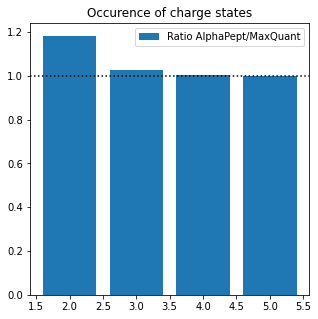

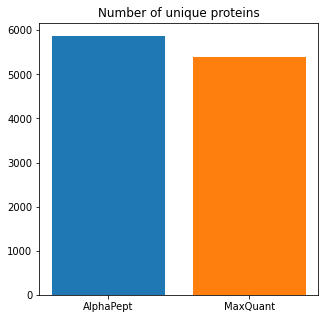

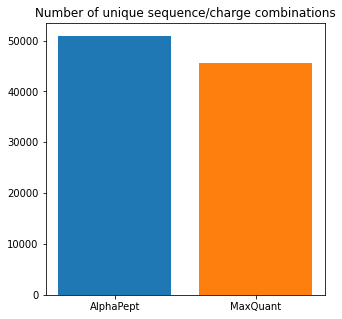

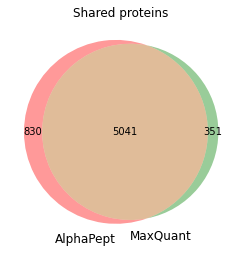

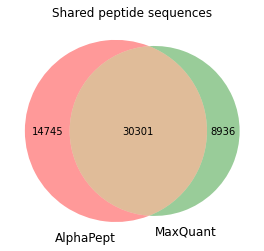

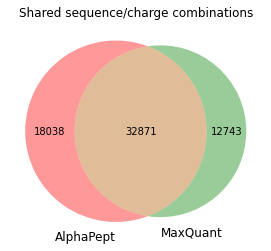

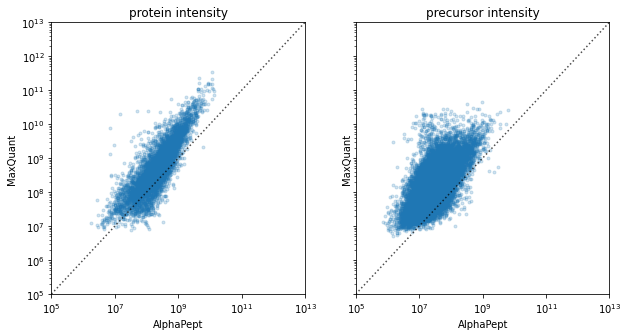

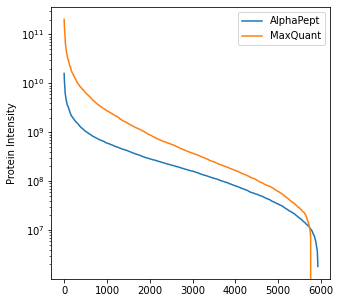

In [5]:
from test_helper import prepare_files, compare_field, compare_populations, compare_intensities, protein_rank
import os

df1, df2 = prepare_files(os.path.join(TEST_DIR,'results.hdf'), os.path.join(tmp_folder,'thermo_HeLa_evd.txt'))
for field in ['charge','protein','precursor']:
    compare_field(df1, df2, software_1, software_2, field)
    
for field in ['protein','sequence','precursor']:
    compare_populations(df1, df2, software_1, software_2, field)
    
compare_intensities(df1, df2,software_1, software_2)

protein_rank(df1, df2,software_1, software_2)

### Calling custom steps of the pipeline

Work with already processed results and call individual steps

--- ML ---
2021-06-05 01:29:05> 62,821 target (6,282 decoy) of 89489 PSMs. fdr 0.099998 for a cutoff of 20.81 (set fdr was 0.1)
2021-06-05 01:29:05> Training & cross-validation on 13202 targets and 13201 decoys
2021-06-05 01:29:23> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 200}
2021-06-05 01:29:23> The train accuracy was 0.9375449759497027
2021-06-05 01:29:23> Testing on 52807 targets and 52808 decoys
2021-06-05 01:29:24> The test accuracy was 0.9120768830185106
2021-06-05 01:29:24> Top features {'y_hits': 0.25201998880892984, 'x_tandem': 0.19904685994420376, 'hits': 0.17195714349201746, 'matched_ion_fraction': 0.07454271584891049, 'n_ions': 0.042067537454321444, 'matched_int_ratio': 0.04114609590298047, 'matched_int': 0.028741739095552207, 'n_missed': 0.028141098265042186, 'b_hits': 0.019242241955068257, 'dist': 0.013153068407932624, 'mz': 0.011432925921745727, 'prec_offset_ppm': 0.009885530940336867, 'o_mass_ppm_raw': 0

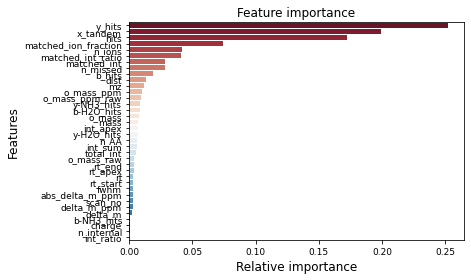

2021-06-05 01:29:24> Filter df with x_tandem score
2021-06-05 01:29:28> Global FDR on precursor
2021-06-05 01:29:28> 51,715 target (517 decoy) of 86846 PSMs. fdr 0.009997 for a cutoff of 0.76 (set fdr was 0.01)


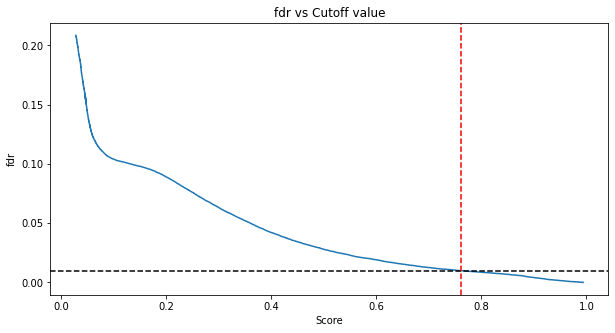

C:\Users\admin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


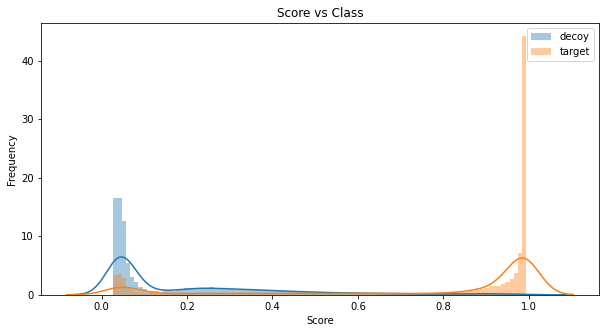

--- x! ---
2021-06-05 01:29:29> Filter df with x_tandem score
2021-06-05 01:29:30> Global FDR on precursor
2021-06-05 01:29:30> Last q_value 0.010 of dataset is smaller than fdr_level 0.010
2021-06-05 01:29:30> 51,715 target (517 decoy) of 52232 PSMs. fdr 0.009997 for a cutoff of 20.81 (set fdr was 0.01)


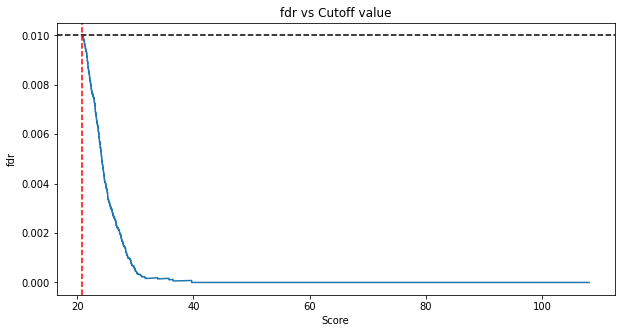

C:\Users\admin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


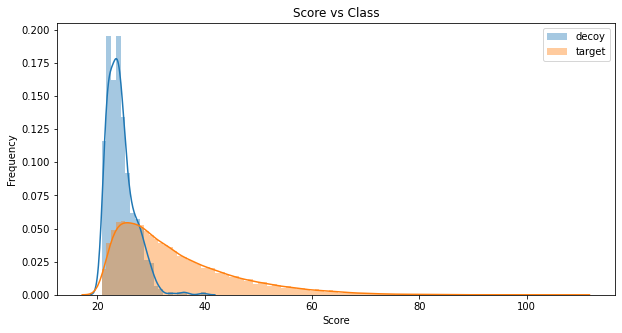

In [6]:
import alphapept.io
from alphapept.score import get_ML_features, filter_with_ML, filter_with_x_tandem, cut_global_fdr, train_RF

ms_file = alphapept.io.MS_Data_File(os.path.join(TEST_DIR,'thermo_HeLa.ms_data.hdf'))

df = ms_file.read(dataset_name='second_search')
df = get_ML_features(df)

print('--- ML ---')
cv, features = train_RF(df, plot=True)
df = filter_with_ML(df, cv, features = features)
df = cut_global_fdr(df, analyte_level='precursor',  plot=True)

print('--- x! ---')
df = filter_with_x_tandem(df)
df = cut_global_fdr(df, analyte_level='precursor',  plot=True)

# Quantification Test

This notebook will run `PXD006109` and `PXD010012` and compare the quantificaiton performance.

## PXD006109

In [7]:
%run -i ../test_ci.py $tmp_folder PXD006109 
#test_ci.main(runtype="PXD006109", new_files=False)

2021-06-05 01:29:32> Creating dir F:\alphapept\sandbox\temp/test_temp.
2021-06-05 01:29:39> Using Python version for testing
2021-06-05 01:29:39> Logging to C:\Users\admin\alphapept\logs\log_20210605012939.txt.
2021-06-05 01:29:39> Platform information:
2021-06-05 01:29:39> system     - Windows
2021-06-05 01:29:39> release    - 10
2021-06-05 01:29:39> version    - 10.0.18362
2021-06-05 01:29:39> machine    - AMD64
2021-06-05 01:29:39> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2021-06-05 01:29:39> cpu count  - 24
2021-06-05 01:29:39> ram memory - 90.9/127.7 Gb (available/total)
2021-06-05 01:29:39> 
2021-06-05 01:29:39> Python information:
2021-06-05 01:29:39> SQLAlchemy     - 1.3.22
2021-06-05 01:29:39> alphapept      - 0.3.26
2021-06-05 01:29:39> biopython      - 1.78
2021-06-05 01:29:39> click          - 7.1.2
2021-06-05 01:29:39> comtypes       - 1.1.7
2021-06-05 01:29:39> fastcore       - 1.3.5
2021-06-05 01:29:39> h5py           - 3.1.0
2021-06-05 01:29:39> l


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:29:40> FASTA contains 43,752 entries.



  2%|█▍                                                             | 0.022727272727272728/1 [01:01<44:16, 2718.68s/it]
  5%|██▊                                                            | 0.045454545454545456/1 [01:02<18:05, 1137.58s/it]
  7%|████▍                                                            | 0.06818181818181818/1 [01:05<10:33, 680.25s/it]
  9%|█████▉                                                           | 0.09090909090909091/1 [01:12<08:10, 539.09s/it]
 11%|███████▍                                                         | 0.11363636363636363/1 [01:28<08:44, 591.82s/it]
 14%|████████▊                                                        | 0.13636363636363635/1 [01:30<06:01, 418.90s/it]
 16%|██████████▌                                                       | 0.1590909090909091/1 [01:32<04:18, 307.93s/it]
 18%|███████████▊                                                     | 0.18181818181818182/1 [01:33<03:06, 228.18s/it]
 20%|█████████████▎                    

2021-06-05 01:32:00> Digested 43,752 proteins and generated 6,163,992 spectra
2021-06-05 01:33:01> Database saved to F:\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 2.33 GB


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:33:11> Processing 6 files for step raw_conversion
2021-06-05 01:33:11> AlphaPool was set to 24 processes. Setting max to 24.


 17%|██████████▊                                                      | 0.16666666666666666/1 [01:24<07:03, 508.61s/it]

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:34:36> Processing 6 files for step find_features
2021-06-05 01:34:36> Setting Process limit to 12
2021-06-05 01:34:36> AlphaPool was set to 12 processes. Setting max to 12.




 17%|██████████▋                                                     | 0.16666666666666666/1 [06:49<34:06, 2455.90s/it]

 50%|████████████████████████████████████████▌                                        | 0.5/1 [06:54<05:24, 649.25s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:41:31> Starting first search.
2021-06-05 01:41:31> Processing 6 files for step search_db
2021-06-05 01:41:31> Searching. Setting Process limit to 12.
2021-06-05 01:41:31> AlphaPool was set to 12 processes. Setting max to 12.





 17%|██████████▋                                                     | 0.16666666666666666/1 [03:58<19:50, 1428.06s/it]


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [12:23<00:00, 743.79s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [10:58<00:00, 658.73s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [15:57<00:00, 957.69s/it]


2021-06-05 01:45:54> First search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:45:54> Processing 6 files for step calibrate_hdf
2021-06-05 01:45:54> AlphaPool was set to 24 processes. Setting max to 24.


 17%|███████████                                                       | 0.16666666666666666/1 [00:15<01:15, 90.21s/it]
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:46:09> Starting second search with DB.
2021-06-05 01:46:09> Processing 6 files for step search_db
2021-06-05 01:46:09> Searching. Setting Process limit to 12.
2021-06-05 01:46:09> AlphaPool was set to 12 processes. Setting max to 12.



 17%|██████████▊                                                      | 0.16666666666666666/1 [01:02<05:14, 377.60s/it]
100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:23<00:00, 83.85s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [05:53<00:00, 353.69s/it]


2021-06-05 01:47:36> Second search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:47:36> Processing 6 files for step score_hdf
2021-06-05 01:47:36> AlphaPool was set to 24 processes. Setting max to 24.


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:28<00:00, 88.17s/it]


2021-06-05 01:49:16> Total deviation before calibration {'mz': 4.008259811580108e-06, 'rt': 7.577977510100984}
2021-06-05 01:49:16> Mean deviation before calibration {'mz': 2.6721732077200716e-07, 'rt': 0.505198500673399}
2021-06-05 01:49:16> Solving equation system
2021-06-05 01:49:16> Regression score is 0.999775141268965
2021-06-05 01:49:16> Solving equation system complete.
2021-06-05 01:49:16> Applying offset
2021-06-05 01:49:16> Saving F:\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_1.ms_data.hdf - peptide_fdr.
2021-06-05 01:49:16> Saving F:\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_1.ms_data.hdf - feature_table.
2021-06-05 01:49:16> Saving F:\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_2.ms_data.hdf - peptide_fdr.
2021-06-05 01:49:17> Saving F:\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_2.ms_data.hdf - feature_table.
2021-06-05 01:49:17> Saving F:\alphapept\sandbox\temp/test_temp\PXD006109_HeLa12_3.ms_data.hdf - peptide_fdr.
2021-06-05 01:49:17> Saving 

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:49:31> Fasta dict with length 43,752, Pept dict with length 6,163,998
2021-06-05 01:49:31> Extracting protein groups.




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2021-06-05 01:49:34> A total of 58,599 unique and 11,719 shared peptides.
2021-06-05 01:49:38> A total of 2022 ambigious proteins
2021-06-05 01:49:39> A total of 1,704 unique and 219 shared peptides.
2021-06-05 01:49:39> A total of 205 ambigious proteins
2021-06-05 01:49:41> Global FDR on protein_group
2021-06-05 01:49:41> 7,007 target (70 decoy) of 10637 PSMs. fdr 0.009990 for a cutoff of 0.91 (set fdr was 0.01)
2021-06-05 01:49:43> FDR on proteins complete. For 0.01 FDR found 252,487 targets and 226 decoys. A total of 7,077 proteins found.
2021-06-05 01:49:54> Saving complete.
2021-06-05 01:49:54> Protein groups complete.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['ion_int', 'ion_types', 'naked_sequence', 'precursor', 'sequence',
       'filename', 'shortname', 'protein', 'protein_group', 'razor',
       'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2021-06-05 01:49:55> Delayed Normalization.
2021-06-05 01:49:55> Setting minimum occurence to 5.0


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


2021-06-05 01:49:59> Complete. 
2021-06-05 01:49:59> Starting profile extraction.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['ion_int', 'ion_types', 'naked_sequence', 'precursor', 'sequence',
       'filename', 'shortname', 'protein', 'protein_group', 'razor',
       'protein_idx'],
      dtype='object')]

  pytables.to_hdf(
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:50:00> Preparing protein table for parallel processing.


 20%|█████████████                                                      | 0.1953370072064434/1 [00:04<00:16, 21.05s/it]

2021-06-05 01:50:04> Starting protein extraction for 7077 proteins.
2021-06-05 01:50:04> AlphaPool was set to 24 processes. Setting max to 24.


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [03:36<00:00, 244.02s/it]

2021-06-05 01:53:42> LFQ complete.
2021-06-05 01:53:42> Extracting protein_summary
2021-06-05 01:53:42> Saved protein_summary of length 7,077 saved to F:\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2021-06-05 01:53:42> Exporting as csv.
2021-06-05 01:53:53> Saved df of length 252,713 saved to F:\alphapept\sandbox\temp\test_temp\results
2021-06-05 01:53:59> Settings saved to F:\alphapept\sandbox\temp\test_temp\results.yaml
2021-06-05 01:53:59> Analysis complete.


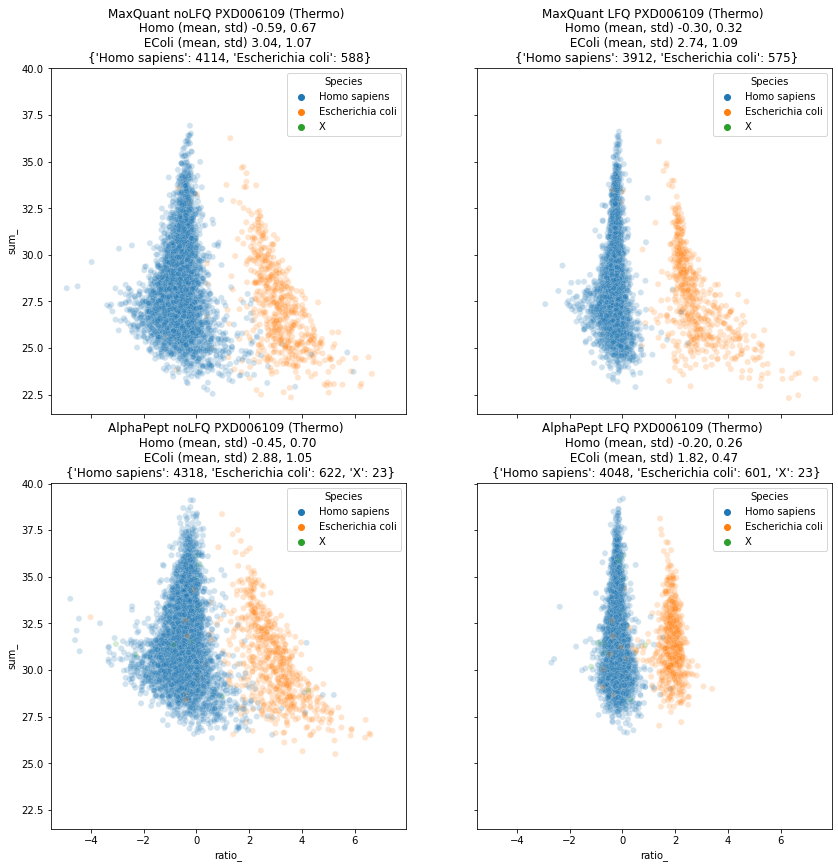

In [8]:
from test_helper import get_plot_df, add_species_column
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True,sharey=True)

ref = pd.read_csv(os.path.join(tmp_folder,'PXD006109_ref.txt'), sep='\t') 
no_rev_cont = [(x[0]!="+") & (x[1] !="+") for x in ref[["Reverse","Potential contaminant"]].values]
ref = ref[no_rev_cont]
add_species_column(ref)
ref['Species'] = ref['Species'].replace(np.nan, "X")

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = 'LFQ i'
    else:
        x = 'I'
        
    base_columns = [f"{x}ntensity Shotgun_02-01_{i}" for i in range(1,4)]
    ratio_columns = [f"{x}ntensity Shotgun_12-01_{i}" for i in range(1,4)]

    id_ = 'MaxQuant ' +_+' PXD006109 (Thermo)'
    get_plot_df(ref, base_columns, ratio_columns, axes[0,j], id_)


path = os.path.join(TEST_DIR, 'results.hdf') #TEST_DIR as set in test_ci.py
ref = pd.read_hdf(path, 'protein_table')
ref.columns = [os.path.split(_)[1].replace('.ms_data.hdf','') for _ in ref.columns]


species = []
for _ in ref.index:
    if 'HUMAN' in _:
        species.append('Homo sapiens')
    elif 'ECO' in _:
        species.append('Escherichia coli')
    else:
        species.append('X')
        
ref['Species'] = species

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = '_LFQ'
    else:
        x = ''
        
    base_columns = [f"PXD006109_HeLa2_{i}{x}" for i in range(1,4)]
    ratio_columns = [f"PXD006109_HeLa12_{i}{x}" for i in range(1,4)]

    id_ = 'AlphaPept ' +_+' PXD006109 (Thermo)'
    get_plot_df(ref, base_columns, ratio_columns, axes[1,j], id_)

plt.show()

In [ ]:
raise

## CV plot

<ipython-input-9-65f12a426c22>:22: RuntimeWarning: invalid value encountered in true_divide
  cv = np.nanstd(ref[base_columns + ratio_columns], axis=1) / np.nanmean(ref[base_columns + ratio_columns], axis=1)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
<ipython-input-9-65f12a426c22>:52: RuntimeWarning: Mean of empty slice
  cv = np.nanstd(ref[base_columns + ratio_columns], axis=1) / np.nanmean(ref[base_columns + ratio_columns], axis=1)


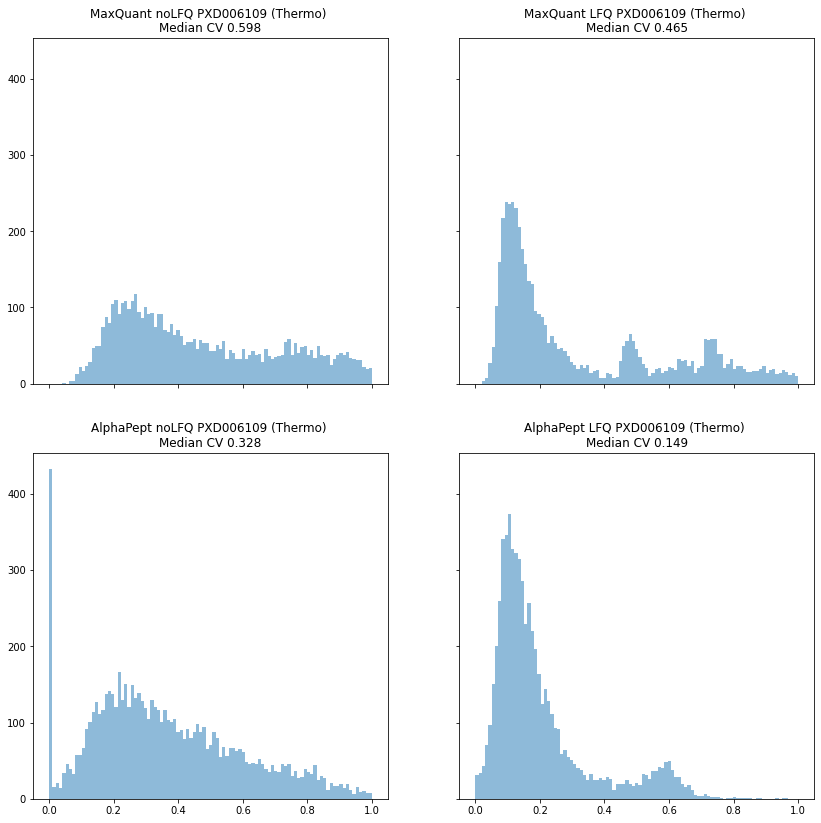

In [9]:
bins = np.linspace(0,1,100)

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True,sharey=True)

ref = pd.read_csv(os.path.join(tmp_folder,'PXD006109_ref.txt'), sep='\t') 
no_rev_cont = [(x[0]!="+") & (x[1] !="+") for x in ref[["Reverse","Potential contaminant"]].values]
ref = ref[no_rev_cont]
add_species_column(ref)
ref['Species'] = ref['Species'].replace(np.nan, "X")

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = 'LFQ i'
    else:
        x = 'I'
        
    base_columns = [f"{x}ntensity Shotgun_02-01_{i}" for i in range(1,4)]
    ratio_columns = [f"{x}ntensity Shotgun_12-01_{i}" for i in range(1,4)]

    id_ = 'MaxQuant ' +_+' PXD006109 (Thermo)'
    
    cv = np.nanstd(ref[base_columns + ratio_columns], axis=1) / np.nanmean(ref[base_columns + ratio_columns], axis=1)

    axes[0,j].hist(cv, bins = bins, label = id_, alpha = 0.5)
    axes[0,j].set_title(f'{id_} \nMedian CV {np.nanmedian(cv):.3f}')

path = os.path.join(TEST_DIR,'results.hdf') #TEST_DIR as set in test_ci.py
ref = pd.read_hdf(path, 'protein_table')
ref.columns = [os.path.split(_)[1].replace('.ms_data.hdf','') for _ in ref.columns]

species = []
for _ in ref.index:
    if 'HUMAN' in _:
        species.append('Homo sapiens')
    elif 'ECO' in _:
        species.append('Escherichia coli')
    else:
        species.append('X')
        
ref['Species'] = species

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = '_LFQ'
    else:
        x = ''
        
    base_columns = [f"PXD006109_HeLa2_{i}{x}" for i in range(1,4)]
    ratio_columns = [f"PXD006109_HeLa12_{i}{x}" for i in range(1,4)]

    id_ = 'AlphaPept ' +_+' PXD006109 (Thermo)'
    cv = np.nanstd(ref[base_columns + ratio_columns], axis=1) / np.nanmean(ref[base_columns + ratio_columns], axis=1)

    axes[1,j].hist(cv, bins = bins, label = id_, alpha = 0.5)
    axes[1,j].set_title(f'{id_} \nMedian CV {np.nanmedian(cv):.3f}')

plt.show()

## Algorithm Test

Test performance of LFQ algorithm on MaxQuant evidence file.

In [10]:
try: 
    import ipywidgets
except ModuleNotFoundError:
    !pip install ipywidgets

2021-06-05 01:54:03> Loading files
2021-06-05 01:54:06> A total of 6 files.
2021-06-05 01:54:15> A total of 6,854 proteins.
2021-06-05 01:54:26> Setting minimum occurence to 6.0


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


2021-06-05 01:54:29> Preparing protein table for parallel processing.
2021-06-05 01:54:32> Starting protein extraction for 6854 proteins.
2021-06-05 01:54:32> AlphaPool was set to 24 processes. Setting max to 24.


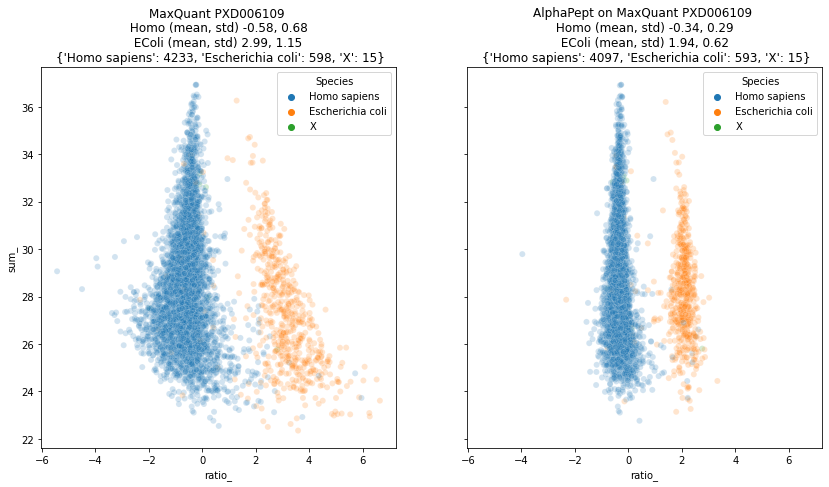

In [11]:
from alphapept.quantification import protein_profile_parallel_mq
import test_helper
import pandas as pd


evidence_path = os.path.join(tmp_folder,'PXD006109_ref_evd.txt')
protein_group_path = os.path.join(tmp_folder,'PXD006109_ref.txt')

pt = protein_profile_parallel_mq(evidence_path, protein_group_path)

ref = pd.read_csv(protein_group_path, sep='\t')
test_helper.add_species_column(ref)
species_dict = pd.Series(ref['Species'].values, index=ref['Protein IDs']).to_dict()
pt['Species'] = [species_dict[_] for _ in pt.index]


pre_lfq = [_ for _ in pt.columns if not _.endswith('_LFQ')]
lfq = [_ for _ in pt.columns if _.endswith('_LFQ')]

test_id = 'PXD006109'

fig, axes = plt.subplots(1, 2, figsize=(14,7), sharex=True,sharey=True)

ids = [f'{software_2} {test_id}', f'{software_1} on {software_2} {test_id}']

for i, ds in enumerate([pre_lfq, lfq]):

    base_columns = [_ for _ in ds if 'HeLa2' in _]
    ratio_columns = [_ for _ in ds if 'HeLa12' in _]
    test_helper.get_plot_df(pt, base_columns, ratio_columns, axes[i], ids[i])

## Normalization Checks

### Check only the delayed normalization part

2021-06-05 01:57:03> Setting minimum occurence to 4.0


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\a

2021-06-05 01:57:04> Setting minimum occurence to 4.0


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


2021-06-05 01:57:04> Setting minimum occurence to 4.0
2021-06-05 01:57:05> Setting minimum occurence to 4.0


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


2021-06-05 01:57:06> Setting minimum occurence to 4.0


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\a

2021-06-05 01:57:07> Setting minimum occurence to 4.0


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


2021-06-05 01:57:08> Setting minimum occurence to 4.0


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\a

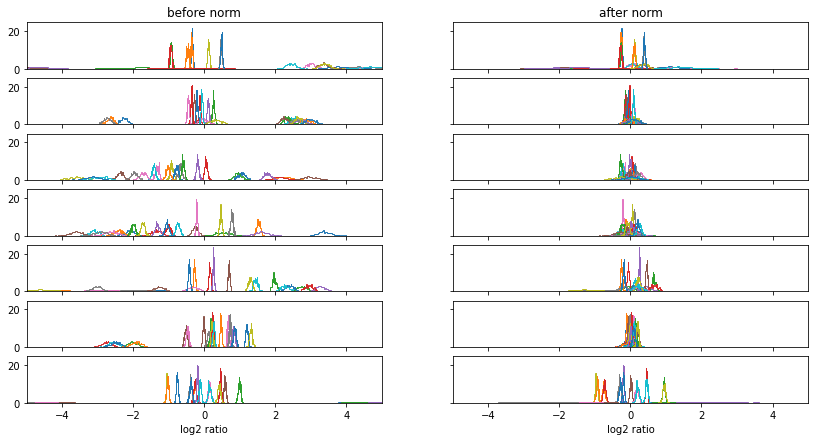

In [12]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import test_helper
from alphapept.quantification import delayed_normalization


def visualize_normalization(simulated_df, axis, value = "Intensity",show_per_colpair = True):
    
    shortnames = df["filename"].unique()
    df["namefrac"] = [f"{n}_{f}" for n,f in zip(simulated_df["filename"], simulated_df["fraction"])]
    simulated_reformat = pd.pivot_table(simulated_df, values=value, columns="namefrac" ,index=["protein_group", "precursor" ])
    
    for namepair in itertools.combinations(shortnames, 2):
        cols1 = [x for x in simulated_reformat.columns if namepair[0] in x]
        cols2 = [x for x in simulated_reformat.columns if namepair[1] in x]
        for colpair in itertools.product(cols1, cols2):
            fcs = np.log2(simulated_reformat[colpair[0]]) - np.log2(simulated_reformat[colpair[1]])
            axis.hist(fcs, histtype = 'step', bins = 50, label = f"{colpair}", density = True)
            axis.set_xlim(-5, 5)

samplenames = ["A1", "A2","B1"]
fractions = [3, 2, 3]

ntests = 7
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize=(14,7), sharex=True,sharey=True)
count_axis = 0
axes[0][0].set_title("before norm")
axes[-1][0].set_xlabel('log2 ratio')
axes[0][1].set_title("after norm")
axes[-1][1].set_xlabel('log2 ratio')
for _ in range(ntests):
    df = test_helper.simulate_biased_peptides(5000, samplenames, fractions)
    df_del, normed = delayed_normalization(df, field ='Intensity')
    visualize_normalization(df, axes[count_axis][0],value = "Intensity", show_per_colpair = False)
    visualize_normalization(df_del, axes[count_axis][1],value = "Intensity_dn", show_per_colpair = False)
    count_axis+=1

### Check delayed normalization + protein intensity estimation

2021-06-05 01:57:10> Setting minimum occurence to 3.0
2021-06-05 01:57:10> Normalization with SLSQP failed. Trying BFGS
2021-06-05 01:57:11> Preparing protein table for parallel processing.
2021-06-05 01:57:12> Starting protein extraction for 3360 proteins.
2021-06-05 01:57:12> AlphaPool was set to 24 processes. Setting max to 24.
2021-06-05 01:57:40> Preparing protein table for parallel processing.
2021-06-05 01:57:41> Starting protein extraction for 3360 proteins.
2021-06-05 01:57:41> AlphaPool was set to 24 processes. Setting max to 24.


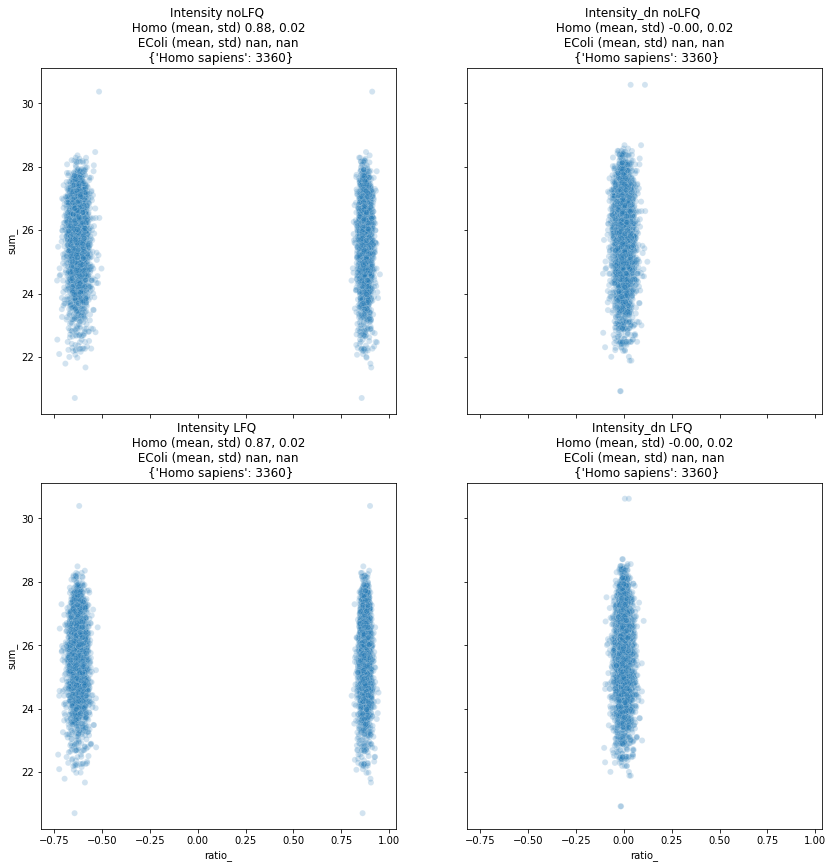

In [13]:
from alphapept.quantification import delayed_normalization, protein_profile_parallel
import test_helper
import pandas as pd
import matplotlib.pyplot as plt
import itertools

samplenames = ["A1", "A2", "B1"]
fractions = [1, 1, 1]
test_id = 'PXD006109'

df = test_helper.simulate_biased_peptides(20000, samplenames, fractions)
df, normed = delayed_normalization(df, field ='Intensity')

fields = ['Intensity', 'Intensity_dn']
tests = ['noLFQ', 'LFQ']

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True, sharey=True)

for j, field in  enumerate(fields):
    
    pt = protein_profile_parallel(df, minimum_ratios=1, field=field)
    pt['Species'] = ["Homo sapiens" for x in range(len(pt.index))]
    
    pre_lfq = [_ for _ in pt.columns if not _.endswith('_LFQ')]
    lfq = [_ for _ in pt.columns if _.endswith('_LFQ')]
    
    for i, cols in enumerate([pre_lfq, lfq]):
        
        ax = axes[i, j]
        samplepairs = itertools.product([x for x in cols if "A" in x ], [x for x in cols if "B" in x ])
        
        for pair in samplepairs:
            
            base_columns = [pair[0]]
            ratio_columns = [pair[1]]
            test_helper.get_plot_df(pt, base_columns, ratio_columns, ax, f"{fields[j]} {tests[i]}", valid_filter = False)
            
            ax.get_legend().remove()
 
plt.show()

### Bruker HeLa

In [14]:
%run -i ../test_ci.py $tmp_folder bruker_hela

2021-06-05 01:58:12> Creating dir F:\alphapept\sandbox\temp/test_temp.
2021-06-05 01:58:17> Using Python version for testing
2021-06-05 01:58:17> Logging to C:\Users\admin\alphapept\logs\log_20210605015817.txt.
2021-06-05 01:58:17> Platform information:
2021-06-05 01:58:17> system     - Windows
2021-06-05 01:58:17> release    - 10
2021-06-05 01:58:17> version    - 10.0.18362
2021-06-05 01:58:17> machine    - AMD64
2021-06-05 01:58:17> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2021-06-05 01:58:17> cpu count  - 24
2021-06-05 01:58:17> ram memory - 95.3/127.7 Gb (available/total)
2021-06-05 01:58:17> 
2021-06-05 01:58:17> Python information:
2021-06-05 01:58:17> SQLAlchemy     - 1.3.22
2021-06-05 01:58:17> alphapept      - 0.3.26
2021-06-05 01:58:17> biopython      - 1.78
2021-06-05 01:58:17> click          - 7.1.2
2021-06-05 01:58:17> comtypes       - 1.1.7
2021-06-05 01:58:17> fastcore       - 1.3.5
2021-06-05 01:58:17> h5py           - 3.1.0
2021-06-05 01:58:17> l




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 01:58:18> FASTA contains 36,789 entries.


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [13:32<00:00, 812.84s/it]
  0%|                                                                                            | 0/1 [10:10<?, ?it/s]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [09:42<00:00, 582.92s/it]



  3%|█▋                                                              | 0.02702702702702703/1 [01:25<51:16, 3161.93s/it]


  5%|███▍                                                            | 0.05405405405405406/1 [01:27<21:12, 1345.18s/it]


  8%|█████▎                                                           | 0.08108108108108109/1 [01:29<11:41, 763.34s/it]


 11%|███████                                                          | 0.10810810810810811/1 [01:31<07:15, 487.86s/it]


 14%|████████▊                                                        | 0.13513513513513514/1 [01:32<04:50, 335.55s/it]


 16%|██████████▌           

2021-06-05 02:00:53> Digested 36,789 proteins and generated 9,107,982 spectra
2021-06-05 02:02:21> Database saved to F:\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 3.42 GB


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 02:02:37> Processing 1 files for step raw_conversion
2021-06-05 02:02:37> File F:\alphapept\sandbox\temp/test_temp\bruker_HeLa has extension .d - converting from Bruker.
2021-06-05 02:32:24> File conversion complete. Extracted 299,728 precursors.
2021-06-05 02:32:26> File conversion of file F:\alphapept\sandbox\temp/test_temp\bruker_HeLa.d complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 02:32:26> Processing 1 files for step find_features
2021-06-05 02:32:26> No *.hdf file with features found for F:\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf. Adding to feature finding list.
2021-06-05 02:32:27> Feature finding on F:\alphapept\sandbox\temp/test_temp\bruker_HeLa.d
2021-06-05 02:32:27> Using Windows FF
2021-06-05 02:32:28> TopLevelUffWorkflow: Initializing 4d Feature Finder Workflow for lc-timstof data
2021-06-05 02:32:28> bdal.uff.TopLevelUffWorkflow: This is Universal Feature Finder 3.13.1.0
2021-06-05 02:32:28> 
2021-06-05 02:32:28> bdal.uff.cmdline: Parameters for ParameterSet path '':
2021-06-05 02:32:28> 
2021-06-05 02:32:28>  directory containing the data to be processed." , "required":true , "hidden":false , "type":"class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> >" , "constraint":null , "value":"F:\alphapept\sandbox\temp/test_temp\bruker_HeLa.d"}
2021-06-05 02:32:28> 
2021-06-05 02:32:28> nable lcms d

2021-06-05 02:32:28> 
2021-06-05 02:32:28> "Parameter for writing raw msms peaks of non-deisotoped peaks if writeAllRawPeaks is false." , "required":false , "hidden":true , "type":"double" , "constraint":null , "value":150}
2021-06-05 02:32:28> 
2021-06-05 02:32:28>  non-deconvoluted peaks are filled up." , "required":false , "hidden":true , "type":"class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> >" , "constraint":"[topN,threshold] (class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> >)" , "value":"topN"}
2021-06-05 02:32:28> 
2021-06-05 02:32:28> , all raw peaks are written. Otherwise, only deisotoped peaks are written" , "required":false , "hidden":false , "type":"bool" , "constraint":null , "value":false}
2021-06-05 02:32:28> 
2021-06-05 02:32:28> ':
2021-06-05 02:32:28> 
2021-06-05 02:32:28> 
2021-06-05 02:32:28> :
2021-06-05 02:32:28> 
2021-06-05 02:32:28> c":"intensity threshold for matching calibrant peaks" 

2021-06-05 02:32:28> 
2021-06-05 02:32:28> ectors with group ids of reference peaks, for calibration-segment calibration" , "required":false , "hidden":false , "type":"class std::vector<class std::vector<int,class std::allocator<int> >,class std::allocator<class std::vector<int,class std::allocator<int> > > >" , "constraint":null , "value":unprintable type}
2021-06-05 02:32:28> 
2021-06-05 02:32:28> :"end (RT) of the calibration segment" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":1e+22}
2021-06-05 02:32:28> 
2021-06-05 02:32:28> c":"begin (RT) of the calibration segment" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":0}
2021-06-05 02:32:28> 
2021-06-05 02:32:28> mum intensity of a calibrant" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":1e+22}
2021-06-05 02:32:28> 
2021-06-05 02:32:28> lag indicating which algorithm to use: false = use calibration-segment, true = do not u

2021-06-05 02:32:29> 
2021-06-05 02:32:29> value for range to read metadata / recalibrate masses in" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":0}
2021-06-05 02:32:29> 
2021-06-05 02:32:29>  "desc":"Lower RT value for range to look for mobility calibrants" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":0}
2021-06-05 02:32:29> 
2021-06-05 02:32:29> .Calibration.ReadTimsCalibrants':
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> Ms.Calibration.WriteCalibration':
2021-06-05 02:32:29> 
2021-06-05 02:32:29> "vector of CCS values of reference peaks for mobility calibration" , "required":false , "hidden":false , "type":"class std::vector<double,class std::allocator<double> >" , "constraint":null , "value":[]}
2021-06-05 02:32:29> 
2021-06-05 02:32:29> .Calibration.WriteCalibration':
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> Ms.ClusterDeisotoping':
2021-06-05 02:32:29> 
2021-0

2021-06-05 02:32:29> 
2021-06-05 02:32:29> sc":"assignment precondition: if true, the M/Z center of the isolation window must lie within the feature interval" , "required":false , "hidden":false , "type":"bool" , "constraint":null , "value":false}
2021-06-05 02:32:29> 
2021-06-05 02:32:29> raction of isotope pattern which must be covered (starting from the largest peaks)" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":0.95}
2021-06-05 02:32:29> 
2021-06-05 02:32:29> l molecules: path to file with table: 6 x M/Z and 6 isotope intensities" , "required":false , "hidden":false , "type":"class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> >" , "constraint":null , "value":"isotopePatterns3.txt"}
2021-06-05 02:32:29> 
2021-06-05 02:32:29> e threshold for incorporation of non-essential isotopes into feature. if <= 0, not used (abs. threshold maxIsotopePatternError used)." , "required":false , "hidden":false , "type":"double

2021-06-05 02:32:29> 
2021-06-05 02:32:29> equired":false , "hidden":false , "type":"double" , "constraint":null , "value":0}
2021-06-05 02:32:29> 
2021-06-05 02:32:29> quired":false , "hidden":false , "type":"double" , "constraint":null , "value":0}
2021-06-05 02:32:29> 
2021-06-05 02:32:29> " , "required":false , "hidden":false , "type":"bool" , "constraint":null , "value":false}
2021-06-05 02:32:29> 
2021-06-05 02:32:29> quired":false , "hidden":false , "type":"double" , "constraint":null , "value":0}
2021-06-05 02:32:29> 
2021-06-05 02:32:29> rue, all peaks for positions [-1, maxIsotopes-1] (with pos. 0 first isotope of feature) are reported" , "required":false , "hidden":false , "type":"bool" , "constraint":null , "value":false}
2021-06-05 02:32:29> 
2021-06-05 02:32:29> fraction of the maximum intensity is considered as not saturated (for bigger intensities we don't know)" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":0.8}
2021-06-05 02:32:29

2021-06-05 02:32:29> required":false , "hidden":false , "type":"double" , "constraint":null , "value":1}
2021-06-05 02:32:29> 
2021-06-05 02:32:29> quired":false , "hidden":false , "type":"double" , "constraint":null , "value":0.03}
2021-06-05 02:32:29> 
2021-06-05 02:32:29>  , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":2}
2021-06-05 02:32:29> 
2021-06-05 02:32:29> ed":false , "hidden":false , "type":"double" , "constraint":null , "value":0.014}
2021-06-05 02:32:29> 
2021-06-05 02:32:29> d":false , "hidden":false , "type":"double" , "constraint":null , "value":0.01}
2021-06-05 02:32:29> 
2021-06-05 02:32:29> d":false , "hidden":false , "type":"double" , "constraint":null , "value":4}
2021-06-05 02:32:29> 
2021-06-05 02:32:29> " , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":1}
2021-06-05 02:32:29> 
2021-06-05 02:32:29> equired":false , "hidden":false , "type":"double" , "constraint":null , "value":3.5}
2021-06-

2021-06-05 02:32:29> 
2021-06-05 02:32:29>  sqlite result file '<shortFilename>.features'" , "required":false , "hidden":false , "type":"bool" , "constraint":null , "value":true}
2021-06-05 02:32:29> 
2021-06-05 02:32:29> aw peaks for each cluster are written" , "required":false , "hidden":true , "type":"bool" , "constraint":null , "value":false}
2021-06-05 02:32:29> 
2021-06-05 02:32:29> .IsotopeClustersOutput':
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> Ms.PrecursorInfoSource':
2021-06-05 02:32:29> 
2021-06-05 02:32:29> value for read range" , "required":false , "hidden":true , "type":"double" , "constraint":null , "value":1e+22}
2021-06-05 02:32:29> 
2021-06-05 02:32:29> value for read range" , "required":false , "hidden":true , "type":"double" , "constraint":null , "value":0}
2021-06-05 02:32:29> 
2021-06-05 02:32:29> .PrecursorInfoSource':
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> Ms.ReadTimsData':
2021-06-05 02:32:29> 
2021-06-05 02:32

2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 00000
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 0000
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 00
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 0000.000000
2021-06-05 02:32:29> 
2021-06-05 02:32:29> e
2021-06-05 02:32:29> th.enableRecalibration=true
2021

2021-06-05 02:32:29> false
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 10
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> alse
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> ing=20
2021-06-05 02:32:29> 00000
2021-06-05 02:32:29> or=2.000000
2021-06-05 02:32:29> 300000
2021-06-05 02:32:29> 0
2021-06-05 02:32:29> 50000
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> .000000
2021-06-05 02:32:29> 
2021-06-05 02:32:29> 
2021-06-05 02:32:29> ters=<unprintable type>
2021-06-05 02:32:29> ue
2021-06-05 02:32:29> eaks=false
2021-06-05 02:32:29> nds=10000000000000000000000.000000
2021-06-05 02:32:29> nds=0.000000
2021-06-05 02:32:29> meNrTolerance=2
2021-06-05 02:32:29> imalFrequency=20
2021-06-05 02:32:29> nNrTolerance=20
2021-06-05 02:32:29> lerance=3
2021-06-05 02:32:29> eClustering"
2021-06-05 02:32:29> ue
2021-0

2021-06-05 02:56:17> bdal.algorithm.LcmsClusterDeisotoping: 2052951 clusters after splitting (if active).
2021-06-05 02:56:17> bdal.algorithm.LcmsClusterDeisotoping:  min/max apex intensity: 34.7222/1.31159e+06
2021-06-05 02:56:26> bdal.algorithm.PerioTab.InitPerioTabStream: User-defined periodic table extension is empty or file could not be opened. Proceeding with standard elements.
2021-06-05 02:56:26> bdal.algorithm.LcmsClusterDeisotoping: correlation threshold: 10623.9
2021-06-05 02:56:26> bdal.algorithm.LcmsClusterDeisotoping: Progress: 0% (1/2052951)
2021-06-05 02:56:27> bdal.algorithm.LcmsClusterDeisotoping: Progress: 0.487104% (10001/2052951)
2021-06-05 02:56:28> bdal.algorithm.LcmsClusterDeisotoping: Progress: 0.974207% (20001/2052951)
2021-06-05 02:56:29> bdal.algorithm.LcmsClusterDeisotoping: Progress: 1.46131% (30001/2052951)
2021-06-05 02:56:30> bdal.algorithm.LcmsClusterDeisotoping: Progress: 1.94841% (40001/2052951)
2021-06-05 02:56:32> bdal.algorithm.LcmsClusterDeisotop

2021-06-05 02:57:53> bdal.algorithm.LcmsClusterDeisotoping: Progress: 39.4554% (810001/2052951)
2021-06-05 02:57:54> bdal.algorithm.LcmsClusterDeisotoping: Progress: 39.9425% (820001/2052951)
2021-06-05 02:57:55> bdal.algorithm.LcmsClusterDeisotoping: Progress: 40.4296% (830001/2052951)
2021-06-05 02:57:56> bdal.algorithm.LcmsClusterDeisotoping: Progress: 40.9167% (840001/2052951)
2021-06-05 02:57:57> bdal.algorithm.LcmsClusterDeisotoping: Progress: 41.4038% (850001/2052951)
2021-06-05 02:57:58> bdal.algorithm.LcmsClusterDeisotoping: Progress: 41.8909% (860001/2052951)
2021-06-05 02:57:59> bdal.algorithm.LcmsClusterDeisotoping: Progress: 42.378% (870001/2052951)
2021-06-05 02:58:00> bdal.algorithm.LcmsClusterDeisotoping: Progress: 42.8651% (880001/2052951)
2021-06-05 02:58:01> bdal.algorithm.LcmsClusterDeisotoping: Progress: 43.3522% (890001/2052951)
2021-06-05 02:58:01> bdal.algorithm.LcmsClusterDeisotoping: Progress: 43.8393% (900001/2052951)
2021-06-05 02:58:02> bdal.algorithm.LcmsC

2021-06-05 02:58:59> bdal.algorithm.LcmsClusterDeisotoping: Progress: 80.8592% (1660001/2052951)
2021-06-05 02:58:59> bdal.algorithm.LcmsClusterDeisotoping: Progress: 81.3463% (1670001/2052951)
2021-06-05 02:59:00> bdal.algorithm.LcmsClusterDeisotoping: Progress: 81.8334% (1680001/2052951)
2021-06-05 02:59:01> bdal.algorithm.LcmsClusterDeisotoping: Progress: 82.3205% (1690001/2052951)
2021-06-05 02:59:01> bdal.algorithm.LcmsClusterDeisotoping: Progress: 82.8076% (1700001/2052951)
2021-06-05 02:59:02> bdal.algorithm.LcmsClusterDeisotoping: Progress: 83.2947% (1710001/2052951)
2021-06-05 02:59:03> bdal.algorithm.LcmsClusterDeisotoping: Progress: 83.7818% (1720001/2052951)
2021-06-05 02:59:03> bdal.algorithm.LcmsClusterDeisotoping: Progress: 84.2689% (1730001/2052951)
2021-06-05 02:59:04> bdal.algorithm.LcmsClusterDeisotoping: Progress: 84.756% (1740001/2052951)
2021-06-05 02:59:05> bdal.algorithm.LcmsClusterDeisotoping: Progress: 85.2431% (1750001/2052951)
2021-06-05 02:59:05> bdal.algor



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 03:39:03> Starting first search.
2021-06-05 03:39:03> Processing 1 files for step search_db
2021-06-05 03:39:03> Calibrating fragments


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2021-06-05 03:39:36> Performing search on 664,992 query and 9,107,982 db entries with frag_tol = 30.00 and prec_tol = 30.00.
2021-06-05 03:48:12> Found 673,970 psms.
2021-06-05 03:48:13> Extracting columns for scoring.


100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [1:50:25<00:00, 6625.12s/it]
  0%|                                                                                          | 0/1 [1:16:15<?, ?it/s]


2021-06-05 03:50:00> Extracted columns from 673,970 spectra.
2021-06-05 03:50:01> Saving first_search results to F:\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf
2021-06-05 03:50:03> Search of file F:\alphapept\sandbox\temp/test_temp\bruker_HeLa.d complete.
2021-06-05 03:50:36> First search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 03:50:36> Processing 1 files for step calibrate_hdf
2021-06-05 03:50:37> Scoring using X-Tandem
2021-06-05 03:50:39> 66,477 target (664 decoy) of 116188 PSMs. fdr 0.009988 for a cutoff of 17.78 (set fdr was 0.01)
2021-06-05 03:50:48> Calibration of file F:\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf complete.
2021-06-05 03:50:48> Calibrating fragments
2021-06-05 03:50:49> Median fragment offset -5.65 - std 14.78 ppm



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 03:50:50> Starting second search with DB.
2021-06-05 03:50:50> Processing 1 files for step search_db
2021-06-05 03:50:50> Found calibrated prec_tol with value 8.23
2021-06-05 03:50:55> Performing search on 664,992 query and 9,107,982 db entries with frag_tol = 30.00 and prec_tol = 8.23.


  0%|                                                                                            | 0/1 [03:06<?, ?it/s]


2021-06-05 03:53:43> Found 421,418 psms.
2021-06-05 03:53:44> Extracting columns for scoring.


  0%|                                                                                            | 0/1 [14:57<?, ?it/s]


2021-06-05 03:54:46> Extracted columns from 421,418 spectra.
2021-06-05 03:54:47> Saving second_search results to F:\alphapept\sandbox\temp/test_temp\bruker_HeLa.ms_data.hdf
2021-06-05 03:54:48> Search of file F:\alphapept\sandbox\temp/test_temp\bruker_HeLa.d complete.
2021-06-05 03:55:20> Second search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 03:55:21> Processing 1 files for step score_hdf
2021-06-05 03:55:22> Found second search psms for scoring.
2021-06-05 03:55:29> 89,193 target (8,919 decoy) of 105624 PSMs. fdr 0.099997 for a cutoff of 12.64 (set fdr was 0.1)
2021-06-05 03:55:30> Training & cross-validation on 18344 targets and 18344 decoys
2021-06-05 03:56:01> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 50, 'clf__max_leaf_nodes': 250}
2021-06-05 03:56:01> The train accuracy was 0.9359463584823375
2021-06-05 03:56:01> Testing on 73376 targets and 73376 decoys
2021-06-05 03:56:03> The test accuracy was 0.921445704317488
2021-06-05 03:56:03> Top features {'hits': 0.22283315315843608, 'y_hits': 0.20750783808742532, 'x_tandem': 0.14313745807021594, 'matched_ion_fraction': 0.059521825508770596, 'matched_int_ratio': 0.054373517502535565, 'total_int': 0.051515485522970195, 'n_ions': 0.03904978615331172, 'dist': 0.029410259616077798, 'int_sum': 0.02773321560740404, 'n_missed': 0.02



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 03:56:35> Fasta dict with length 36,789, Pept dict with length 9,107,988
2021-06-05 03:56:35> Extracting protein groups.





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 03:56:36> A total of 61,460 unique and 3,442 shared peptides.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2021-06-05 03:56:37> A total of 912 ambigious proteins
2021-06-05 03:56:37> A total of 715 unique and 42 shared peptides.
2021-06-05 03:56:37> A total of 41 ambigious proteins
2021-06-05 03:56:38> Global FDR on protein_group
2021-06-05 03:56:38> 6,796 target (67 decoy) of 8329 PSMs. fdr 0.009859 for a cutoff of 0.87 (set fdr was 0.01)
2021-06-05 03:56:38> FDR on proteins complete. For 0.01 FDR found 75,677 targets and 71 decoys. A total of 6,863 proteins found.
2021-06-05 03:56:42> Saving complete.
2021-06-05 03:56:42> Protein groups complete.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['ion_int', 'ion_types', 'naked_sequence', 'precursor', 'sequence',
       'filename', 'shortname', 'protein', 'protein_group', 'razor',
       'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2021-06-05 03:56:42> Complete. 
2021-06-05 03:56:42> Starting profile extraction.




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.59it/s]

2021-06-05 03:56:42> LFQ complete.
2021-06-05 03:56:43> Extracting protein_summary
2021-06-05 03:56:43> Saved protein_summary of length 6,863 saved to F:\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2021-06-05 03:56:43> Exporting as csv.
2021-06-05 03:56:46> Saved df of length 75,748 saved to F:\alphapept\sandbox\temp\test_temp\results
2021-06-05 03:56:49> Settings saved to F:\alphapept\sandbox\temp\test_temp\results.yaml
2021-06-05 03:56:49> Analysis complete.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:08<00:00,  8.90s/it]


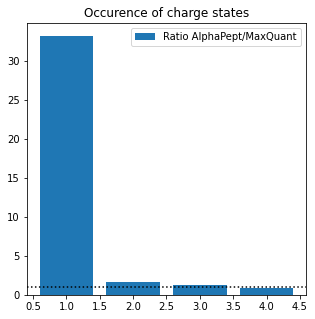

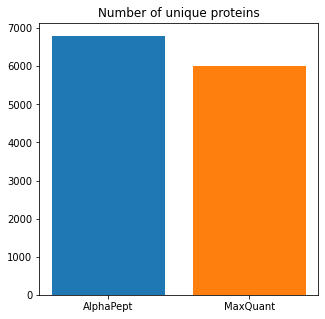

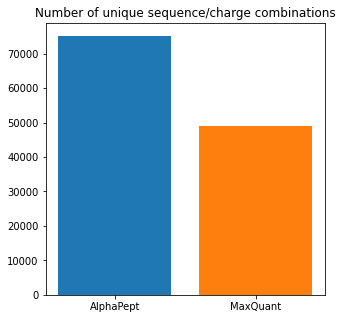

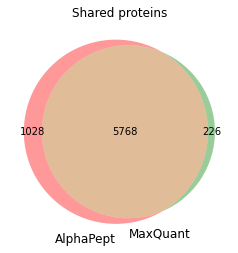

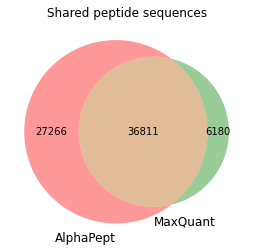

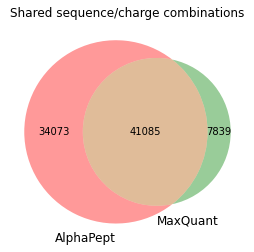

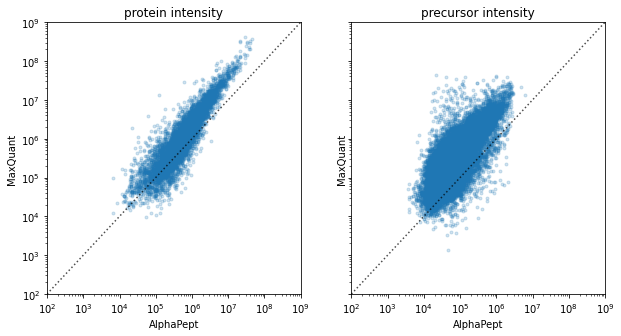

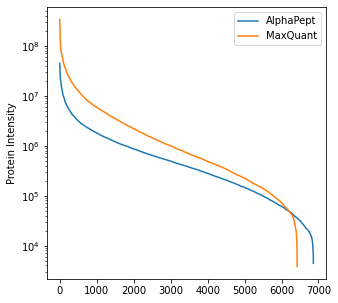

In [15]:
from test_helper import prepare_files, compare_field, compare_populations, compare_intensities, protein_rank

df1, df2 = prepare_files(os.path.join(TEST_DIR, "results.hdf"), os.path.join(tmp_folder,'bruker_HeLa_evd.txt'))
for field in ['charge','protein','precursor']:
    compare_field(df1, df2, software_1, software_2, field)
    
for field in ['protein','sequence','precursor']:
    compare_populations(df1, df2, software_1, software_2, field)
    
compare_intensities(df1, df2,software_1, software_2)

protein_rank(df1, df2,software_1, software_2)

## PXD010012

In [16]:
%run -i ../test_ci.py $tmp_folder PXD010012

2021-06-05 03:56:56> Creating dir F:\alphapept\sandbox\temp/test_temp.
2021-06-05 03:58:57> Using Python version for testing
2021-06-05 03:58:57> Logging to C:\Users\admin\alphapept\logs\log_20210605035857.txt.
2021-06-05 03:58:57> Platform information:
2021-06-05 03:58:57> system     - Windows
2021-06-05 03:58:57> release    - 10
2021-06-05 03:58:57> version    - 10.0.18362
2021-06-05 03:58:57> machine    - AMD64
2021-06-05 03:58:57> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2021-06-05 03:58:57> cpu count  - 24
2021-06-05 03:58:57> ram memory - 92.2/127.7 Gb (available/total)
2021-06-05 03:58:57> 
2021-06-05 03:58:58> Python information:
2021-06-05 03:58:58> SQLAlchemy     - 1.3.22
2021-06-05 03:58:58> alphapept      - 0.3.26
2021-06-05 03:58:58> biopython      - 1.78
2021-06-05 03:58:58> click          - 7.1.2
2021-06-05 03:58:58> comtypes       - 1.1.7
2021-06-05 03:58:58> fastcore       - 1.3.5
2021-06-05 03:58:58> h5py           - 3.1.0
2021-06-05 03:58:58> l



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 03:58:59> FASTA contains 43,752 entries.




  2%|█▍                                                             | 0.022727272727272728/1 [01:03<45:33, 2797.15s/it]

  5%|██▊                                                            | 0.045454545454545456/1 [01:04<18:37, 1170.72s/it]

  7%|████▍                                                            | 0.06818181818181818/1 [01:05<10:13, 658.81s/it]

  9%|█████▉                                                           | 0.09090909090909091/1 [01:16<08:53, 586.72s/it]

 11%|███████▍                                                         | 0.11363636363636363/1 [01:30<08:49, 597.66s/it]

 14%|████████▊                                                        | 0.13636363636363635/1 [01:32<06:03, 420.66s/it]

 16%|██████████▌                                                       | 0.1590909090909091/1 [01:33<04:17, 306.73s/it]

 18%|███████████▊                                                     | 0.18181818181818182/1 [01:35<03:12, 235.06s/it]

 20%|█████████████▎           

2021-06-05 04:01:21> Digested 43,752 proteins and generated 6,163,992 spectra
2021-06-05 04:02:22> Database saved to F:\alphapept\sandbox\temp\test_temp\database.hdf. Filesize of database is 2.33 GB


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 04:02:33> Processing 10 files for step raw_conversion
2021-06-05 04:02:33> AlphaPool was set to 24 processes. Setting max to 24.


100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [29:34<00:00, 1118.57s/it]
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 04:32:08> Processing 10 files for step find_features
2021-06-05 04:32:08> Using Bruker Feature Finder. Setting Process limit to 3.
2021-06-05 04:32:08> AlphaPool was set to 3 processes. Setting max to 3.



 10%|███████▋                                                                     | 0.1/1 [40:58<6:08:42, 24580.74s/it]
 40%|██████████████████████████████                                             | 0.4/1 [1:21:36<1:52:24, 11240.21s/it]
 70%|██████████████████████████████████████████████████████▌                       | 0.7/1 [2:02:04<47:45, 9550.90s/it]
 80%|██████████████████████████████████████████████████████████████▍               | 0.8/1 [2:05:15<26:39, 7995.98s/it]
100%|█████████████████████████████████████████████████████████████████████████████| 1.0/1 [2:56:55<00:00, 10755.68s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 07:29:03> Starting first search.
2021-06-05 07:29:03> Processing 10 files for step search_db
2021-06-05 07:29:03> Searching. Setting Process limit to 12.
2021-06-05 07:29:03> AlphaPool was set to 12 processes. Setting max to 12.





 10%|███████▋                                                                     | 0.1/1 [20:35<3:05:16, 12351.89s/it]


 20%|███████████████▌                                                              | 0.2/1 [20:35<1:07:52, 5090.68s/it]


 30%|████████████████████████                                                        | 0.3/1 [20:48<32:56, 2823.98s/it]


100%|█████████████████████████████████████████████████████████████████████████████| 1.0/1 [3:47:29<00:00, 13649.01s/it]
100%|█████████████████████████████████████████████████████████████████████████████| 1.0/1 [3:17:54<00:00, 11874.26s/it]
100%|█████████████████████████████████████████████████████████████████████████████| 1.0/1 [3:51:11<00:00, 13871.52s/it]


2021-06-05 07:50:21> First search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 07:50:21> Processing 10 files for step calibrate_hdf
2021-06-05 07:50:21> AlphaPool was set to 24 processes. Setting max to 24.


 90%|█████████████████████████████████████████████████████████████████████████▊        | 0.9/1 [00:30<00:02, 21.34s/it]
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 07:50:52> Starting second search with DB.
2021-06-05 07:50:52> Processing 10 files for step search_db
2021-06-05 07:50:52> Searching. Setting Process limit to 12.
2021-06-05 07:50:52> AlphaPool was set to 12 processes. Setting max to 12.



 10%|████████                                                                        | 0.1/1 [04:29<40:23, 2692.97s/it]
 50%|████████████████████████████████████████▌                                        | 0.5/1 [04:29<03:20, 401.39s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [05:13<00:00, 313.48s/it]
100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [26:34<00:00, 1594.22s/it]


2021-06-05 07:55:53> Second search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 07:55:54> Processing 10 files for step score_hdf
2021-06-05 07:55:54> AlphaPool was set to 24 processes. Setting max to 24.


 70%|████████████████████████████████████████████████████████▋                        | 0.7/1 [03:28<00:45, 152.52s/it]

2021-06-05 07:59:23> Also using mobility for calibration.


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [03:29<00:00, 209.89s/it]


2021-06-05 08:00:06> Total deviation before calibration {'mz': 8.745037978735516e-06, 'rt': 3.306792195637966, 'mobility': 0.05052341899960665}
2021-06-05 08:00:06> Mean deviation before calibration {'mz': 1.943341773052337e-07, 'rt': 0.07348427101417702, 'mobility': 0.0011227426444357033}
2021-06-05 08:00:06> Solving equation system
2021-06-05 08:00:06> Regression score is 0.9968926038968317
2021-06-05 08:00:06> Solving equation system complete.
2021-06-05 08:00:06> Applying offset
2021-06-05 08:00:06> Saving F:\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C1_01_Base.ms_data.hdf - peptide_fdr.
2021-06-05 08:00:06> Saving F:\alphapept\sandbox\temp/test_temp\PXD010012_CT_1_C1_01_Base.ms_data.hdf - feature_table.
2021-06-05 08:00:06> Saving F:\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.ms_data.hdf - peptide_fdr.
2021-06-05 08:00:07> Saving F:\alphapept\sandbox\temp/test_temp\PXD010012_CT_2_C1_01_Base.ms_data.hdf - feature_table.
2021-06-05 08:00:07> Saving F:\alphapept

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 08:00:56> Fasta dict with length 43,752, Pept dict with length 6,163,998
2021-06-05 08:00:56> Extracting protein groups.




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


2021-06-05 08:01:00> A total of 59,849 unique and 8,428 shared peptides.
2021-06-05 08:01:04> A total of 1952 ambigious proteins
2021-06-05 08:01:05> A total of 2,586 unique and 330 shared peptides.
2021-06-05 08:01:05> A total of 307 ambigious proteins
2021-06-05 08:01:07> Global FDR on protein_group
2021-06-05 08:01:07> 7,606 target (76 decoy) of 12355 PSMs. fdr 0.009992 for a cutoff of 0.97 (set fdr was 0.01)
2021-06-05 08:01:11> FDR on proteins complete. For 0.01 FDR found 480,025 targets and 325 decoys. A total of 7,682 proteins found.
2021-06-05 08:01:34> Saving complete.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['ion_int', 'ion_types', 'naked_sequence', 'precursor', 'sequence',
       'filename', 'shortname', 'protein', 'protein_group', 'razor',
       'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2021-06-05 08:01:34> Protein groups complete.
2021-06-05 08:01:35> Delayed Normalization.
2021-06-05 08:01:36> Setting minimum occurence to 10.0


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


2021-06-05 08:01:49> Complete. 
2021-06-05 08:01:49> Starting profile extraction.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['ion_int', 'ion_types', 'naked_sequence', 'precursor', 'sequence',
       'filename', 'shortname', 'protein', 'protein_group', 'razor',
       'protein_idx'],
      dtype='object')]

  pytables.to_hdf(
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 08:01:50> Preparing protein table for parallel processing.


 20%|█████████████▎                                                     | 0.1989065347565738/1 [00:14<00:54, 67.58s/it]

2021-06-05 08:02:03> Starting protein extraction for 7682 proteins.
2021-06-05 08:02:03> AlphaPool was set to 24 processes. Setting max to 24.


100%|█████████████████████████████████████████████████████████████████▉| 0.9996875813590211/1 [03:21<00:00, 219.81s/it]

2021-06-05 08:05:17> LFQ complete.
2021-06-05 08:05:17> Extracting protein_summary
2021-06-05 08:05:18> Saved protein_summary of length 7,682 saved to F:\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2021-06-05 08:05:18> Exporting as csv.
2021-06-05 08:05:39> Saved df of length 480,350 saved to F:\alphapept\sandbox\temp\test_temp\results
2021-06-05 08:06:13> Settings saved to F:\alphapept\sandbox\temp\test_temp\results.yaml
2021-06-05 08:06:13> Analysis complete.


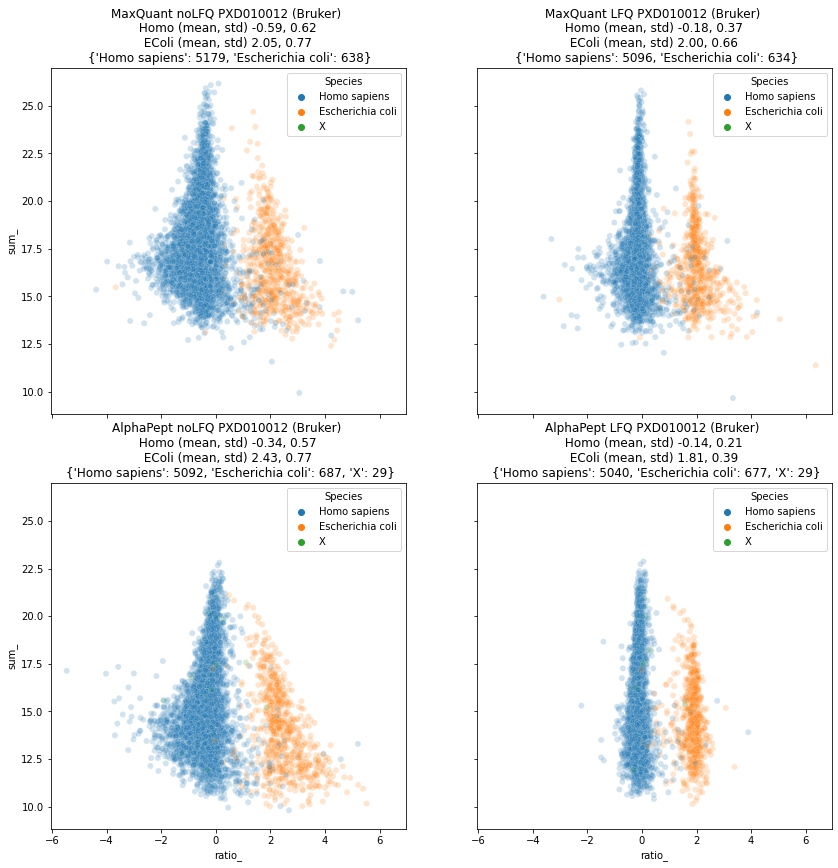

In [17]:
from test_helper import get_plot_df
import matplotlib.pyplot as plt
import seaborn as sns
import os

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True,sharey=True)

ref = pd.read_csv(os.path.join(tmp_folder,'PXD010012_ref.txt'), sep='\t') 

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = 'LFQ i'
    else:
        x = 'I'
        
    base_columns = [f"{x}ntensity Base_{i}" for i in range(1,6)]
    ratio_columns = [f"{x}ntensity Ratio_{i}" for i in range(1,6)]

    id_ = 'MaxQuant ' +_+' PXD010012 (Bruker)'
    get_plot_df(ref, base_columns, ratio_columns, axes[0,j], id_)


path = os.path.join(TEST_DIR, "results.hdf") #TEST_DIR as set in test_ci.py
ref = pd.read_hdf(path, 'protein_table')
ref.columns = [os.path.split(_)[1].replace('.ms_data.hdf','') for _ in ref.columns]

species = []
for _ in ref.index:
    if 'HUMAN' in _:
        species.append('Homo sapiens')
    elif 'ECO' in _:
        species.append('Escherichia coli')
    else:
        species.append('X')
        
ref['Species'] = species

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = '_LFQ'
    else:
        x = ''
        
    base_columns = [f"PXD010012_CT_{i}_C1_01_Base{x}" for i in range(1,4)]
    ratio_columns = [f"PXD010012_CT_{i}_C2_01_Ratio{x}" for i in range(1,4)]

    id_ = 'AlphaPept ' +_+' PXD010012 (Bruker)'
    get_plot_df(ref, base_columns, ratio_columns, axes[1,j], id_)

plt.show()

2021-06-05 08:06:17> Loading files


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (54) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


2021-06-05 08:06:20> A total of 10 files.
2021-06-05 08:06:30> A total of 7,413 proteins.


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [15:40<00:00, 940.65s/it]
  0%|                                                                                            | 0/1 [05:36<?, ?it/s]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [04:43<00:00, 283.20s/it]


2021-06-05 08:06:44> Setting minimum occurence to 10.0


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


2021-06-05 08:06:50> Preparing protein table for parallel processing.
2021-06-05 08:07:01> Starting protein extraction for 7413 proteins.
2021-06-05 08:07:01> AlphaPool was set to 24 processes. Setting max to 24.


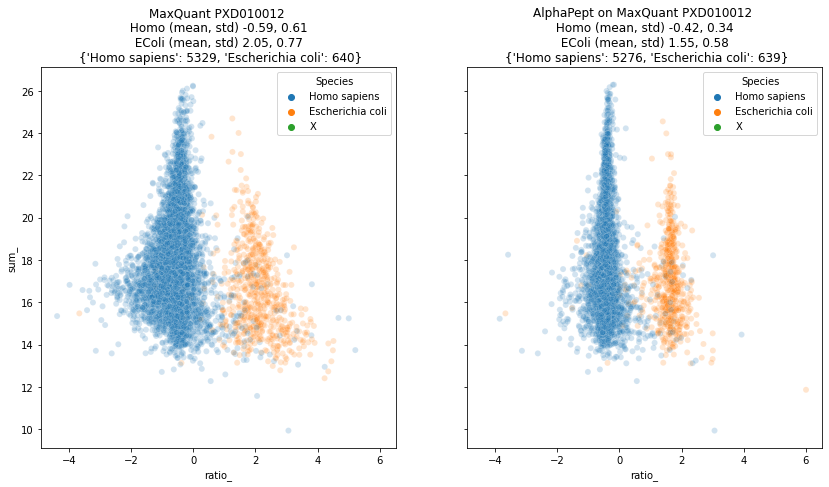

In [18]:
from alphapept.quantification import protein_profile_parallel_mq
from test_helper import get_plot_df

evidence_path = os.path.join(tmp_folder,'PXD010012_ref_evd.txt')
protein_group_path = os.path.join(tmp_folder,'PXD010012_ref.txt')

pt = protein_profile_parallel_mq(evidence_path, protein_group_path)

ref = pd.read_csv(protein_group_path, sep='\t')
species_dict = pd.Series(ref['Species'].values, index=ref['Protein IDs']).to_dict()
pt['Species'] = [species_dict[_] for _ in pt.index]


pre_lfq = [_ for _ in pt.columns if not _.endswith('_LFQ')]
lfq = [_ for _ in pt.columns if _.endswith('_LFQ')]

test_id = 'PXD010012'

fig, axes = plt.subplots(1, 2, figsize=(14,7), sharex=True,sharey=True)

ids = [f'{software_2} {test_id}', f'{software_1} on {software_2} {test_id}']

for i, ds in enumerate([pre_lfq, lfq]):

    base_columns = [_ for _ in ds if 'Base' in _]
    ratio_columns = [_ for _ in ds if 'Ratio' in _]
    get_plot_df(pt, base_columns, ratio_columns, axes[i], ids[i])

### Large Fasta

In [19]:
%run -i ../test_ci.py $tmp_folder thermo_hela_large_fasta

2021-06-05 08:09:17> Creating dir F:\alphapept\sandbox\temp/test_temp.
2021-06-05 08:09:21> Using Python version for testing
2021-06-05 08:09:21> Logging to C:\Users\admin\alphapept\logs\log_20210605080921.txt.
2021-06-05 08:09:21> Platform information:
2021-06-05 08:09:21> system     - Windows
2021-06-05 08:09:21> release    - 10
2021-06-05 08:09:21> version    - 10.0.18362
2021-06-05 08:09:21> machine    - AMD64
2021-06-05 08:09:21> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2021-06-05 08:09:21> cpu count  - 24
2021-06-05 08:09:21> ram memory - 97.2/127.7 Gb (available/total)
2021-06-05 08:09:21> 
2021-06-05 08:09:21> Python information:
2021-06-05 08:09:21> SQLAlchemy     - 1.3.22
2021-06-05 08:09:21> alphapept      - 0.3.26
2021-06-05 08:09:21> biopython      - 1.78
2021-06-05 08:09:21> click          - 7.1.2
2021-06-05 08:09:21> comtypes       - 1.1.7
2021-06-05 08:09:21> fastcore       - 1.3.5
2021-06-05 08:09:21> h5py           - 3.1.0
2021-06-05 08:09:21> l

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 08:09:21> Processing 1 files for step raw_conversion
2021-06-05 08:09:21> File F:\alphapept\sandbox\temp/test_temp\thermo_HeLa has extension .raw - converting from Thermo.
2021-06-05 08:11:33> File conversion complete. Extracted 120,226 precursors.
2021-06-05 08:11:34> File conversion of file F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 08:11:34> Processing 1 files for step find_features
2021-06-05 08:11:34> No *.hdf file with features found for F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf. Adding to feature finding list.
2021-06-05 08:11:35> Feature finding on F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw
2021-06-05 08:11:35> Hill extraction with centroid_tol 8 and max_gap 2


  0%|                                                                                            | 0/1 [02:18<?, ?it/s]


2021-06-05 08:11:41> Number of hills 1,105,353, len = 17.35
2021-06-05 08:11:41> Repeating hill extraction with centroid_tol 5.87
2021-06-05 08:11:47> Number of hills 1,227,331, len = 19.44
2021-06-05 08:12:07> After split hill_ptrs 1,635,903
2021-06-05 08:12:08> After filter hill_ptrs 1,585,989
2021-06-05 08:15:12> Extracting hill stats complete
2021-06-05 08:15:34> Found 190,099 pre isotope patterns.
2021-06-05 08:18:05> Extracted 232,755 isotope patterns.
2021-06-05 08:18:08> Report complete.
2021-06-05 08:18:08> Matching features to query data.
2021-06-05 08:18:09> Saving feature table.
2021-06-05 08:18:10> Feature table saved to F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2021-06-05 08:18:10> Saving features.
2021-06-05 08:18:10> Feature finding of file F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 08:18:10> Starting first search.
2021-06-05 08:18:21> Number of FASTA entries: 564,523 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'n_missed_cleavages': 2, 'pep_length_min': 6, 'pep_length_max': 27, 'isoforms_max': 1024, 'n_modifications_max': 8, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': True, 'fasta_size_max': 100}
2021-06-05 08:18:21> AlphaPool was set to 60 processes. Setting max to 24.
2021-06-05 08:20:42> Block 1 of 565 complete - 0.18 % - created peptides 137,200 


  0%|                                                          | 0.0017699115044247787/1 [02:31<23:45:30, 85682.44s/it]

2021-06-05 08:20:43> Block 2 of 565 complete - 0.35 % - created peptides 131,706 


  0%|▏                                                         | 0.0035398230088495575/1 [02:35<10:07:19, 36569.37s/it]

2021-06-05 08:20:45> Block 3 of 565 complete - 0.53 % - created peptides 145,388 


  0%|                                                                                            | 0/1 [09:13<?, ?it/s]
  1%|▎                                                           | 0.005309734513274336/1 [02:38<5:43:10, 20700.04s/it]

2021-06-05 08:20:49> Block 4 of 565 complete - 0.71 % - created peptides 141,928 


  1%|▍                                                           | 0.007079646017699115/1 [02:40<3:34:56, 12988.37s/it]

2021-06-05 08:20:51> Block 5 of 565 complete - 0.88 % - created peptides 136,294 


  1%|▌                                                            | 0.008849557522123894/1 [02:43<2:25:01, 8779.41s/it]

2021-06-05 08:20:53> Block 6 of 565 complete - 1.06 % - created peptides 142,782 


  1%|▋                                                            | 0.010619469026548672/1 [02:46<1:47:20, 6509.27s/it]

2021-06-05 08:20:57> Block 7 of 565 complete - 1.24 % - created peptides 158,708 


  1%|▊                                                            | 0.012389380530973451/1 [02:54<1:35:10, 5782.32s/it]

2021-06-05 08:21:04> Block 8 of 565 complete - 1.42 % - created peptides 153,884 


  1%|▉                                                             | 0.01415929203539823/1 [02:57<1:15:05, 4570.60s/it]

2021-06-05 08:21:08> Block 9 of 565 complete - 1.59 % - created peptides 150,010 


  2%|▉                                                             | 0.01592920353982301/1 [03:05<1:13:18, 4469.81s/it]

2021-06-05 08:21:15> Block 10 of 565 complete - 1.77 % - created peptides 170,612 


  2%|█                                                            | 0.017699115044247787/1 [03:11<1:06:58, 4091.15s/it]

2021-06-05 08:21:21> Block 11 of 565 complete - 1.95 % - created peptides 151,508 


  2%|█▏                                                           | 0.019469026548672566/1 [03:17<1:03:35, 3891.61s/it]

2021-06-05 08:21:27> Block 12 of 565 complete - 2.12 % - created peptides 160,432 


  2%|█▎                                                             | 0.021238938053097345/1 [03:21<57:17, 3512.59s/it]

2021-06-05 08:21:32> Block 13 of 565 complete - 2.30 % - created peptides 176,668 


  2%|█▍                                                             | 0.023008849557522124/1 [03:27<54:42, 3359.57s/it]

2021-06-05 08:21:37> Block 14 of 565 complete - 2.48 % - created peptides 168,696 


  2%|█▌                                                             | 0.024778761061946902/1 [03:34<57:36, 3544.28s/it]

2021-06-05 08:21:44> Block 15 of 565 complete - 2.65 % - created peptides 175,322 


  3%|█▋                                                            | 0.02654867256637168/1 [03:42<1:02:40, 3863.08s/it]

2021-06-05 08:21:52> Block 16 of 565 complete - 2.83 % - created peptides 172,810 


  3%|█▊                                                            | 0.02831858407079646/1 [03:55<1:20:51, 4992.60s/it]

2021-06-05 08:22:06> Block 17 of 565 complete - 3.01 % - created peptides 176,542 


  3%|█▊                                                            | 0.03008849557522124/1 [04:04<1:19:44, 4932.92s/it]

2021-06-05 08:22:14> Block 18 of 565 complete - 3.19 % - created peptides 175,712 


  3%|█▉                                                            | 0.03185840707964602/1 [04:13<1:20:13, 4972.15s/it]

2021-06-05 08:22:23> Block 19 of 565 complete - 3.36 % - created peptides 181,926 


  3%|██                                                           | 0.033628318584070796/1 [04:20<1:15:25, 4682.62s/it]

2021-06-05 08:22:30> Block 20 of 565 complete - 3.54 % - created peptides 134,370 


  4%|██▏                                                          | 0.035398230088495575/1 [04:31<1:23:21, 5185.33s/it]

2021-06-05 08:22:42> Block 21 of 565 complete - 3.72 % - created peptides 181,094 


  4%|██▎                                                           | 0.03716814159292035/1 [04:44<1:34:09, 5868.05s/it]

2021-06-05 08:22:55> Block 22 of 565 complete - 3.89 % - created peptides 193,612 


  4%|██▍                                                           | 0.03893805309734513/1 [04:56<1:37:10, 6066.45s/it]

2021-06-05 08:23:06> Block 23 of 565 complete - 4.07 % - created peptides 182,860 


  4%|██▌                                                           | 0.04070796460176991/1 [05:12<1:51:49, 6993.77s/it]

2021-06-05 08:23:23> Block 24 of 565 complete - 4.25 % - created peptides 206,820 


  4%|██▋                                                           | 0.04247787610619469/1 [05:19<1:37:21, 6100.24s/it]

2021-06-05 08:23:30> Block 25 of 565 complete - 4.42 % - created peptides 133,548 


  4%|██▋                                                           | 0.04424778761061947/1 [05:29<1:33:40, 5880.66s/it]

2021-06-05 08:23:39> Block 26 of 565 complete - 4.60 % - created peptides 132,994 


  5%|██▊                                                           | 0.04601769911504425/1 [05:43<1:43:16, 6495.84s/it]

2021-06-05 08:23:53> Block 27 of 565 complete - 4.78 % - created peptides 147,430 


  5%|██▉                                                          | 0.047787610619469026/1 [05:53<1:38:10, 6186.31s/it]

2021-06-05 08:24:03> Block 28 of 565 complete - 4.96 % - created peptides 174,392 


  5%|███                                                          | 0.049557522123893805/1 [06:05<1:41:43, 6421.80s/it]

2021-06-05 08:24:15> Block 29 of 565 complete - 5.13 % - created peptides 134,648 


  5%|███▏                                                          | 0.05132743362831858/1 [06:13<1:31:52, 5810.34s/it]

2021-06-05 08:24:23> Block 30 of 565 complete - 5.31 % - created peptides 181,200 


  5%|███▎                                                          | 0.05309734513274336/1 [06:22<1:28:42, 5621.10s/it]

2021-06-05 08:24:32> Block 31 of 565 complete - 5.49 % - created peptides 130,340 


  5%|███▍                                                          | 0.05486725663716814/1 [06:33<1:31:04, 5781.25s/it]

2021-06-05 08:24:43> Block 32 of 565 complete - 5.66 % - created peptides 163,276 


  6%|███▌                                                          | 0.05663716814159292/1 [06:48<1:44:54, 6672.87s/it]

2021-06-05 08:24:59> Block 33 of 565 complete - 5.84 % - created peptides 164,200 


  6%|███▋                                                           | 0.0584070796460177/1 [06:57<1:38:07, 6252.32s/it]

2021-06-05 08:25:08> Block 34 of 565 complete - 6.02 % - created peptides 149,212 


  6%|███▋                                                          | 0.06017699115044248/1 [07:10<1:42:23, 6536.49s/it]

2021-06-05 08:25:21> Block 35 of 565 complete - 6.19 % - created peptides 146,326 


  6%|███▊                                                         | 0.061946902654867256/1 [07:18<1:30:59, 5820.44s/it]

2021-06-05 08:25:28> Block 36 of 565 complete - 6.37 % - created peptides 185,570 


  6%|███▉                                                          | 0.06371681415929203/1 [07:27<1:27:45, 5623.58s/it]

2021-06-05 08:25:37> Block 37 of 565 complete - 6.55 % - created peptides 171,860 


  7%|████                                                          | 0.06548672566371681/1 [07:39<1:33:47, 6021.53s/it]

2021-06-05 08:25:49> Block 38 of 565 complete - 6.73 % - created peptides 171,700 


  7%|████▏                                                         | 0.06725663716814159/1 [07:47<1:27:30, 5629.36s/it]

2021-06-05 08:25:58> Block 39 of 565 complete - 6.90 % - created peptides 225,264 


  7%|████▎                                                         | 0.06902654867256637/1 [07:58<1:30:09, 5810.19s/it]

2021-06-05 08:26:09> Block 40 of 565 complete - 7.08 % - created peptides 216,084 


  7%|████▍                                                         | 0.07079646017699115/1 [08:06<1:24:13, 5438.58s/it]

2021-06-05 08:26:17> Block 41 of 565 complete - 7.26 % - created peptides 235,102 


  7%|████▍                                                         | 0.07256637168141593/1 [08:18<1:29:41, 5802.92s/it]

2021-06-05 08:26:29> Block 42 of 565 complete - 7.43 % - created peptides 214,350 


  7%|████▋                                                          | 0.0743362831858407/1 [08:34<1:43:40, 6719.74s/it]

2021-06-05 08:26:44> Block 43 of 565 complete - 7.61 % - created peptides 198,478 


  8%|████▋                                                         | 0.07610619469026549/1 [08:46<1:43:11, 6701.40s/it]

2021-06-05 08:26:56> Block 44 of 565 complete - 7.79 % - created peptides 212,378 


  8%|████▊                                                         | 0.07787610619469026/1 [08:59<1:46:21, 6919.96s/it]

2021-06-05 08:27:09> Block 45 of 565 complete - 7.96 % - created peptides 208,136 


  8%|████▉                                                         | 0.07964601769911504/1 [09:09<1:40:32, 6554.22s/it]

2021-06-05 08:27:19> Block 46 of 565 complete - 8.14 % - created peptides 206,834 


  8%|█████                                                         | 0.08141592920353982/1 [09:22<1:44:36, 6832.32s/it]

2021-06-05 08:27:33> Block 47 of 565 complete - 8.32 % - created peptides 181,538 


  8%|█████▏                                                         | 0.0831858407079646/1 [09:32<1:38:45, 6462.99s/it]

2021-06-05 08:27:43> Block 48 of 565 complete - 8.50 % - created peptides 202,198 


  8%|█████▎                                                        | 0.08495575221238938/1 [09:44<1:39:38, 6533.59s/it]

2021-06-05 08:27:54> Block 49 of 565 complete - 8.67 % - created peptides 150,464 


  9%|█████▍                                                        | 0.08672566371681416/1 [09:54<1:36:06, 6313.93s/it]

2021-06-05 08:28:05> Block 50 of 565 complete - 8.85 % - created peptides 139,836 


  9%|█████▍                                                        | 0.08849557522123894/1 [10:06<1:38:06, 6458.37s/it]

2021-06-05 08:28:17> Block 51 of 565 complete - 9.03 % - created peptides 161,286 


  9%|█████▌                                                        | 0.09026548672566372/1 [10:17<1:36:15, 6348.09s/it]

2021-06-05 08:28:28> Block 52 of 565 complete - 9.20 % - created peptides 200,772 


  9%|█████▊                                                         | 0.0920353982300885/1 [10:29<1:37:35, 6449.05s/it]

2021-06-05 08:28:39> Block 53 of 565 complete - 9.38 % - created peptides 142,328 


  9%|█████▊                                                        | 0.09380530973451327/1 [10:39<1:34:42, 6270.44s/it]

2021-06-05 08:28:50> Block 54 of 565 complete - 9.56 % - created peptides 175,328 


 10%|█████▉                                                        | 0.09557522123893805/1 [10:56<1:48:05, 7171.38s/it]

2021-06-05 08:29:06> Block 55 of 565 complete - 9.73 % - created peptides 152,274 


 10%|██████                                                        | 0.09734513274336283/1 [11:04<1:37:08, 6457.36s/it]

2021-06-05 08:29:15> Block 56 of 565 complete - 9.91 % - created peptides 171,034 


 10%|██████▏                                                       | 0.09911504424778761/1 [11:18<1:43:46, 6912.06s/it]

2021-06-05 08:29:29> Block 57 of 565 complete - 10.09 % - created peptides 192,526 


 10%|██████▎                                                       | 0.10088495575221239/1 [11:30<1:41:30, 6773.78s/it]

2021-06-05 08:29:40> Block 58 of 565 complete - 10.27 % - created peptides 210,320 


 10%|██████▎                                                       | 0.10265486725663717/1 [11:41<1:40:47, 6738.89s/it]

2021-06-05 08:29:52> Block 59 of 565 complete - 10.44 % - created peptides 145,706 


 10%|██████▍                                                       | 0.10442477876106195/1 [12:02<2:01:58, 8171.77s/it]

2021-06-05 08:30:12> Block 60 of 565 complete - 10.62 % - created peptides 200,642 


 11%|██████▌                                                       | 0.10619469026548672/1 [12:16<2:00:18, 8075.80s/it]

2021-06-05 08:30:26> Block 61 of 565 complete - 10.80 % - created peptides 170,182 


 11%|██████▊                                                        | 0.1079646017699115/1 [12:35<2:12:17, 8898.57s/it]

2021-06-05 08:30:45> Block 62 of 565 complete - 10.97 % - created peptides 184,958 


 11%|██████▊                                                       | 0.10973451327433628/1 [12:49<2:08:40, 8671.65s/it]

2021-06-05 08:31:00> Block 63 of 565 complete - 11.15 % - created peptides 184,052 


 11%|██████▉                                                       | 0.11150442477876106/1 [13:04<2:07:32, 8612.99s/it]

2021-06-05 08:31:15> Block 64 of 565 complete - 11.33 % - created peptides 165,616 


 11%|███████                                                       | 0.11327433628318584/1 [13:23<2:16:43, 9251.73s/it]

2021-06-05 08:31:34> Block 65 of 565 complete - 11.50 % - created peptides 168,210 


 12%|███████▏                                                      | 0.11504424778761062/1 [13:43<2:25:04, 9836.03s/it]

2021-06-05 08:31:54> Block 66 of 565 complete - 11.68 % - created peptides 176,008 


 12%|███████▏                                                      | 0.1168141592920354/1 [14:02<2:28:00, 10055.51s/it]

2021-06-05 08:32:12> Block 67 of 565 complete - 11.86 % - created peptides 200,942 


 12%|███████▏                                                     | 0.11858407079646018/1 [14:20<2:27:41, 10053.45s/it]

2021-06-05 08:32:30> Block 68 of 565 complete - 12.04 % - created peptides 212,550 


 12%|███████▍                                                      | 0.12035398230088495/1 [14:32<2:14:13, 9155.38s/it]

2021-06-05 08:32:43> Block 69 of 565 complete - 12.21 % - created peptides 193,414 


 12%|███████▌                                                      | 0.12212389380530973/1 [14:53<2:25:49, 9967.24s/it]

2021-06-05 08:33:04> Block 70 of 565 complete - 12.39 % - created peptides 226,892 


 12%|███████▋                                                      | 0.12389380530973451/1 [15:10<2:23:09, 9804.41s/it]

2021-06-05 08:33:20> Block 71 of 565 complete - 12.57 % - created peptides 147,694 


 13%|███████▉                                                       | 0.1256637168141593/1 [15:27<2:23:44, 9863.66s/it]

2021-06-05 08:33:38> Block 72 of 565 complete - 12.74 % - created peptides 234,608 


 13%|███████▊                                                     | 0.12743362831858407/1 [15:54<2:45:09, 11356.96s/it]

2021-06-05 08:34:04> Block 73 of 565 complete - 12.92 % - created peptides 152,250 


 13%|███████▉                                                     | 0.12920353982300886/1 [16:11<2:38:25, 10915.61s/it]

2021-06-05 08:34:22> Block 74 of 565 complete - 13.10 % - created peptides 184,850 


 13%|███████▉                                                     | 0.13097345132743363/1 [16:32<2:41:29, 11150.13s/it]

2021-06-05 08:34:42> Block 75 of 565 complete - 13.27 % - created peptides 229,114 


 13%|████████                                                     | 0.13274336283185842/1 [16:49<2:34:50, 10712.12s/it]

2021-06-05 08:35:00> Block 76 of 565 complete - 13.45 % - created peptides 193,852 


 13%|████████▏                                                    | 0.13451327433628318/1 [17:09<2:36:37, 10857.64s/it]

2021-06-05 08:35:19> Block 77 of 565 complete - 13.63 % - created peptides 151,570 


 14%|████████▎                                                    | 0.13628318584070798/1 [17:24<2:26:52, 10202.80s/it]

2021-06-05 08:35:35> Block 78 of 565 complete - 13.81 % - created peptides 199,456 


 14%|████████▌                                                     | 0.13805309734513274/1 [17:34<2:05:48, 8758.01s/it]

2021-06-05 08:35:44> Block 79 of 565 complete - 13.98 % - created peptides 177,422 


 14%|████████▋                                                     | 0.13982300884955753/1 [17:51<2:08:35, 8969.47s/it]

2021-06-05 08:36:01> Block 80 of 565 complete - 14.16 % - created peptides 150,592 


 14%|████████▊                                                     | 0.1415929203539823/1 [18:15<2:29:40, 10461.86s/it]

2021-06-05 08:36:26> Block 81 of 565 complete - 14.34 % - created peptides 183,342 


 14%|████████▉                                                     | 0.1433628318584071/1 [18:32<2:25:57, 10222.57s/it]

2021-06-05 08:36:43> Block 82 of 565 complete - 14.51 % - created peptides 142,104 


 15%|████████▊                                                    | 0.14513274336283186/1 [18:53<2:31:02, 10600.67s/it]

2021-06-05 08:37:03> Block 83 of 565 complete - 14.69 % - created peptides 171,176 


 15%|█████████                                                     | 0.14690265486725665/1 [19:05<2:15:45, 9548.73s/it]

2021-06-05 08:37:16> Block 84 of 565 complete - 14.87 % - created peptides 193,426 


 15%|█████████▎                                                     | 0.1486725663716814/1 [19:19<2:07:51, 9011.44s/it]

2021-06-05 08:37:29> Block 85 of 565 complete - 15.04 % - created peptides 182,478 


 15%|█████████▎                                                    | 0.1504424778761062/1 [19:44<2:29:55, 10588.65s/it]

2021-06-05 08:37:55> Block 86 of 565 complete - 15.22 % - created peptides 218,448 


 15%|█████████▎                                                   | 0.15221238938053097/1 [20:02<2:26:14, 10349.72s/it]

2021-06-05 08:38:12> Block 87 of 565 complete - 15.40 % - created peptides 199,258 


 15%|█████████▌                                                    | 0.15398230088495576/1 [20:18<2:20:55, 9994.92s/it]

2021-06-05 08:38:28> Block 88 of 565 complete - 15.58 % - created peptides 192,288 


 16%|█████████▌                                                   | 0.15575221238938053/1 [20:49<2:52:46, 12279.48s/it]

2021-06-05 08:38:59> Block 89 of 565 complete - 15.75 % - created peptides 199,534 


 16%|█████████▌                                                   | 0.15752212389380532/1 [21:00<2:27:46, 10524.33s/it]

2021-06-05 08:39:11> Block 90 of 565 complete - 15.93 % - created peptides 181,748 


 16%|██████████                                                     | 0.1592920353982301/1 [21:15<2:16:58, 9775.41s/it]

2021-06-05 08:39:25> Block 91 of 565 complete - 16.11 % - created peptides 161,900 


 16%|█████████▊                                                   | 0.16106194690265488/1 [21:35<2:24:24, 10327.58s/it]

2021-06-05 08:39:46> Block 92 of 565 complete - 16.28 % - created peptides 230,228 


 16%|█████████▉                                                   | 0.16283185840707964/1 [21:56<2:29:18, 10701.53s/it]

2021-06-05 08:40:06> Block 93 of 565 complete - 16.46 % - created peptides 190,196 


 16%|██████████                                                   | 0.16460176991150444/1 [22:11<2:20:27, 10088.05s/it]

2021-06-05 08:40:21> Block 94 of 565 complete - 16.64 % - created peptides 149,864 


 17%|██████████▎                                                   | 0.1663716814159292/1 [22:28<2:19:08, 10015.22s/it]

2021-06-05 08:40:39> Block 95 of 565 complete - 16.81 % - created peptides 200,434 


 17%|██████████▌                                                    | 0.168141592920354/1 [22:49<2:25:35, 10500.89s/it]

2021-06-05 08:40:59> Block 96 of 565 complete - 16.99 % - created peptides 178,320 


 17%|██████████▌                                                   | 0.16991150442477876/1 [23:03<2:13:43, 9665.34s/it]

2021-06-05 08:41:13> Block 97 of 565 complete - 17.17 % - created peptides 188,974 


 17%|██████████▋                                                   | 0.17168141592920355/1 [23:19<2:11:25, 9520.05s/it]

2021-06-05 08:41:29> Block 98 of 565 complete - 17.35 % - created peptides 151,016 


 17%|██████████▌                                                  | 0.17345132743362832/1 [23:45<2:33:32, 11145.57s/it]

2021-06-05 08:41:56> Block 99 of 565 complete - 17.52 % - created peptides 186,390 


 18%|██████████▊                                                   | 0.1752212389380531/1 [24:03<2:28:57, 10835.93s/it]

2021-06-05 08:42:14> Block 100 of 565 complete - 17.70 % - created peptides 161,746 


 18%|██████████▊                                                  | 0.17699115044247787/1 [24:22<2:28:46, 10845.77s/it]

2021-06-05 08:42:33> Block 101 of 565 complete - 17.88 % - created peptides 144,978 


 18%|██████████▉                                                  | 0.17876106194690267/1 [24:43<2:32:36, 11149.72s/it]

2021-06-05 08:42:54> Block 102 of 565 complete - 18.05 % - created peptides 148,160 


 18%|███████████▏                                                  | 0.18053097345132743/1 [24:54<2:10:20, 9543.41s/it]

2021-06-05 08:43:04> Block 103 of 565 complete - 18.23 % - created peptides 188,426 


 18%|███████████▎                                                  | 0.18230088495575222/1 [25:10<2:08:10, 9404.95s/it]

2021-06-05 08:43:20> Block 104 of 565 complete - 18.41 % - created peptides 174,134 


 18%|███████████▊                                                    | 0.184070796460177/1 [25:24<2:02:23, 9000.32s/it]

2021-06-05 08:43:34> Block 105 of 565 complete - 18.58 % - created peptides 157,028 


 19%|███████████▎                                                 | 0.18584070796460178/1 [25:49<2:22:31, 10503.66s/it]

2021-06-05 08:43:59> Block 106 of 565 complete - 18.76 % - created peptides 200,970 


 19%|███████████▍                                                 | 0.18761061946902655/1 [26:05<2:17:09, 10129.59s/it]

2021-06-05 08:44:16> Block 107 of 565 complete - 18.94 % - created peptides 182,438 


 19%|███████████▋                                                  | 0.18938053097345134/1 [26:22<2:14:39, 9967.17s/it]

2021-06-05 08:44:33> Block 108 of 565 complete - 19.12 % - created peptides 160,210 


 19%|████████████                                                   | 0.1911504424778761/1 [26:36<2:04:57, 9269.95s/it]

2021-06-05 08:44:46> Block 109 of 565 complete - 19.29 % - created peptides 157,718 


 19%|███████████▉                                                  | 0.1929203539823009/1 [26:58<2:17:25, 10216.01s/it]

2021-06-05 08:45:08> Block 110 of 565 complete - 19.47 % - created peptides 169,722 


 19%|████████████                                                  | 0.19469026548672566/1 [27:09<2:01:03, 9019.87s/it]

2021-06-05 08:45:19> Block 111 of 565 complete - 19.65 % - created peptides 156,360 


 20%|███████████▉                                                 | 0.19646017699115045/1 [27:34<2:21:51, 10592.13s/it]

2021-06-05 08:45:44> Block 112 of 565 complete - 19.82 % - created peptides 148,316 


 20%|████████████▎                                                 | 0.19823008849557522/1 [27:48<2:10:11, 9742.32s/it]

2021-06-05 08:45:58> Block 113 of 565 complete - 20.00 % - created peptides 156,726 


 20%|███████████████▌                                                              | 0.2/1 [28:04<2:07:19, 9549.32s/it]

2021-06-05 08:46:14> Block 114 of 565 complete - 20.18 % - created peptides 147,526 


 20%|████████████▎                                                | 0.20176991150442478/1 [28:27<2:20:43, 10577.61s/it]

2021-06-05 08:46:37> Block 115 of 565 complete - 20.35 % - created peptides 152,464 


 20%|████████████▌                                                 | 0.20353982300884957/1 [28:37<2:01:52, 9180.74s/it]

2021-06-05 08:46:48> Block 116 of 565 complete - 20.53 % - created peptides 210,872 


 21%|████████████▋                                                 | 0.20530973451327433/1 [28:50<1:54:01, 8608.77s/it]

2021-06-05 08:47:01> Block 117 of 565 complete - 20.71 % - created peptides 180,536 


 21%|████████████▊                                                 | 0.20707964601769913/1 [29:00<1:41:00, 7642.99s/it]

2021-06-05 08:47:10> Block 118 of 565 complete - 20.88 % - created peptides 154,866 


 21%|█████████████▏                                                 | 0.2088495575221239/1 [29:23<2:03:53, 9396.01s/it]

2021-06-05 08:47:34> Block 119 of 565 complete - 21.06 % - created peptides 222,658 


 21%|█████████████                                                 | 0.21061946902654868/1 [29:35<1:52:45, 8570.12s/it]

2021-06-05 08:47:46> Block 120 of 565 complete - 21.24 % - created peptides 226,130 


 21%|█████████████▏                                                | 0.21238938053097345/1 [29:48<1:47:42, 8205.45s/it]

2021-06-05 08:47:59> Block 121 of 565 complete - 21.42 % - created peptides 159,952 


 21%|█████████████▎                                                | 0.21415929203539824/1 [30:02<1:45:13, 8034.01s/it]

2021-06-05 08:48:12> Block 122 of 565 complete - 21.59 % - created peptides 242,590 


 22%|█████████████▊                                                  | 0.215929203539823/1 [30:12<1:37:13, 7440.45s/it]

2021-06-05 08:48:23> Block 123 of 565 complete - 21.77 % - created peptides 213,292 


 22%|█████████████▋                                                 | 0.2176991150442478/1 [30:38<2:04:20, 9536.01s/it]

2021-06-05 08:48:48> Block 124 of 565 complete - 21.95 % - created peptides 195,164 


 22%|█████████████▌                                                | 0.21946902654867256/1 [30:48<1:49:05, 8386.40s/it]

2021-06-05 08:48:59> Block 125 of 565 complete - 22.12 % - created peptides 118,604 


 22%|█████████████▋                                                | 0.22123893805309736/1 [31:00<1:42:34, 7903.53s/it]

2021-06-05 08:49:11> Block 126 of 565 complete - 22.30 % - created peptides 175,664 


 22%|█████████████▊                                                | 0.22300884955752212/1 [31:18<1:50:40, 8545.81s/it]

2021-06-05 08:49:28> Block 127 of 565 complete - 22.48 % - created peptides 167,154 


 22%|██████████████▏                                                | 0.2247787610619469/1 [31:28<1:40:20, 7766.32s/it]

2021-06-05 08:49:39> Block 128 of 565 complete - 22.65 % - created peptides 190,570 


 23%|██████████████                                                | 0.22654867256637168/1 [31:53<2:04:07, 9628.91s/it]

2021-06-05 08:50:04> Block 129 of 565 complete - 22.83 % - created peptides 158,736 


 23%|██████████████▏                                               | 0.22831858407079647/1 [32:05<1:52:10, 8721.45s/it]

2021-06-05 08:50:15> Block 130 of 565 complete - 23.01 % - created peptides 175,630 


 23%|██████████████▎                                               | 0.23008849557522124/1 [32:20<1:51:41, 8703.88s/it]

2021-06-05 08:50:31> Block 131 of 565 complete - 23.19 % - created peptides 181,780 


 23%|██████████████▍                                               | 0.23185840707964603/1 [32:37<1:54:26, 8939.29s/it]

2021-06-05 08:50:47> Block 132 of 565 complete - 23.36 % - created peptides 184,644 


 23%|██████████████▋                                                | 0.2336283185840708/1 [32:53<1:54:49, 8989.72s/it]

2021-06-05 08:51:04> Block 133 of 565 complete - 23.54 % - created peptides 190,868 


 24%|██████████████▎                                              | 0.23539823008849559/1 [33:17<2:12:21, 10386.03s/it]

2021-06-05 08:51:28> Block 134 of 565 complete - 23.72 % - created peptides 149,960 


 24%|██████████████▋                                               | 0.23716814159292035/1 [33:29<1:58:53, 9351.64s/it]

2021-06-05 08:51:40> Block 135 of 565 complete - 23.89 % - created peptides 151,244 


 24%|██████████████▊                                               | 0.23893805309734514/1 [33:46<1:58:00, 9303.29s/it]

2021-06-05 08:51:56> Block 136 of 565 complete - 24.07 % - created peptides 191,560 


 24%|███████████████▏                                               | 0.2407079646017699/1 [34:00<1:53:31, 8971.13s/it]

2021-06-05 08:52:11> Block 137 of 565 complete - 24.25 % - created peptides 188,606 


 24%|███████████████▎                                               | 0.2424778761061947/1 [34:13<1:47:06, 8483.05s/it]

2021-06-05 08:52:24> Block 138 of 565 complete - 24.42 % - created peptides 139,342 


 24%|███████████████▏                                              | 0.24424778761061947/1 [34:35<2:01:10, 9619.91s/it]

2021-06-05 08:52:45> Block 139 of 565 complete - 24.60 % - created peptides 144,486 


 25%|███████████████▎                                              | 0.24601769911504426/1 [34:46<1:49:00, 8674.06s/it]

2021-06-05 08:52:57> Block 140 of 565 complete - 24.78 % - created peptides 210,538 


 25%|███████████████▎                                              | 0.24778761061946902/1 [34:57<1:38:31, 7858.75s/it]

2021-06-05 08:53:07> Block 141 of 565 complete - 24.96 % - created peptides 142,766 


 25%|███████████████▍                                              | 0.24955752212389382/1 [35:10<1:35:54, 7668.71s/it]

2021-06-05 08:53:20> Block 142 of 565 complete - 25.13 % - created peptides 144,476 


 25%|███████████████▊                                               | 0.2513274336283186/1 [35:19<1:27:02, 6976.15s/it]

2021-06-05 08:53:30> Block 143 of 565 complete - 25.31 % - created peptides 164,846 


 25%|███████████████▋                                              | 0.25309734513274335/1 [35:33<1:29:19, 7175.59s/it]

2021-06-05 08:53:43> Block 144 of 565 complete - 25.49 % - created peptides 178,618 


 25%|███████████████▌                                             | 0.25486725663716814/1 [36:07<2:14:36, 10839.20s/it]

2021-06-05 08:54:18> Block 145 of 565 complete - 25.66 % - created peptides 191,098 


 26%|███████████████▋                                             | 0.25663716814159293/1 [36:24<2:09:40, 10466.57s/it]

2021-06-05 08:54:35> Block 146 of 565 complete - 25.84 % - created peptides 186,032 


 26%|████████████████▎                                              | 0.2584070796460177/1 [36:36<1:54:48, 9288.31s/it]

2021-06-05 08:54:46> Block 147 of 565 complete - 26.02 % - created peptides 204,878 


 26%|████████████████▏                                             | 0.26017699115044246/1 [36:45<1:40:30, 8150.70s/it]

2021-06-05 08:54:56> Block 148 of 565 complete - 26.19 % - created peptides 147,202 


 26%|████████████████▏                                             | 0.26194690265486725/1 [36:56<1:32:33, 7524.50s/it]

2021-06-05 08:55:07> Block 149 of 565 complete - 26.37 % - created peptides 216,994 


 26%|████████████████                                             | 0.26371681415929205/1 [37:25<2:04:57, 10182.24s/it]

2021-06-05 08:55:36> Block 150 of 565 complete - 26.55 % - created peptides 147,076 


 27%|████████████████▍                                             | 0.26548672566371684/1 [37:37<1:52:56, 9225.22s/it]

2021-06-05 08:55:48> Block 151 of 565 complete - 26.73 % - created peptides 159,518 


 27%|████████████████▊                                              | 0.2672566371681416/1 [37:54<1:52:17, 9194.36s/it]

2021-06-05 08:56:04> Block 152 of 565 complete - 26.90 % - created peptides 177,984 


 27%|████████████████▋                                             | 0.26902654867256637/1 [38:11<1:54:34, 9404.66s/it]

2021-06-05 08:56:22> Block 153 of 565 complete - 27.08 % - created peptides 171,596 


 27%|████████████████▊                                             | 0.27079646017699116/1 [38:27<1:52:30, 9257.41s/it]

2021-06-05 08:56:37> Block 154 of 565 complete - 27.26 % - created peptides 176,392 


 27%|████████████████▉                                             | 0.27256637168141595/1 [38:41<1:47:15, 8846.75s/it]

2021-06-05 08:56:51> Block 155 of 565 complete - 27.43 % - created peptides 192,848 


 27%|█████████████████                                             | 0.2743362831858407/1 [39:13<2:21:26, 11694.27s/it]

2021-06-05 08:57:24> Block 156 of 565 complete - 27.61 % - created peptides 226,022 


 28%|█████████████████                                             | 0.2761061946902655/1 [39:26<2:03:56, 10272.68s/it]

2021-06-05 08:57:36> Block 157 of 565 complete - 27.79 % - created peptides 162,304 


 28%|█████████████████▌                                             | 0.2778761061946903/1 [39:37<1:49:55, 9133.80s/it]

2021-06-05 08:57:48> Block 158 of 565 complete - 27.96 % - created peptides 168,394 


 28%|█████████████████▎                                            | 0.27964601769911507/1 [39:49<1:41:13, 8431.68s/it]

2021-06-05 08:58:00> Block 159 of 565 complete - 28.14 % - created peptides 207,402 


 28%|█████████████████▋                                             | 0.2814159292035398/1 [40:02<1:36:07, 8026.76s/it]

2021-06-05 08:58:12> Block 160 of 565 complete - 28.32 % - created peptides 193,232 


 28%|█████████████████▊                                             | 0.2831858407079646/1 [40:14<1:32:12, 7718.01s/it]

2021-06-05 08:58:25> Block 161 of 565 complete - 28.50 % - created peptides 175,270 


 28%|█████████████████▉                                             | 0.2849557522123894/1 [40:39<1:55:39, 9705.56s/it]

2021-06-05 08:58:50> Block 162 of 565 complete - 28.67 % - created peptides 205,550 


 29%|██████████████████                                             | 0.2867256637168142/1 [40:52<1:46:05, 8924.35s/it]

2021-06-05 08:59:02> Block 163 of 565 complete - 28.85 % - created peptides 172,390 


 29%|██████████████████▏                                            | 0.2884955752212389/1 [41:05<1:39:44, 8410.47s/it]

2021-06-05 08:59:15> Block 164 of 565 complete - 29.03 % - created peptides 176,826 


 29%|██████████████████▎                                            | 0.2902654867256637/1 [41:17<1:34:26, 7983.44s/it]

2021-06-05 08:59:28> Block 165 of 565 complete - 29.20 % - created peptides 162,394 


 29%|██████████████████▍                                            | 0.2920353982300885/1 [41:28<1:28:13, 7476.64s/it]

2021-06-05 08:59:39> Block 166 of 565 complete - 29.38 % - created peptides 150,036 


 29%|██████████████████▌                                            | 0.2938053097345133/1 [41:40<1:25:26, 7259.11s/it]

2021-06-05 08:59:51> Block 167 of 565 complete - 29.56 % - created peptides 171,850 


 30%|██████████████████▎                                           | 0.29557522123893804/1 [41:52<1:22:09, 6997.74s/it]

2021-06-05 09:00:02> Block 168 of 565 complete - 29.73 % - created peptides 149,158 


 30%|██████████████████▋                                            | 0.2973451327433628/1 [42:18<1:49:40, 9364.82s/it]

2021-06-05 09:00:28> Block 169 of 565 complete - 29.91 % - created peptides 213,498 


 30%|██████████████████▊                                            | 0.2991150442477876/1 [42:29<1:38:31, 8434.54s/it]

2021-06-05 09:00:39> Block 170 of 565 complete - 30.09 % - created peptides 153,560 


 30%|██████████████████▉                                            | 0.3008849557522124/1 [42:44<1:38:04, 8417.54s/it]

2021-06-05 09:00:54> Block 171 of 565 complete - 30.27 % - created peptides 146,874 


 30%|██████████████████▊                                           | 0.30265486725663715/1 [43:01<1:41:55, 8769.70s/it]

2021-06-05 09:01:11> Block 172 of 565 complete - 30.44 % - created peptides 180,820 


 30%|██████████████████▊                                           | 0.30442477876106194/1 [43:16<1:41:09, 8725.64s/it]

2021-06-05 09:01:26> Block 173 of 565 complete - 30.62 % - created peptides 173,846 


 31%|██████████████████▉                                           | 0.30619469026548674/1 [43:28<1:35:00, 8216.91s/it]

2021-06-05 09:01:39> Block 174 of 565 complete - 30.80 % - created peptides 141,456 


 31%|██████████████████▊                                          | 0.30796460176991153/1 [43:55<1:57:43, 10207.47s/it]

2021-06-05 09:02:05> Block 175 of 565 complete - 30.97 % - created peptides 156,236 


 31%|███████████████████▏                                          | 0.30973451327433627/1 [44:05<1:42:30, 8910.37s/it]

2021-06-05 09:02:16> Block 176 of 565 complete - 31.15 % - created peptides 146,956 


 31%|███████████████████▎                                          | 0.31150442477876106/1 [44:20<1:41:14, 8822.49s/it]

2021-06-05 09:02:31> Block 177 of 565 complete - 31.33 % - created peptides 159,864 


 31%|███████████████████▍                                          | 0.31327433628318585/1 [44:33<1:34:05, 8220.50s/it]

2021-06-05 09:02:43> Block 178 of 565 complete - 31.50 % - created peptides 139,662 


 32%|███████████████████▌                                          | 0.31504424778761064/1 [44:47<1:33:04, 8152.50s/it]

2021-06-05 09:02:57> Block 179 of 565 complete - 31.68 % - created peptides 207,560 


 32%|███████████████████▉                                           | 0.3168141592920354/1 [45:03<1:36:50, 8505.63s/it]

2021-06-05 09:03:14> Block 180 of 565 complete - 31.86 % - created peptides 148,658 


 32%|████████████████████                                           | 0.3185840707964602/1 [45:18<1:37:00, 8542.32s/it]

2021-06-05 09:03:29> Block 181 of 565 complete - 32.04 % - created peptides 190,864 


 32%|███████████████████▌                                         | 0.32035398230088497/1 [45:47<2:02:52, 10847.16s/it]

2021-06-05 09:03:58> Block 182 of 565 complete - 32.21 % - created peptides 174,774 


 32%|███████████████████▉                                          | 0.32212389380530976/1 [45:55<1:40:59, 8939.37s/it]

2021-06-05 09:04:06> Block 183 of 565 complete - 32.39 % - created peptides 182,724 


 32%|████████████████████▍                                          | 0.3238938053097345/1 [46:02<1:23:18, 7393.72s/it]

2021-06-05 09:04:12> Block 184 of 565 complete - 32.57 % - created peptides 173,458 


 33%|████████████████████▌                                          | 0.3256637168141593/1 [46:07<1:08:00, 6050.70s/it]

2021-06-05 09:04:17> Block 185 of 565 complete - 32.74 % - created peptides 140,434 


 33%|█████████████████████▎                                           | 0.3274336283185841/1 [46:12<56:31, 5042.03s/it]

2021-06-05 09:04:22> Block 186 of 565 complete - 32.92 % - created peptides 202,286 


 33%|█████████████████████▍                                           | 0.3292035398230089/1 [46:17<48:40, 4353.10s/it]

2021-06-05 09:04:27> Block 187 of 565 complete - 33.10 % - created peptides 195,590 


 33%|█████████████████████▌                                           | 0.3309734513274336/1 [46:21<43:13, 3876.24s/it]

2021-06-05 09:04:32> Block 188 of 565 complete - 33.27 % - created peptides 137,594 


 33%|█████████████████████▋                                           | 0.3327433628318584/1 [46:26<39:08, 3520.31s/it]

2021-06-05 09:04:37> Block 189 of 565 complete - 33.45 % - created peptides 154,774 


 33%|█████████████████████▋                                           | 0.3345132743362832/1 [46:31<36:26, 3285.08s/it]

2021-06-05 09:04:42> Block 190 of 565 complete - 33.63 % - created peptides 174,340 


 34%|██████████████████████▏                                           | 0.336283185840708/1 [46:43<48:30, 4385.56s/it]

2021-06-05 09:04:54> Block 191 of 565 complete - 33.81 % - created peptides 179,824 


 34%|█████████████████████▉                                           | 0.3380530973451327/1 [46:48<42:58, 3895.33s/it]

2021-06-05 09:04:59> Block 192 of 565 complete - 33.98 % - created peptides 132,622 


 34%|██████████████████████                                           | 0.3398230088495575/1 [46:53<38:56, 3538.81s/it]

2021-06-05 09:05:03> Block 193 of 565 complete - 34.16 % - created peptides 153,616 


 34%|██████████████████████▏                                          | 0.3415929203539823/1 [46:58<36:10, 3296.29s/it]

2021-06-05 09:05:08> Block 194 of 565 complete - 34.34 % - created peptides 190,104 


 34%|██████████████████████▎                                          | 0.3433628318584071/1 [47:03<34:17, 3133.71s/it]

2021-06-05 09:05:13> Block 195 of 565 complete - 34.51 % - created peptides 181,134 


 35%|██████████████████████                                          | 0.34513274336283184/1 [47:08<32:59, 3023.12s/it]

2021-06-05 09:05:18> Block 196 of 565 complete - 34.69 % - created peptides 150,682 


 35%|██████████████████████▏                                         | 0.34690265486725663/1 [47:13<32:01, 2942.68s/it]

2021-06-05 09:05:23> Block 197 of 565 complete - 34.87 % - created peptides 160,616 


 35%|██████████████████████▋                                          | 0.3486725663716814/1 [47:17<31:22, 2889.55s/it]

2021-06-05 09:05:28> Block 198 of 565 complete - 35.04 % - created peptides 174,324 


 35%|██████████████████████▊                                          | 0.3504424778761062/1 [47:22<30:54, 2854.46s/it]

2021-06-05 09:05:33> Block 199 of 565 complete - 35.22 % - created peptides 173,540 


 35%|██████████████████████▌                                         | 0.35221238938053095/1 [47:35<44:09, 4089.63s/it]

2021-06-05 09:05:45> Block 200 of 565 complete - 35.40 % - created peptides 163,526 


 35%|██████████████████████▋                                         | 0.35398230088495575/1 [47:40<39:46, 3693.52s/it]

2021-06-05 09:05:50> Block 201 of 565 complete - 35.58 % - created peptides 197,664 


 36%|██████████████████████▊                                         | 0.35575221238938054/1 [47:45<36:57, 3441.42s/it]

2021-06-05 09:05:55> Block 202 of 565 complete - 35.75 % - created peptides 152,188 


 36%|██████████████████████▉                                         | 0.35752212389380533/1 [47:49<34:39, 3236.09s/it]

2021-06-05 09:06:00> Block 203 of 565 complete - 35.93 % - created peptides 180,816 


 36%|██████████████████████▉                                         | 0.35929203539823007/1 [47:54<33:08, 3104.35s/it]

2021-06-05 09:06:05> Block 204 of 565 complete - 36.11 % - created peptides 182,354 


 36%|███████████████████████                                         | 0.36106194690265486/1 [47:59<32:03, 3011.17s/it]

2021-06-05 09:06:10> Block 205 of 565 complete - 36.28 % - created peptides 162,998 


 36%|███████████████████████▏                                        | 0.36283185840707965/1 [48:04<31:13, 2940.18s/it]

2021-06-05 09:06:15> Block 206 of 565 complete - 36.46 % - created peptides 175,708 


 36%|███████████████████████▎                                        | 0.36460176991150445/1 [48:09<30:41, 2898.06s/it]

2021-06-05 09:06:20> Block 207 of 565 complete - 36.64 % - created peptides 186,254 


 37%|███████████████████████▊                                         | 0.3663716814159292/1 [48:14<30:23, 2878.28s/it]

2021-06-05 09:06:25> Block 208 of 565 complete - 36.81 % - created peptides 188,586 


 37%|████████████████████████▎                                         | 0.368141592920354/1 [48:27<43:17, 4110.22s/it]

2021-06-05 09:06:37> Block 209 of 565 complete - 36.99 % - created peptides 175,714 


 37%|███████████████████████▋                                        | 0.36991150442477877/1 [48:32<39:12, 3733.14s/it]

2021-06-05 09:06:42> Block 210 of 565 complete - 37.17 % - created peptides 186,626 


 37%|███████████████████████▊                                        | 0.37168141592920356/1 [48:37<36:20, 3471.03s/it]

2021-06-05 09:06:47> Block 211 of 565 complete - 37.35 % - created peptides 181,242 


 37%|████████████████████████▎                                        | 0.3734513274336283/1 [48:42<34:19, 3287.09s/it]

2021-06-05 09:06:52> Block 212 of 565 complete - 37.52 % - created peptides 199,602 


 38%|████████████████████████▍                                        | 0.3752212389380531/1 [48:47<32:55, 3161.66s/it]

2021-06-05 09:06:57> Block 213 of 565 complete - 37.70 % - created peptides 199,220 


 38%|████████████████████████▌                                        | 0.3769911504424779/1 [48:52<31:55, 3074.47s/it]

2021-06-05 09:07:02> Block 214 of 565 complete - 37.88 % - created peptides 185,830 


 38%|████████████████████████▌                                        | 0.3787610619469027/1 [48:57<31:08, 3007.95s/it]

2021-06-05 09:07:07> Block 215 of 565 complete - 38.05 % - created peptides 179,258 


 38%|████████████████████████▋                                        | 0.3805309734513274/1 [49:02<30:34, 2961.48s/it]

2021-06-05 09:07:12> Block 216 of 565 complete - 38.23 % - created peptides 186,684 


 38%|████████████████████████▊                                        | 0.3823008849557522/1 [49:07<30:13, 2936.63s/it]

2021-06-05 09:07:18> Block 217 of 565 complete - 38.41 % - created peptides 183,288 


 38%|█████████████████████████▎                                        | 0.384070796460177/1 [49:19<42:19, 4123.03s/it]

2021-06-05 09:07:30> Block 218 of 565 complete - 38.58 % - created peptides 181,700 


 39%|█████████████████████████                                        | 0.3858407079646018/1 [49:24<38:18, 3742.14s/it]

2021-06-05 09:07:35> Block 219 of 565 complete - 38.76 % - created peptides 185,490 


 39%|████████████████████████▊                                       | 0.38761061946902653/1 [49:29<35:31, 3480.51s/it]

2021-06-05 09:07:40> Block 220 of 565 complete - 38.94 % - created peptides 200,100 


 39%|█████████████████████████▎                                       | 0.3893805309734513/1 [49:35<33:38, 3305.16s/it]

2021-06-05 09:07:45> Block 221 of 565 complete - 39.12 % - created peptides 182,224 


 39%|█████████████████████████▍                                       | 0.3911504424778761/1 [49:40<32:10, 3171.44s/it]

2021-06-05 09:07:50> Block 222 of 565 complete - 39.29 % - created peptides 191,836 


 39%|█████████████████████████▌                                       | 0.3929203539823009/1 [49:45<31:13, 3086.36s/it]

2021-06-05 09:07:55> Block 223 of 565 complete - 39.47 % - created peptides 163,980 


 39%|█████████████████████████▎                                      | 0.39469026548672564/1 [49:50<30:34, 3030.98s/it]

2021-06-05 09:08:00> Block 224 of 565 complete - 39.65 % - created peptides 189,564 


 40%|█████████████████████████▎                                      | 0.39646017699115044/1 [49:55<30:01, 2985.55s/it]

2021-06-05 09:08:05> Block 225 of 565 complete - 39.82 % - created peptides 189,868 


 40%|█████████████████████████▍                                      | 0.39823008849557523/1 [50:07<41:54, 4177.71s/it]

2021-06-05 09:08:18> Block 226 of 565 complete - 40.00 % - created peptides 165,064 


 40%|████████████████████████████████                                                | 0.4/1 [50:12<37:48, 3780.11s/it]

2021-06-05 09:08:23> Block 227 of 565 complete - 40.18 % - created peptides 185,668 


 40%|█████████████████████████▋                                      | 0.40176991150442476/1 [50:17<35:02, 3515.32s/it]

2021-06-05 09:08:28> Block 228 of 565 complete - 40.35 % - created peptides 171,176 


 40%|█████████████████████████▊                                      | 0.40353982300884955/1 [50:23<33:02, 3324.50s/it]

2021-06-05 09:08:33> Block 229 of 565 complete - 40.53 % - created peptides 186,782 


 41%|█████████████████████████▉                                      | 0.40530973451327434/1 [50:28<31:39, 3194.62s/it]

2021-06-05 09:08:38> Block 230 of 565 complete - 40.71 % - created peptides 127,306 


 41%|██████████████████████████                                      | 0.40707964601769914/1 [50:33<30:31, 3089.27s/it]

2021-06-05 09:08:43> Block 231 of 565 complete - 40.88 % - created peptides 166,188 


 41%|██████████████████████████▌                                      | 0.4088495575221239/1 [50:38<29:50, 3029.12s/it]

2021-06-05 09:08:48> Block 232 of 565 complete - 41.06 % - created peptides 185,910 


 41%|██████████████████████████▎                                     | 0.41061946902654867/1 [50:43<29:22, 2990.77s/it]

2021-06-05 09:08:53> Block 233 of 565 complete - 41.24 % - created peptides 141,762 


 41%|██████████████████████████▍                                     | 0.41238938053097346/1 [50:48<28:52, 2949.14s/it]

2021-06-05 09:08:58> Block 234 of 565 complete - 41.42 % - created peptides 197,166 


 41%|██████████████████████████▌                                     | 0.41415929203539825/1 [51:00<40:09, 4113.02s/it]

2021-06-05 09:09:11> Block 235 of 565 complete - 41.59 % - created peptides 183,776 


 42%|███████████████████████████▍                                      | 0.415929203539823/1 [51:05<36:31, 3752.09s/it]

2021-06-05 09:09:16> Block 236 of 565 complete - 41.77 % - created peptides 202,070 


 42%|███████████████████████████▏                                     | 0.4176991150442478/1 [51:10<34:00, 3504.40s/it]

2021-06-05 09:09:21> Block 237 of 565 complete - 41.95 % - created peptides 190,874 


 42%|███████████████████████████▎                                     | 0.4194690265486726/1 [51:16<32:10, 3325.87s/it]

2021-06-05 09:09:26> Block 238 of 565 complete - 42.12 % - created peptides 141,716 


 42%|██████████████████████████▉                                     | 0.42123893805309737/1 [51:21<30:44, 3186.67s/it]

2021-06-05 09:09:31> Block 239 of 565 complete - 42.30 % - created peptides 157,214 


 42%|███████████████████████████▍                                     | 0.4230088495575221/1 [51:26<29:44, 3091.97s/it]

2021-06-05 09:09:36> Block 240 of 565 complete - 42.48 % - created peptides 186,210 


 42%|███████████████████████████▌                                     | 0.4247787610619469/1 [51:31<29:08, 3039.69s/it]

2021-06-05 09:09:41> Block 241 of 565 complete - 42.65 % - created peptides 208,444 


 43%|███████████████████████████▋                                     | 0.4265486725663717/1 [51:36<28:46, 3011.10s/it]

2021-06-05 09:09:47> Block 242 of 565 complete - 42.83 % - created peptides 158,368 


 43%|███████████████████████████▊                                     | 0.4283185840707965/1 [51:48<39:17, 4123.21s/it]

2021-06-05 09:09:58> Block 243 of 565 complete - 43.01 % - created peptides 180,762 


 43%|███████████████████████████▉                                     | 0.4300884955752212/1 [51:53<35:44, 3763.07s/it]

2021-06-05 09:10:04> Block 244 of 565 complete - 43.19 % - created peptides 174,002 


 43%|████████████████████████████▌                                     | 0.431858407079646/1 [51:58<33:14, 3510.56s/it]

2021-06-05 09:10:09> Block 245 of 565 complete - 43.36 % - created peptides 183,990 


 43%|████████████████████████████▏                                    | 0.4336283185840708/1 [52:04<31:29, 3335.42s/it]

2021-06-05 09:10:14> Block 246 of 565 complete - 43.54 % - created peptides 233,428 


 44%|████████████████████████████▎                                    | 0.4353982300884956/1 [52:09<30:26, 3235.04s/it]

2021-06-05 09:10:19> Block 247 of 565 complete - 43.72 % - created peptides 164,878 


 44%|███████████████████████████▉                                    | 0.43716814159292033/1 [52:14<29:23, 3132.73s/it]

2021-06-05 09:10:24> Block 248 of 565 complete - 43.89 % - created peptides 169,630 


 44%|████████████████████████████▌                                    | 0.4389380530973451/1 [52:19<28:38, 3063.13s/it]

2021-06-05 09:10:30> Block 249 of 565 complete - 44.07 % - created peptides 175,044 


 44%|████████████████████████████▋                                    | 0.4407079646017699/1 [52:24<28:07, 3016.78s/it]

2021-06-05 09:10:35> Block 250 of 565 complete - 44.25 % - created peptides 162,336 


 44%|████████████████████████████▊                                    | 0.4424778761061947/1 [52:36<38:09, 4106.66s/it]

2021-06-05 09:10:46> Block 251 of 565 complete - 44.42 % - created peptides 196,762 


 44%|████████████████████████████▍                                   | 0.44424778761061945/1 [52:41<34:50, 3760.89s/it]

2021-06-05 09:10:52> Block 252 of 565 complete - 44.60 % - created peptides 152,488 


 45%|████████████████████████████▌                                   | 0.44601769911504424/1 [52:46<32:20, 3502.69s/it]

2021-06-05 09:10:57> Block 253 of 565 complete - 44.78 % - created peptides 172,004 


 45%|████████████████████████████▋                                   | 0.44778761061946903/1 [52:52<30:41, 3335.34s/it]

2021-06-05 09:11:02> Block 254 of 565 complete - 44.96 % - created peptides 176,060 


 45%|█████████████████████████████▏                                   | 0.4495575221238938/1 [52:57<29:27, 3210.79s/it]

2021-06-05 09:11:07> Block 255 of 565 complete - 45.13 % - created peptides 195,436 


 45%|████████████████████████████▉                                   | 0.45132743362831856/1 [53:02<28:41, 3136.72s/it]

2021-06-05 09:11:12> Block 256 of 565 complete - 45.31 % - created peptides 157,420 


 45%|████████████████████████████▉                                   | 0.45309734513274336/1 [53:07<28:02, 3076.40s/it]

2021-06-05 09:11:18> Block 257 of 565 complete - 45.49 % - created peptides 198,136 


 45%|█████████████████████████████                                   | 0.45486725663716815/1 [53:12<27:40, 3045.36s/it]

2021-06-05 09:11:23> Block 258 of 565 complete - 45.66 % - created peptides 183,934 


 46%|█████████████████████████████▏                                  | 0.45663716814159294/1 [53:24<37:07, 4098.61s/it]

2021-06-05 09:11:35> Block 259 of 565 complete - 45.84 % - created peptides 173,358 


 46%|█████████████████████████████▊                                   | 0.4584070796460177/1 [53:29<33:52, 3752.47s/it]

2021-06-05 09:11:40> Block 260 of 565 complete - 46.02 % - created peptides 157,214 


 46%|█████████████████████████████▍                                  | 0.46017699115044247/1 [53:34<31:32, 3505.18s/it]

2021-06-05 09:11:45> Block 261 of 565 complete - 46.19 % - created peptides 169,244 


 46%|█████████████████████████████▌                                  | 0.46194690265486726/1 [53:40<29:56, 3338.02s/it]

2021-06-05 09:11:50> Block 262 of 565 complete - 46.37 % - created peptides 197,422 


 46%|█████████████████████████████▋                                  | 0.46371681415929206/1 [53:45<28:51, 3229.01s/it]

2021-06-05 09:11:55> Block 263 of 565 complete - 46.55 % - created peptides 173,078 


 47%|██████████████████████████████▎                                  | 0.4654867256637168/1 [53:50<28:00, 3144.77s/it]

2021-06-05 09:12:01> Block 264 of 565 complete - 46.73 % - created peptides 164,064 


 47%|██████████████████████████████▎                                  | 0.4672566371681416/1 [53:55<27:23, 3084.57s/it]

2021-06-05 09:12:06> Block 265 of 565 complete - 46.90 % - created peptides 198,236 


 47%|██████████████████████████████▍                                  | 0.4690265486725664/1 [54:07<36:37, 4139.53s/it]

2021-06-05 09:12:18> Block 266 of 565 complete - 47.08 % - created peptides 186,962 


 47%|██████████████████████████████▏                                 | 0.47079646017699117/1 [54:12<33:23, 3786.01s/it]

2021-06-05 09:12:23> Block 267 of 565 complete - 47.26 % - created peptides 169,902 


 47%|██████████████████████████████▋                                  | 0.4725663716814159/1 [54:18<31:04, 3535.84s/it]

2021-06-05 09:12:28> Block 268 of 565 complete - 47.43 % - created peptides 170,456 


 47%|██████████████████████████████▊                                  | 0.4743362831858407/1 [54:23<29:24, 3356.14s/it]

2021-06-05 09:12:33> Block 269 of 565 complete - 47.61 % - created peptides 190,656 


 48%|██████████████████████████████▉                                  | 0.4761061946902655/1 [54:28<28:19, 3244.49s/it]

2021-06-05 09:12:38> Block 270 of 565 complete - 47.79 % - created peptides 185,214 


 48%|███████████████████████████████                                  | 0.4778761061946903/1 [54:33<27:32, 3164.22s/it]

2021-06-05 09:12:44> Block 271 of 565 complete - 47.96 % - created peptides 172,724 


 48%|███████████████████████████████▋                                  | 0.479646017699115/1 [54:39<26:53, 3101.48s/it]

2021-06-05 09:12:49> Block 272 of 565 complete - 48.14 % - created peptides 174,136 


 48%|███████████████████████████████▎                                 | 0.4814159292035398/1 [54:50<35:49, 4144.29s/it]

2021-06-05 09:13:01> Block 273 of 565 complete - 48.32 % - created peptides 186,832 


 48%|███████████████████████████████▍                                 | 0.4831858407079646/1 [54:55<32:42, 3797.34s/it]

2021-06-05 09:13:06> Block 274 of 565 complete - 48.50 % - created peptides 175,312 


 48%|███████████████████████████████▌                                 | 0.4849557522123894/1 [55:01<30:27, 3548.61s/it]

2021-06-05 09:13:11> Block 275 of 565 complete - 48.67 % - created peptides 167,174 


 49%|███████████████████████████████▏                                | 0.48672566371681414/1 [55:06<28:51, 3373.50s/it]

2021-06-05 09:13:16> Block 276 of 565 complete - 48.85 % - created peptides 171,646 


 49%|███████████████████████████████▎                                | 0.48849557522123893/1 [55:11<27:43, 3252.90s/it]

2021-06-05 09:13:22> Block 277 of 565 complete - 49.03 % - created peptides 189,776 


 49%|███████████████████████████████▊                                 | 0.4902654867256637/1 [55:16<26:57, 3173.06s/it]

2021-06-05 09:13:27> Block 278 of 565 complete - 49.20 % - created peptides 189,652 


 49%|███████████████████████████████▉                                 | 0.4920353982300885/1 [55:22<26:24, 3120.01s/it]

2021-06-05 09:13:32> Block 279 of 565 complete - 49.38 % - created peptides 187,474 


 49%|███████████████████████████████▌                                | 0.49380530973451325/1 [55:27<25:59, 3081.37s/it]

2021-06-05 09:13:38> Block 280 of 565 complete - 49.56 % - created peptides 175,706 


 50%|███████████████████████████████▋                                | 0.49557522123893805/1 [55:38<34:04, 4052.79s/it]

2021-06-05 09:13:49> Block 281 of 565 complete - 49.73 % - created peptides 194,782 


 50%|███████████████████████████████▊                                | 0.49734513274336284/1 [55:44<31:20, 3742.04s/it]

2021-06-05 09:13:54> Block 282 of 565 complete - 49.91 % - created peptides 180,716 


 50%|███████████████████████████████▉                                | 0.49911504424778763/1 [55:49<29:24, 3523.03s/it]

2021-06-05 09:13:59> Block 283 of 565 complete - 50.09 % - created peptides 172,970 


 50%|████████████████████████████████▌                                | 0.5008849557522124/1 [55:54<27:57, 3361.53s/it]

2021-06-05 09:14:05> Block 284 of 565 complete - 50.27 % - created peptides 192,034 


 50%|████████████████████████████████▋                                | 0.5026548672566372/1 [56:00<27:01, 3261.04s/it]

2021-06-05 09:14:10> Block 285 of 565 complete - 50.44 % - created peptides 183,618 


 50%|█████████████████████████████████▎                                | 0.504424778761062/1 [56:05<26:19, 3187.18s/it]

2021-06-05 09:14:15> Block 286 of 565 complete - 50.62 % - created peptides 175,362 


 51%|████████████████████████████████▉                                | 0.5061946902654867/1 [56:16<34:14, 4159.55s/it]

2021-06-05 09:14:27> Block 287 of 565 complete - 50.80 % - created peptides 174,000 


 51%|█████████████████████████████████                                | 0.5079646017699115/1 [56:22<31:14, 3809.58s/it]

2021-06-05 09:14:32> Block 288 of 565 complete - 50.97 % - created peptides 198,340 


 51%|█████████████████████████████████▏                               | 0.5097345132743363/1 [56:27<29:10, 3570.89s/it]

2021-06-05 09:14:37> Block 289 of 565 complete - 51.15 % - created peptides 174,410 


 51%|█████████████████████████████████▊                                | 0.511504424778761/1 [56:32<27:41, 3400.48s/it]

2021-06-05 09:14:43> Block 290 of 565 complete - 51.33 % - created peptides 192,912 


 51%|█████████████████████████████████▎                               | 0.5132743362831859/1 [56:38<26:40, 3287.66s/it]

2021-06-05 09:14:48> Block 291 of 565 complete - 51.50 % - created peptides 191,740 


 52%|█████████████████████████████████▍                               | 0.5150442477876106/1 [56:43<26:00, 3218.59s/it]

2021-06-05 09:14:53> Block 292 of 565 complete - 51.68 % - created peptides 198,882 


 52%|█████████████████████████████████▌                               | 0.5168141592920354/1 [56:48<25:27, 3161.73s/it]

2021-06-05 09:14:59> Block 293 of 565 complete - 51.86 % - created peptides 173,950 


 52%|█████████████████████████████████▋                               | 0.5185840707964602/1 [57:00<32:59, 4111.39s/it]

2021-06-05 09:15:10> Block 294 of 565 complete - 52.04 % - created peptides 189,248 


 52%|█████████████████████████████████▊                               | 0.5203539823008849/1 [57:05<30:17, 3789.24s/it]

2021-06-05 09:15:15> Block 295 of 565 complete - 52.21 % - created peptides 165,404 


 52%|█████████████████████████████████▉                               | 0.5221238938053098/1 [57:10<28:19, 3556.41s/it]

2021-06-05 09:15:21> Block 296 of 565 complete - 52.39 % - created peptides 199,242 


 52%|██████████████████████████████████                               | 0.5238938053097345/1 [57:16<27:00, 3402.67s/it]

2021-06-05 09:15:26> Block 297 of 565 complete - 52.57 % - created peptides 178,818 


 53%|██████████████████████████████████▏                              | 0.5256637168141592/1 [57:21<26:00, 3289.82s/it]

2021-06-05 09:15:31> Block 298 of 565 complete - 52.74 % - created peptides 182,730 


 53%|██████████████████████████████████▎                              | 0.5274336283185841/1 [57:26<25:17, 3211.69s/it]

2021-06-05 09:15:37> Block 299 of 565 complete - 52.92 % - created peptides 191,564 


 53%|██████████████████████████████████▍                              | 0.5292035398230088/1 [57:32<24:48, 3160.71s/it]

2021-06-05 09:15:42> Block 300 of 565 complete - 53.10 % - created peptides 186,146 


 53%|██████████████████████████████████▌                              | 0.5309734513274337/1 [57:43<31:45, 4063.61s/it]

2021-06-05 09:15:53> Block 301 of 565 complete - 53.27 % - created peptides 173,312 


 53%|██████████████████████████████████▋                              | 0.5327433628318584/1 [57:48<29:13, 3752.00s/it]

2021-06-05 09:15:58> Block 302 of 565 complete - 53.45 % - created peptides 179,584 


 53%|██████████████████████████████████▋                              | 0.5345132743362832/1 [57:53<27:26, 3537.37s/it]

2021-06-05 09:16:04> Block 303 of 565 complete - 53.63 % - created peptides 189,484 


 54%|███████████████████████████████████▍                              | 0.536283185840708/1 [57:59<26:11, 3389.49s/it]

2021-06-05 09:16:09> Block 304 of 565 complete - 53.81 % - created peptides 149,510 


 54%|██████████████████████████████████▉                              | 0.5380530973451327/1 [58:04<25:12, 3274.71s/it]

2021-06-05 09:16:15> Block 305 of 565 complete - 53.98 % - created peptides 156,934 


 54%|███████████████████████████████████                              | 0.5398230088495575/1 [58:09<24:30, 3196.25s/it]

2021-06-05 09:16:20> Block 306 of 565 complete - 54.16 % - created peptides 180,256 


 54%|███████████████████████████████████▏                             | 0.5415929203539823/1 [58:20<31:14, 4088.30s/it]

2021-06-05 09:16:31> Block 307 of 565 complete - 54.34 % - created peptides 179,296 


 54%|███████████████████████████████████▎                             | 0.5433628318584071/1 [58:26<28:42, 3773.23s/it]

2021-06-05 09:16:36> Block 308 of 565 complete - 54.51 % - created peptides 189,534 


 55%|███████████████████████████████████▍                             | 0.5451327433628319/1 [58:31<26:59, 3561.17s/it]

2021-06-05 09:16:42> Block 309 of 565 complete - 54.69 % - created peptides 181,864 


 55%|███████████████████████████████████▌                             | 0.5469026548672566/1 [58:37<25:41, 3403.19s/it]

2021-06-05 09:16:47> Block 310 of 565 complete - 54.87 % - created peptides 163,304 


 55%|███████████████████████████████████▋                             | 0.5486725663716814/1 [58:42<24:45, 3291.98s/it]

2021-06-05 09:16:52> Block 311 of 565 complete - 55.04 % - created peptides 122,366 


 55%|███████████████████████████████████▊                             | 0.5504424778761062/1 [58:47<23:59, 3201.40s/it]

2021-06-05 09:16:58> Block 312 of 565 complete - 55.22 % - created peptides 185,184 


 55%|████████████████████████████████████▍                             | 0.552212389380531/1 [58:58<30:32, 4092.82s/it]

2021-06-05 09:17:09> Block 313 of 565 complete - 55.40 % - created peptides 202,480 


 55%|████████████████████████████████████                             | 0.5539823008849557/1 [59:04<28:06, 3781.38s/it]

2021-06-05 09:17:14> Block 314 of 565 complete - 55.58 % - created peptides 178,460 


 56%|████████████████████████████████████                             | 0.5557522123893806/1 [59:09<26:21, 3559.37s/it]

2021-06-05 09:17:19> Block 315 of 565 complete - 55.75 % - created peptides 186,228 


 56%|████████████████████████████████████▏                            | 0.5575221238938053/1 [59:14<25:08, 3408.33s/it]

2021-06-05 09:17:25> Block 316 of 565 complete - 55.93 % - created peptides 184,848 


 56%|████████████████████████████████████▎                            | 0.5592920353982301/1 [59:20<24:14, 3300.89s/it]

2021-06-05 09:17:30> Block 317 of 565 complete - 56.11 % - created peptides 121,822 


 56%|████████████████████████████████████▍                            | 0.5610619469026549/1 [59:25<23:26, 3203.96s/it]

2021-06-05 09:17:35> Block 318 of 565 complete - 56.28 % - created peptides 204,754 


 56%|████████████████████████████████████▌                            | 0.5628318584070796/1 [59:36<29:51, 4098.31s/it]

2021-06-05 09:17:46> Block 319 of 565 complete - 56.46 % - created peptides 175,056 


 56%|████████████████████████████████████▋                            | 0.5646017699115045/1 [59:41<27:26, 3781.36s/it]

2021-06-05 09:17:52> Block 320 of 565 complete - 56.64 % - created peptides 201,380 


 57%|████████████████████████████████████▊                            | 0.5663716814159292/1 [59:47<25:50, 3574.73s/it]

2021-06-05 09:17:57> Block 321 of 565 complete - 56.81 % - created peptides 190,690 


 57%|████████████████████████████████████▉                            | 0.5681415929203539/1 [59:52<24:37, 3421.32s/it]

2021-06-05 09:18:03> Block 322 of 565 complete - 56.99 % - created peptides 176,348 


 57%|█████████████████████████████████████                            | 0.5699115044247788/1 [59:58<23:43, 3309.10s/it]

2021-06-05 09:18:08> Block 323 of 565 complete - 57.17 % - created peptides 182,200 


 57%|████████████████████████████████████                           | 0.5716814159292035/1 [1:00:03<23:05, 3235.54s/it]

2021-06-05 09:18:13> Block 324 of 565 complete - 57.35 % - created peptides 207,230 


 57%|████████████████████████████████████▏                          | 0.5734513274336284/1 [1:00:14<29:10, 4104.87s/it]

2021-06-05 09:18:24> Block 325 of 565 complete - 57.52 % - created peptides 191,096 


 58%|████████████████████████████████████▏                          | 0.5752212389380531/1 [1:00:19<26:53, 3797.46s/it]

2021-06-05 09:18:30> Block 326 of 565 complete - 57.70 % - created peptides 180,868 


 58%|████████████████████████████████████▎                          | 0.5769911504424778/1 [1:00:25<25:12, 3574.78s/it]

2021-06-05 09:18:35> Block 327 of 565 complete - 57.88 % - created peptides 172,588 


 58%|████████████████████████████████████▍                          | 0.5787610619469027/1 [1:00:30<24:00, 3418.94s/it]

2021-06-05 09:18:41> Block 328 of 565 complete - 58.05 % - created peptides 191,542 


 58%|████████████████████████████████████▌                          | 0.5805309734513274/1 [1:00:36<23:12, 3319.97s/it]

2021-06-05 09:18:46> Block 329 of 565 complete - 58.23 % - created peptides 199,700 


 58%|████████████████████████████████████▋                          | 0.5823008849557522/1 [1:00:41<22:38, 3252.96s/it]

2021-06-05 09:18:52> Block 330 of 565 complete - 58.41 % - created peptides 178,604 


 58%|█████████████████████████████████████▍                          | 0.584070796460177/1 [1:00:52<28:13, 4071.07s/it]

2021-06-05 09:19:02> Block 331 of 565 complete - 58.58 % - created peptides 181,942 


 59%|████████████████████████████████████▉                          | 0.5858407079646017/1 [1:00:57<26:02, 3771.63s/it]

2021-06-05 09:19:08> Block 332 of 565 complete - 58.76 % - created peptides 185,846 


 59%|█████████████████████████████████████                          | 0.5876106194690266/1 [1:01:03<24:30, 3564.68s/it]

2021-06-05 09:19:13> Block 333 of 565 complete - 58.94 % - created peptides 188,296 


 59%|█████████████████████████████████████▏                         | 0.5893805309734513/1 [1:01:08<23:26, 3424.90s/it]

2021-06-05 09:19:19> Block 334 of 565 complete - 59.12 % - created peptides 190,500 


 59%|█████████████████████████████████████▏                         | 0.5911504424778761/1 [1:01:14<22:38, 3321.60s/it]

2021-06-05 09:19:24> Block 335 of 565 complete - 59.29 % - created peptides 196,028 


 59%|█████████████████████████████████████▎                         | 0.5929203539823009/1 [1:01:24<28:11, 4154.25s/it]

2021-06-05 09:19:35> Block 336 of 565 complete - 59.47 % - created peptides 196,188 


 59%|█████████████████████████████████████▍                         | 0.5946902654867257/1 [1:01:30<25:54, 3835.14s/it]

2021-06-05 09:19:40> Block 337 of 565 complete - 59.65 % - created peptides 199,518 


 60%|█████████████████████████████████████▌                         | 0.5964601769911504/1 [1:01:35<24:17, 3610.57s/it]

2021-06-05 09:19:46> Block 338 of 565 complete - 59.82 % - created peptides 198,716 


 60%|█████████████████████████████████████▋                         | 0.5982300884955752/1 [1:01:41<23:12, 3465.42s/it]

2021-06-05 09:19:51> Block 339 of 565 complete - 60.00 % - created peptides 161,116 


 60%|██████████████████████████████████████████████▊                               | 0.6/1 [1:01:46<22:23, 3358.53s/it]

2021-06-05 09:19:57> Block 340 of 565 complete - 60.18 % - created peptides 197,102 


 60%|█████████████████████████████████████▉                         | 0.6017699115044248/1 [1:01:52<21:50, 3291.41s/it]

2021-06-05 09:20:02> Block 341 of 565 complete - 60.35 % - created peptides 177,840 


 60%|██████████████████████████████████████                         | 0.6035398230088496/1 [1:02:02<26:56, 4077.24s/it]

2021-06-05 09:20:13> Block 342 of 565 complete - 60.53 % - created peptides 178,484 


 61%|██████████████████████████████████████▏                        | 0.6053097345132743/1 [1:02:08<24:50, 3775.27s/it]

2021-06-05 09:20:18> Block 343 of 565 complete - 60.71 % - created peptides 167,052 


 61%|██████████████████████████████████████▏                        | 0.6070796460176991/1 [1:02:13<23:20, 3565.26s/it]

2021-06-05 09:20:24> Block 344 of 565 complete - 60.88 % - created peptides 182,568 


 61%|██████████████████████████████████████▎                        | 0.6088495575221239/1 [1:02:19<22:20, 3426.01s/it]

2021-06-05 09:20:29> Block 345 of 565 complete - 61.06 % - created peptides 188,562 


 61%|██████████████████████████████████████▍                        | 0.6106194690265486/1 [1:02:24<21:35, 3326.69s/it]

2021-06-05 09:20:35> Block 346 of 565 complete - 61.24 % - created peptides 178,854 


 61%|██████████████████████████████████████▌                        | 0.6123893805309735/1 [1:02:35<26:34, 4112.68s/it]

2021-06-05 09:20:45> Block 347 of 565 complete - 61.42 % - created peptides 176,328 


 61%|██████████████████████████████████████▋                        | 0.6141592920353982/1 [1:02:40<24:27, 3803.41s/it]

2021-06-05 09:20:51> Block 348 of 565 complete - 61.59 % - created peptides 166,744 


 62%|██████████████████████████████████████▊                        | 0.6159292035398231/1 [1:02:46<22:55, 3580.90s/it]

2021-06-05 09:20:56> Block 349 of 565 complete - 61.77 % - created peptides 198,012 


 62%|██████████████████████████████████████▉                        | 0.6176991150442478/1 [1:02:51<21:55, 3441.72s/it]

2021-06-05 09:21:02> Block 350 of 565 complete - 61.95 % - created peptides 185,884 


 62%|███████████████████████████████████████                        | 0.6194690265486725/1 [1:02:57<21:10, 3337.95s/it]

2021-06-05 09:21:07> Block 351 of 565 complete - 62.12 % - created peptides 192,386 


 62%|███████████████████████████████████████▏                       | 0.6212389380530974/1 [1:03:02<20:40, 3276.28s/it]

2021-06-05 09:21:13> Block 352 of 565 complete - 62.30 % - created peptides 186,616 


 62%|███████████████████████████████████████▏                       | 0.6230088495575221/1 [1:03:12<25:12, 4011.42s/it]

2021-06-05 09:21:23> Block 353 of 565 complete - 62.48 % - created peptides 184,190 


 62%|███████████████████████████████████████▎                       | 0.6247787610619469/1 [1:03:18<23:23, 3740.61s/it]

2021-06-05 09:21:28> Block 354 of 565 complete - 62.65 % - created peptides 203,316 


 63%|███████████████████████████████████████▍                       | 0.6265486725663717/1 [1:03:23<22:10, 3561.52s/it]

2021-06-05 09:21:34> Block 355 of 565 complete - 62.83 % - created peptides 188,828 


 63%|███████████████████████████████████████▌                       | 0.6283185840707964/1 [1:03:29<21:12, 3422.34s/it]

2021-06-05 09:21:39> Block 356 of 565 complete - 63.01 % - created peptides 166,644 


 63%|███████████████████████████████████████▋                       | 0.6300884955752213/1 [1:03:34<20:29, 3324.45s/it]

2021-06-05 09:21:45> Block 357 of 565 complete - 63.19 % - created peptides 169,808 


 63%|████████████████████████████████████████▍                       | 0.631858407079646/1 [1:03:44<24:41, 4024.45s/it]

2021-06-05 09:21:55> Block 358 of 565 complete - 63.36 % - created peptides 173,454 


 63%|███████████████████████████████████████▉                       | 0.6336283185840708/1 [1:03:50<22:51, 3744.83s/it]

2021-06-05 09:22:00> Block 359 of 565 complete - 63.54 % - created peptides 170,882 


 64%|████████████████████████████████████████                       | 0.6353982300884956/1 [1:03:55<21:33, 3548.66s/it]

2021-06-05 09:22:06> Block 360 of 565 complete - 63.72 % - created peptides 183,460 


 64%|████████████████████████████████████████▏                      | 0.6371681415929203/1 [1:04:01<20:39, 3414.99s/it]

2021-06-05 09:22:11> Block 361 of 565 complete - 63.89 % - created peptides 199,954 


 64%|████████████████████████████████████████▎                      | 0.6389380530973451/1 [1:04:06<20:01, 3327.11s/it]

2021-06-05 09:22:17> Block 362 of 565 complete - 64.07 % - created peptides 188,862 


 64%|████████████████████████████████████████▎                      | 0.6407079646017699/1 [1:04:16<24:00, 4009.19s/it]

2021-06-05 09:22:27> Block 363 of 565 complete - 64.25 % - created peptides 196,946 


 64%|████████████████████████████████████████▍                      | 0.6424778761061947/1 [1:04:22<22:17, 3741.49s/it]

2021-06-05 09:22:32> Block 364 of 565 complete - 64.42 % - created peptides 188,214 


 64%|████████████████████████████████████████▌                      | 0.6442477876106195/1 [1:04:27<21:03, 3551.42s/it]

2021-06-05 09:22:38> Block 365 of 565 complete - 64.60 % - created peptides 186,840 


 65%|████████████████████████████████████████▋                      | 0.6460176991150443/1 [1:04:33<20:10, 3418.43s/it]

2021-06-05 09:22:43> Block 366 of 565 complete - 64.78 % - created peptides 177,656 


 65%|█████████████████████████████████████████▍                      | 0.647787610619469/1 [1:04:38<19:29, 3321.56s/it]

2021-06-05 09:22:49> Block 367 of 565 complete - 64.96 % - created peptides 186,892 


 65%|████████████████████████████████████████▉                      | 0.6495575221238938/1 [1:04:48<23:16, 3983.84s/it]

2021-06-05 09:22:58> Block 368 of 565 complete - 65.13 % - created peptides 183,668 


 65%|█████████████████████████████████████████                      | 0.6513274336283186/1 [1:04:53<21:38, 3725.47s/it]

2021-06-05 09:23:04> Block 369 of 565 complete - 65.31 % - created peptides 199,558 


 65%|█████████████████████████████████████████▏                     | 0.6530973451327433/1 [1:04:59<20:29, 3545.24s/it]

2021-06-05 09:23:09> Block 370 of 565 complete - 65.49 % - created peptides 176,864 


 65%|█████████████████████████████████████████▎                     | 0.6548672566371682/1 [1:05:05<19:40, 3419.40s/it]

2021-06-05 09:23:15> Block 371 of 565 complete - 65.66 % - created peptides 186,480 


 66%|█████████████████████████████████████████▎                     | 0.6566371681415929/1 [1:05:15<23:26, 4095.54s/it]

2021-06-05 09:23:25> Block 372 of 565 complete - 65.84 % - created peptides 202,228 


 66%|█████████████████████████████████████████▍                     | 0.6584070796460177/1 [1:05:20<21:40, 3807.04s/it]

2021-06-05 09:23:31> Block 373 of 565 complete - 66.02 % - created peptides 182,324 


 66%|█████████████████████████████████████████▌                     | 0.6601769911504425/1 [1:05:26<20:23, 3600.45s/it]

2021-06-05 09:23:36> Block 374 of 565 complete - 66.19 % - created peptides 202,906 


 66%|█████████████████████████████████████████▋                     | 0.6619469026548672/1 [1:05:31<19:29, 3458.86s/it]

2021-06-05 09:23:42> Block 375 of 565 complete - 66.37 % - created peptides 194,958 


 66%|█████████████████████████████████████████▊                     | 0.6637168141592921/1 [1:05:37<18:49, 3360.20s/it]

2021-06-05 09:23:47> Block 376 of 565 complete - 66.55 % - created peptides 184,622 


 67%|█████████████████████████████████████████▉                     | 0.6654867256637168/1 [1:05:46<22:19, 4004.95s/it]

2021-06-05 09:23:57> Block 377 of 565 complete - 66.73 % - created peptides 180,934 


 67%|██████████████████████████████████████████                     | 0.6672566371681415/1 [1:05:52<20:45, 3743.82s/it]

2021-06-05 09:24:02> Block 378 of 565 complete - 66.90 % - created peptides 187,844 


 67%|██████████████████████████████████████████▏                    | 0.6690265486725664/1 [1:05:58<19:38, 3560.37s/it]

2021-06-05 09:24:08> Block 379 of 565 complete - 67.08 % - created peptides 176,494 


 67%|██████████████████████████████████████████▎                    | 0.6707964601769911/1 [1:06:03<18:49, 3429.77s/it]

2021-06-05 09:24:14> Block 380 of 565 complete - 67.26 % - created peptides 176,596 


 67%|███████████████████████████████████████████                     | 0.672566371681416/1 [1:06:13<22:14, 4076.73s/it]

2021-06-05 09:24:23> Block 381 of 565 complete - 67.43 % - created peptides 195,488 


 67%|██████████████████████████████████████████▍                    | 0.6743362831858407/1 [1:06:19<20:36, 3795.45s/it]

2021-06-05 09:24:29> Block 382 of 565 complete - 67.61 % - created peptides 201,798 


 68%|██████████████████████████████████████████▌                    | 0.6761061946902654/1 [1:06:24<19:25, 3599.59s/it]

2021-06-05 09:24:35> Block 383 of 565 complete - 67.79 % - created peptides 183,048 


 68%|██████████████████████████████████████████▋                    | 0.6778761061946903/1 [1:06:30<18:34, 3460.51s/it]

2021-06-05 09:24:40> Block 384 of 565 complete - 67.96 % - created peptides 213,648 


 68%|███████████████████████████████████████████▍                    | 0.679646017699115/1 [1:06:35<18:02, 3379.79s/it]

2021-06-05 09:24:46> Block 385 of 565 complete - 68.14 % - created peptides 182,546 


 68%|██████████████████████████████████████████▉                    | 0.6814159292035398/1 [1:06:45<21:07, 3978.58s/it]

2021-06-05 09:24:55> Block 386 of 565 complete - 68.32 % - created peptides 207,586 


 68%|███████████████████████████████████████████                    | 0.6831858407079646/1 [1:06:50<19:40, 3726.15s/it]

2021-06-05 09:25:01> Block 387 of 565 complete - 68.50 % - created peptides 183,316 


 68%|███████████████████████████████████████████▏                   | 0.6849557522123894/1 [1:06:56<18:37, 3548.69s/it]

2021-06-05 09:25:06> Block 388 of 565 complete - 68.67 % - created peptides 170,588 


 69%|███████████████████████████████████████████▎                   | 0.6867256637168142/1 [1:07:01<17:51, 3420.45s/it]

2021-06-05 09:25:12> Block 389 of 565 complete - 68.85 % - created peptides 195,246 


 69%|███████████████████████████████████████████▍                   | 0.6884955752212389/1 [1:07:11<20:55, 4029.09s/it]

2021-06-05 09:25:22> Block 390 of 565 complete - 69.03 % - created peptides 210,286 


 69%|███████████████████████████████████████████▍                   | 0.6902654867256637/1 [1:07:17<19:25, 3763.77s/it]

2021-06-05 09:25:27> Block 391 of 565 complete - 69.20 % - created peptides 192,130 


 69%|███████████████████████████████████████████▌                   | 0.6920353982300885/1 [1:07:22<18:21, 3577.58s/it]

2021-06-05 09:25:33> Block 392 of 565 complete - 69.38 % - created peptides 206,630 


 69%|███████████████████████████████████████████▋                   | 0.6938053097345133/1 [1:07:28<17:38, 3457.06s/it]

2021-06-05 09:25:38> Block 393 of 565 complete - 69.56 % - created peptides 193,486 


 70%|████████████████████████████████████████████▌                   | 0.695575221238938/1 [1:07:37<20:34, 4055.50s/it]

2021-06-05 09:25:48> Block 394 of 565 complete - 69.73 % - created peptides 157,348 


 70%|███████████████████████████████████████████▉                   | 0.6973451327433628/1 [1:07:43<19:01, 3772.81s/it]

2021-06-05 09:25:53> Block 395 of 565 complete - 69.91 % - created peptides 208,464 


 70%|████████████████████████████████████████████                   | 0.6991150442477876/1 [1:07:49<18:00, 3590.08s/it]

2021-06-05 09:25:59> Block 396 of 565 complete - 70.09 % - created peptides 178,012 


 70%|████████████████████████████████████████████▏                  | 0.7008849557522124/1 [1:07:54<17:12, 3453.45s/it]

2021-06-05 09:26:05> Block 397 of 565 complete - 70.27 % - created peptides 196,170 


 70%|████████████████████████████████████████████▎                  | 0.7026548672566372/1 [1:08:04<20:08, 4063.52s/it]

2021-06-05 09:26:14> Block 398 of 565 complete - 70.44 % - created peptides 183,950 


 70%|████████████████████████████████████████████▍                  | 0.7044247787610619/1 [1:08:09<18:39, 3787.58s/it]

2021-06-05 09:26:20> Block 399 of 565 complete - 70.62 % - created peptides 180,482 


 71%|████████████████████████████████████████████▍                  | 0.7061946902654868/1 [1:08:15<17:37, 3598.20s/it]

2021-06-05 09:26:25> Block 400 of 565 complete - 70.80 % - created peptides 211,962 


 71%|████████████████████████████████████████████▌                  | 0.7079646017699115/1 [1:08:21<16:55, 3477.00s/it]

2021-06-05 09:26:31> Block 401 of 565 complete - 70.97 % - created peptides 203,338 


 71%|████████████████████████████████████████████▋                  | 0.7097345132743362/1 [1:08:26<16:22, 3386.38s/it]

2021-06-05 09:26:37> Block 402 of 565 complete - 71.15 % - created peptides 180,514 


 71%|████████████████████████████████████████████▊                  | 0.7115044247787611/1 [1:08:35<18:51, 3923.53s/it]

2021-06-05 09:26:46> Block 403 of 565 complete - 71.33 % - created peptides 191,222 


 71%|████████████████████████████████████████████▉                  | 0.7132743362831858/1 [1:08:41<17:44, 3712.34s/it]

2021-06-05 09:26:52> Block 404 of 565 complete - 71.50 % - created peptides 188,250 


 72%|█████████████████████████████████████████████                  | 0.7150442477876107/1 [1:08:47<16:52, 3551.49s/it]

2021-06-05 09:26:57> Block 405 of 565 complete - 71.68 % - created peptides 186,964 


 72%|█████████████████████████████████████████████▏                 | 0.7168141592920354/1 [1:08:56<19:19, 4094.37s/it]

2021-06-05 09:27:07> Block 406 of 565 complete - 71.86 % - created peptides 177,804 


 72%|█████████████████████████████████████████████▎                 | 0.7185840707964601/1 [1:09:02<17:53, 3814.44s/it]

2021-06-05 09:27:12> Block 407 of 565 complete - 72.04 % - created peptides 183,654 


 72%|██████████████████████████████████████████████                  | 0.720353982300885/1 [1:09:07<16:50, 3613.18s/it]

2021-06-05 09:27:18> Block 408 of 565 complete - 72.21 % - created peptides 195,754 


 72%|█████████████████████████████████████████████▍                 | 0.7221238938053097/1 [1:09:13<16:07, 3482.57s/it]

2021-06-05 09:27:23> Block 409 of 565 complete - 72.39 % - created peptides 201,880 


 72%|█████████████████████████████████████████████▌                 | 0.7238938053097345/1 [1:09:22<18:32, 4029.61s/it]

2021-06-05 09:27:33> Block 410 of 565 complete - 72.57 % - created peptides 170,790 


 73%|█████████████████████████████████████████████▋                 | 0.7256637168141593/1 [1:09:28<17:11, 3761.44s/it]

2021-06-05 09:27:38> Block 411 of 565 complete - 72.74 % - created peptides 176,180 


 73%|██████████████████████████████████████████████▌                 | 0.727433628318584/1 [1:09:34<16:15, 3577.44s/it]

2021-06-05 09:27:44> Block 412 of 565 complete - 72.92 % - created peptides 194,202 


 73%|█████████████████████████████████████████████▉                 | 0.7292035398230089/1 [1:09:39<15:35, 3455.72s/it]

2021-06-05 09:27:50> Block 413 of 565 complete - 73.10 % - created peptides 185,582 


 73%|██████████████████████████████████████████████                 | 0.7309734513274336/1 [1:09:48<17:52, 3987.25s/it]

2021-06-05 09:27:59> Block 414 of 565 complete - 73.27 % - created peptides 168,840 


 73%|██████████████████████████████████████████████▏                | 0.7327433628318584/1 [1:09:54<16:38, 3734.29s/it]

2021-06-05 09:28:04> Block 415 of 565 complete - 73.45 % - created peptides 193,130 


 73%|██████████████████████████████████████████████▎                | 0.7345132743362832/1 [1:10:00<15:46, 3563.32s/it]

2021-06-05 09:28:10> Block 416 of 565 complete - 73.63 % - created peptides 169,860 


 74%|███████████████████████████████████████████████                 | 0.736283185840708/1 [1:10:05<15:08, 3445.88s/it]

2021-06-05 09:28:16> Block 417 of 565 complete - 73.81 % - created peptides 169,628 


 74%|██████████████████████████████████████████████▍                | 0.7380530973451327/1 [1:10:14<17:13, 3944.29s/it]

2021-06-05 09:28:25> Block 418 of 565 complete - 73.98 % - created peptides 179,872 


 74%|██████████████████████████████████████████████▌                | 0.7398230088495575/1 [1:10:20<16:05, 3711.55s/it]

2021-06-05 09:28:30> Block 419 of 565 complete - 74.16 % - created peptides 179,286 


 74%|██████████████████████████████████████████████▋                | 0.7415929203539823/1 [1:10:25<15:17, 3549.40s/it]

2021-06-05 09:28:36> Block 420 of 565 complete - 74.34 % - created peptides 185,976 


 74%|██████████████████████████████████████████████▊                | 0.7433628318584071/1 [1:10:35<17:17, 4043.24s/it]

2021-06-05 09:28:45> Block 421 of 565 complete - 74.51 % - created peptides 175,524 


 75%|██████████████████████████████████████████████▉                | 0.7451327433628319/1 [1:10:40<16:02, 3778.30s/it]

2021-06-05 09:28:51> Block 422 of 565 complete - 74.69 % - created peptides 191,970 


 75%|███████████████████████████████████████████████                | 0.7469026548672566/1 [1:10:46<15:09, 3595.20s/it]

2021-06-05 09:28:56> Block 423 of 565 complete - 74.87 % - created peptides 182,504 


 75%|███████████████████████████████████████████████▏               | 0.7486725663716814/1 [1:10:51<14:32, 3469.88s/it]

2021-06-05 09:29:02> Block 424 of 565 complete - 75.04 % - created peptides 200,350 


 75%|███████████████████████████████████████████████▎               | 0.7504424778761062/1 [1:11:00<16:26, 3954.45s/it]

2021-06-05 09:29:11> Block 425 of 565 complete - 75.22 % - created peptides 169,858 


 75%|███████████████████████████████████████████████▍               | 0.7522123893805309/1 [1:11:06<15:21, 3717.48s/it]

2021-06-05 09:29:16> Block 426 of 565 complete - 75.40 % - created peptides 189,006 


 75%|███████████████████████████████████████████████▌               | 0.7539823008849558/1 [1:11:12<14:35, 3557.84s/it]

2021-06-05 09:29:22> Block 427 of 565 complete - 75.58 % - created peptides 196,424 


 76%|███████████████████████████████████████████████▌               | 0.7557522123893805/1 [1:11:21<16:23, 4025.49s/it]

2021-06-05 09:29:31> Block 428 of 565 complete - 75.75 % - created peptides 199,164 


 76%|███████████████████████████████████████████████▋               | 0.7575221238938054/1 [1:11:26<15:14, 3771.85s/it]

2021-06-05 09:29:37> Block 429 of 565 complete - 75.93 % - created peptides 174,238 


 76%|███████████████████████████████████████████████▊               | 0.7592920353982301/1 [1:11:32<14:24, 3589.85s/it]

2021-06-05 09:29:42> Block 430 of 565 complete - 76.11 % - created peptides 186,068 


 76%|███████████████████████████████████████████████▉               | 0.7610619469026548/1 [1:11:38<13:48, 3466.29s/it]

2021-06-05 09:29:48> Block 431 of 565 complete - 76.28 % - created peptides 170,310 


 76%|████████████████████████████████████████████████               | 0.7628318584070797/1 [1:11:46<15:26, 3905.18s/it]

2021-06-05 09:29:57> Block 432 of 565 complete - 76.46 % - created peptides 186,828 


 76%|████████████████████████████████████████████████▏              | 0.7646017699115044/1 [1:11:52<14:28, 3691.18s/it]

2021-06-05 09:30:02> Block 433 of 565 complete - 76.64 % - created peptides 170,396 


 77%|████████████████████████████████████████████████▎              | 0.7663716814159292/1 [1:11:58<13:45, 3535.33s/it]

2021-06-05 09:30:08> Block 434 of 565 complete - 76.81 % - created peptides 173,804 


 77%|█████████████████████████████████████████████████▏              | 0.768141592920354/1 [1:12:06<15:17, 3956.91s/it]

2021-06-05 09:30:17> Block 435 of 565 complete - 76.99 % - created peptides 187,522 


 77%|████████████████████████████████████████████████▌              | 0.7699115044247787/1 [1:12:12<14:17, 3728.71s/it]

2021-06-05 09:30:22> Block 436 of 565 complete - 77.17 % - created peptides 176,370 


 77%|████████████████████████████████████████████████▌              | 0.7716814159292036/1 [1:12:18<13:33, 3564.55s/it]

2021-06-05 09:30:28> Block 437 of 565 complete - 77.35 % - created peptides 189,860 


 77%|████████████████████████████████████████████████▋              | 0.7734513274336283/1 [1:12:26<15:01, 3979.45s/it]

2021-06-05 09:30:37> Block 438 of 565 complete - 77.52 % - created peptides 182,868 


 78%|████████████████████████████████████████████████▊              | 0.7752212389380531/1 [1:12:32<13:59, 3736.39s/it]

2021-06-05 09:30:42> Block 439 of 565 complete - 77.70 % - created peptides 172,086 


 78%|████████████████████████████████████████████████▉              | 0.7769911504424779/1 [1:12:38<13:15, 3567.18s/it]

2021-06-05 09:30:48> Block 440 of 565 complete - 77.88 % - created peptides 186,686 


 78%|█████████████████████████████████████████████████              | 0.7787610619469026/1 [1:12:46<14:41, 3984.48s/it]

2021-06-05 09:30:57> Block 441 of 565 complete - 78.05 % - created peptides 169,036 


 78%|█████████████████████████████████████████████████▏             | 0.7805309734513274/1 [1:12:52<13:41, 3742.55s/it]

2021-06-05 09:31:02> Block 442 of 565 complete - 78.23 % - created peptides 183,554 


 78%|█████████████████████████████████████████████████▎             | 0.7823008849557522/1 [1:12:58<12:58, 3577.20s/it]

2021-06-05 09:31:08> Block 443 of 565 complete - 78.41 % - created peptides 180,292 


 78%|██████████████████████████████████████████████████▏             | 0.784070796460177/1 [1:13:07<14:27, 4018.04s/it]

2021-06-05 09:31:17> Block 444 of 565 complete - 78.58 % - created peptides 184,496 


 79%|█████████████████████████████████████████████████▌             | 0.7858407079646018/1 [1:13:12<13:28, 3774.81s/it]

2021-06-05 09:31:23> Block 445 of 565 complete - 78.76 % - created peptides 184,676 


 79%|█████████████████████████████████████████████████▌             | 0.7876106194690266/1 [1:13:18<12:43, 3595.78s/it]

2021-06-05 09:31:28> Block 446 of 565 complete - 78.94 % - created peptides 208,064 


 79%|█████████████████████████████████████████████████▋             | 0.7893805309734513/1 [1:13:27<14:02, 4001.14s/it]

2021-06-05 09:31:37> Block 447 of 565 complete - 79.12 % - created peptides 185,160 


 79%|█████████████████████████████████████████████████▊             | 0.7911504424778761/1 [1:13:32<13:05, 3759.52s/it]

2021-06-05 09:31:43> Block 448 of 565 complete - 79.29 % - created peptides 179,328 


 79%|█████████████████████████████████████████████████▉             | 0.7929203539823009/1 [1:13:38<12:22, 3587.64s/it]

2021-06-05 09:31:48> Block 449 of 565 complete - 79.47 % - created peptides 176,402 


 79%|██████████████████████████████████████████████████             | 0.7946902654867256/1 [1:13:47<13:37, 3982.95s/it]

2021-06-05 09:31:57> Block 450 of 565 complete - 79.65 % - created peptides 191,502 


 80%|██████████████████████████████████████████████████▏            | 0.7964601769911505/1 [1:13:52<12:42, 3744.28s/it]

2021-06-05 09:32:03> Block 451 of 565 complete - 79.82 % - created peptides 187,550 


 80%|██████████████████████████████████████████████████▎            | 0.7982300884955752/1 [1:13:58<12:02, 3578.46s/it]

2021-06-05 09:32:08> Block 452 of 565 complete - 80.00 % - created peptides 177,928 


 80%|██████████████████████████████████████████████████████████████▍               | 0.8/1 [1:14:06<13:11, 3956.26s/it]

2021-06-05 09:32:17> Block 453 of 565 complete - 80.18 % - created peptides 186,472 


 80%|██████████████████████████████████████████████████▌            | 0.8017699115044248/1 [1:14:12<12:19, 3730.79s/it]

2021-06-05 09:32:23> Block 454 of 565 complete - 80.35 % - created peptides 109,126 


 80%|██████████████████████████████████████████████████▌            | 0.8035398230088495/1 [1:14:18<11:37, 3552.56s/it]

2021-06-05 09:32:28> Block 455 of 565 complete - 80.53 % - created peptides 187,626 


 81%|██████████████████████████████████████████████████▋            | 0.8053097345132744/1 [1:14:26<12:42, 3919.02s/it]

2021-06-05 09:32:37> Block 456 of 565 complete - 80.71 % - created peptides 191,018 


 81%|██████████████████████████████████████████████████▊            | 0.8070796460176991/1 [1:14:32<11:53, 3699.76s/it]

2021-06-05 09:32:42> Block 457 of 565 complete - 80.88 % - created peptides 182,296 


 81%|██████████████████████████████████████████████████▉            | 0.8088495575221238/1 [1:14:37<11:17, 3546.53s/it]

2021-06-05 09:32:48> Block 458 of 565 complete - 81.06 % - created peptides 196,426 


 81%|███████████████████████████████████████████████████            | 0.8106194690265487/1 [1:14:46<12:18, 3897.70s/it]

2021-06-05 09:32:56> Block 459 of 565 complete - 81.24 % - created peptides 173,458 


 81%|███████████████████████████████████████████████████▏           | 0.8123893805309734/1 [1:14:51<11:31, 3684.59s/it]

2021-06-05 09:33:02> Block 460 of 565 complete - 81.42 % - created peptides 190,512 


 81%|███████████████████████████████████████████████████▎           | 0.8141592920353983/1 [1:15:00<12:28, 4025.16s/it]

2021-06-05 09:33:10> Block 461 of 565 complete - 81.59 % - created peptides 177,576 


 82%|████████████████████████████████████████████████████▏           | 0.815929203539823/1 [1:15:06<11:36, 3781.57s/it]

2021-06-05 09:33:16> Block 462 of 565 complete - 81.77 % - created peptides 181,496 


 82%|███████████████████████████████████████████████████▌           | 0.8176991150442477/1 [1:15:11<10:57, 3605.35s/it]

2021-06-05 09:33:22> Block 463 of 565 complete - 81.95 % - created peptides 189,602 


 82%|███████████████████████████████████████████████████▋           | 0.8194690265486726/1 [1:15:20<11:51, 3939.42s/it]

2021-06-05 09:33:30> Block 464 of 565 complete - 82.12 % - created peptides 169,222 


 82%|███████████████████████████████████████████████████▋           | 0.8212389380530973/1 [1:15:25<11:03, 3710.48s/it]

2021-06-05 09:33:36> Block 465 of 565 complete - 82.30 % - created peptides 179,742 


 82%|███████████████████████████████████████████████████▊           | 0.8230088495575221/1 [1:15:31<10:30, 3561.32s/it]

2021-06-05 09:33:41> Block 466 of 565 complete - 82.48 % - created peptides 178,324 


 82%|███████████████████████████████████████████████████▉           | 0.8247787610619469/1 [1:15:39<11:17, 3869.35s/it]

2021-06-05 09:33:50> Block 467 of 565 complete - 82.65 % - created peptides 188,932 


 83%|████████████████████████████████████████████████████           | 0.8265486725663717/1 [1:15:45<10:36, 3670.20s/it]

2021-06-05 09:33:55> Block 468 of 565 complete - 82.83 % - created peptides 179,976 


 83%|████████████████████████████████████████████████████▏          | 0.8283185840707965/1 [1:15:53<11:20, 3966.36s/it]

2021-06-05 09:34:03> Block 469 of 565 complete - 83.01 % - created peptides 182,794 


 83%|████████████████████████████████████████████████████▎          | 0.8300884955752212/1 [1:15:59<10:34, 3736.73s/it]

2021-06-05 09:34:09> Block 470 of 565 complete - 83.19 % - created peptides 171,152 


 83%|█████████████████████████████████████████████████████▏          | 0.831858407079646/1 [1:16:04<10:00, 3571.99s/it]

2021-06-05 09:34:15> Block 471 of 565 complete - 83.36 % - created peptides 200,044 


 83%|████████████████████████████████████████████████████▌          | 0.8336283185840708/1 [1:16:12<10:40, 3849.81s/it]

2021-06-05 09:34:23> Block 472 of 565 complete - 83.54 % - created peptides 169,970 


 84%|████████████████████████████████████████████████████▋          | 0.8353982300884956/1 [1:16:18<10:01, 3654.89s/it]

2021-06-05 09:34:28> Block 473 of 565 complete - 83.72 % - created peptides 155,670 


 84%|████████████████████████████████████████████████████▋          | 0.8371681415929203/1 [1:16:26<10:37, 3916.04s/it]

2021-06-05 09:34:36> Block 474 of 565 complete - 83.89 % - created peptides 170,398 


 84%|████████████████████████████████████████████████████▊          | 0.8389380530973451/1 [1:16:32<09:56, 3703.01s/it]

2021-06-05 09:34:42> Block 475 of 565 complete - 84.07 % - created peptides 190,654 


 84%|████████████████████████████████████████████████████▉          | 0.8407079646017699/1 [1:16:40<10:32, 3971.10s/it]

2021-06-05 09:34:50> Block 476 of 565 complete - 84.25 % - created peptides 193,510 


 84%|█████████████████████████████████████████████████████          | 0.8424778761061947/1 [1:16:45<09:49, 3741.55s/it]

2021-06-05 09:34:56> Block 477 of 565 complete - 84.42 % - created peptides 186,690 


 84%|█████████████████████████████████████████████████████▏         | 0.8442477876106195/1 [1:16:54<10:25, 4016.39s/it]

2021-06-05 09:35:04> Block 478 of 565 complete - 84.60 % - created peptides 178,086 


 85%|█████████████████████████████████████████████████████▎         | 0.8460176991150442/1 [1:16:59<09:40, 3770.41s/it]

2021-06-05 09:35:10> Block 479 of 565 complete - 84.78 % - created peptides 177,074 


 85%|█████████████████████████████████████████████████████▍         | 0.8477876106194691/1 [1:17:05<09:07, 3598.76s/it]

2021-06-05 09:35:15> Block 480 of 565 complete - 84.96 % - created peptides 187,006 


 85%|█████████████████████████████████████████████████████▌         | 0.8495575221238938/1 [1:17:13<09:41, 3863.76s/it]

2021-06-05 09:35:23> Block 481 of 565 complete - 85.13 % - created peptides 179,962 


 85%|█████████████████████████████████████████████████████▋         | 0.8513274336283185/1 [1:17:19<09:06, 3675.34s/it]

2021-06-05 09:35:29> Block 482 of 565 complete - 85.31 % - created peptides 198,776 


 85%|█████████████████████████████████████████████████████▋         | 0.8530973451327434/1 [1:17:27<09:36, 3922.29s/it]

2021-06-05 09:35:37> Block 483 of 565 complete - 85.49 % - created peptides 177,860 


 85%|█████████████████████████████████████████████████████▊         | 0.8548672566371681/1 [1:17:32<08:57, 3704.34s/it]

2021-06-05 09:35:43> Block 484 of 565 complete - 85.66 % - created peptides 182,428 


 86%|██████████████████████████████████████████████████████▊         | 0.856637168141593/1 [1:17:40<09:25, 3942.64s/it]

2021-06-05 09:35:51> Block 485 of 565 complete - 85.84 % - created peptides 185,044 


 86%|██████████████████████████████████████████████████████         | 0.8584070796460177/1 [1:17:46<08:47, 3724.30s/it]

2021-06-05 09:35:56> Block 486 of 565 complete - 86.02 % - created peptides 181,718 


 86%|██████████████████████████████████████████████████████▏        | 0.8601769911504424/1 [1:17:54<09:13, 3957.61s/it]

2021-06-05 09:36:04> Block 487 of 565 complete - 86.19 % - created peptides 189,378 


 86%|██████████████████████████████████████████████████████▎        | 0.8619469026548673/1 [1:18:00<08:35, 3730.75s/it]

2021-06-05 09:36:10> Block 488 of 565 complete - 86.37 % - created peptides 181,270 


 86%|███████████████████████████████████████████████████████▎        | 0.863716814159292/1 [1:18:08<09:01, 3970.60s/it]

2021-06-05 09:36:18> Block 489 of 565 complete - 86.55 % - created peptides 180,076 


 87%|██████████████████████████████████████████████████████▌        | 0.8654867256637168/1 [1:18:13<08:22, 3738.45s/it]

2021-06-05 09:36:24> Block 490 of 565 complete - 86.73 % - created peptides 201,958 


 87%|██████████████████████████████████████████████████████▋        | 0.8672566371681416/1 [1:18:21<08:49, 3985.74s/it]

2021-06-05 09:36:32> Block 491 of 565 complete - 86.90 % - created peptides 183,448 


 87%|██████████████████████████████████████████████████████▋        | 0.8690265486725663/1 [1:18:27<08:11, 3754.26s/it]

2021-06-05 09:36:37> Block 492 of 565 complete - 87.08 % - created peptides 181,024 


 87%|██████████████████████████████████████████████████████▊        | 0.8707964601769912/1 [1:18:35<08:34, 3984.06s/it]

2021-06-05 09:36:45> Block 493 of 565 complete - 87.26 % - created peptides 171,990 


 87%|██████████████████████████████████████████████████████▉        | 0.8725663716814159/1 [1:18:41<07:58, 3757.07s/it]

2021-06-05 09:36:51> Block 494 of 565 complete - 87.43 % - created peptides 154,320 


 87%|███████████████████████████████████████████████████████        | 0.8743362831858407/1 [1:18:46<07:31, 3589.29s/it]

2021-06-05 09:36:57> Block 495 of 565 complete - 87.61 % - created peptides 188,994 


 88%|███████████████████████████████████████████████████████▏       | 0.8761061946902655/1 [1:18:54<07:49, 3792.47s/it]

2021-06-05 09:37:04> Block 496 of 565 complete - 87.79 % - created peptides 169,662 


 88%|███████████████████████████████████████████████████████▎       | 0.8778761061946903/1 [1:19:02<08:06, 3985.65s/it]

2021-06-05 09:37:12> Block 497 of 565 complete - 87.96 % - created peptides 120,120 


 88%|████████████████████████████████████████████████████████▎       | 0.879646017699115/1 [1:19:07<07:29, 3733.32s/it]

2021-06-05 09:37:18> Block 498 of 565 complete - 88.14 % - created peptides 162,354 


 88%|███████████████████████████████████████████████████████▌       | 0.8814159292035398/1 [1:19:15<07:46, 3932.44s/it]

2021-06-05 09:37:26> Block 499 of 565 complete - 88.32 % - created peptides 194,978 


 88%|███████████████████████████████████████████████████████▋       | 0.8831858407079646/1 [1:19:21<07:15, 3723.95s/it]

2021-06-05 09:37:31> Block 500 of 565 complete - 88.50 % - created peptides 174,940 


 88%|███████████████████████████████████████████████████████▊       | 0.8849557522123894/1 [1:19:29<07:29, 3911.39s/it]

2021-06-05 09:37:39> Block 501 of 565 complete - 88.67 % - created peptides 183,436 


 89%|███████████████████████████████████████████████████████▊       | 0.8867256637168142/1 [1:19:34<06:59, 3705.56s/it]

2021-06-05 09:37:45> Block 502 of 565 complete - 88.85 % - created peptides 170,174 


 89%|███████████████████████████████████████████████████████▉       | 0.8884955752212389/1 [1:19:42<07:12, 3877.47s/it]

2021-06-05 09:37:52> Block 503 of 565 complete - 89.03 % - created peptides 175,140 


 89%|████████████████████████████████████████████████████████       | 0.8902654867256637/1 [1:19:48<06:44, 3683.55s/it]

2021-06-05 09:37:58> Block 504 of 565 complete - 89.20 % - created peptides 176,028 


 89%|████████████████████████████████████████████████████████▏      | 0.8920353982300885/1 [1:19:55<06:53, 3829.60s/it]

2021-06-05 09:38:05> Block 505 of 565 complete - 89.38 % - created peptides 176,790 


 89%|████████████████████████████████████████████████████████▎      | 0.8938053097345132/1 [1:20:03<07:02, 3976.16s/it]

2021-06-05 09:38:13> Block 506 of 565 complete - 89.56 % - created peptides 195,274 


 90%|████████████████████████████████████████████████████████▍      | 0.8955752212389381/1 [1:20:08<06:33, 3765.23s/it]

2021-06-05 09:38:19> Block 507 of 565 complete - 89.73 % - created peptides 184,548 


 90%|████████████████████████████████████████████████████████▌      | 0.8973451327433628/1 [1:20:16<06:41, 3909.05s/it]

2021-06-05 09:38:26> Block 508 of 565 complete - 89.91 % - created peptides 180,150 


 90%|████████████████████████████████████████████████████████▋      | 0.8991150442477877/1 [1:20:24<06:48, 4047.24s/it]

2021-06-05 09:38:34> Block 509 of 565 complete - 90.09 % - created peptides 192,286 


 90%|████████████████████████████████████████████████████████▊      | 0.9008849557522124/1 [1:20:29<06:16, 3802.08s/it]

2021-06-05 09:38:40> Block 510 of 565 complete - 90.27 % - created peptides 179,884 


 90%|████████████████████████████████████████████████████████▊      | 0.9026548672566371/1 [1:20:37<06:24, 3945.22s/it]

2021-06-05 09:38:47> Block 511 of 565 complete - 90.44 % - created peptides 172,896 


 90%|█████████████████████████████████████████████████████████▉      | 0.904424778761062/1 [1:20:43<05:57, 3743.53s/it]

2021-06-05 09:38:53> Block 512 of 565 complete - 90.62 % - created peptides 184,684 


 91%|█████████████████████████████████████████████████████████      | 0.9061946902654867/1 [1:20:50<06:02, 3868.43s/it]

2021-06-05 09:39:00> Block 513 of 565 complete - 90.80 % - created peptides 203,418 


 91%|█████████████████████████████████████████████████████████▏     | 0.9079646017699115/1 [1:20:58<06:10, 4020.79s/it]

2021-06-05 09:39:08> Block 514 of 565 complete - 90.97 % - created peptides 191,682 


 91%|█████████████████████████████████████████████████████████▎     | 0.9097345132743363/1 [1:21:04<05:41, 3785.42s/it]

2021-06-05 09:39:14> Block 515 of 565 complete - 91.15 % - created peptides 169,510 


 91%|██████████████████████████████████████████████████████████▎     | 0.911504424778761/1 [1:21:11<05:44, 3896.33s/it]

2021-06-05 09:39:21> Block 516 of 565 complete - 91.33 % - created peptides 203,784 


 91%|█████████████████████████████████████████████████████████▌     | 0.9132743362831859/1 [1:21:18<05:48, 4015.52s/it]

2021-06-05 09:39:29> Block 517 of 565 complete - 91.50 % - created peptides 186,370 


 92%|█████████████████████████████████████████████████████████▋     | 0.9150442477876106/1 [1:21:24<05:21, 3782.23s/it]

2021-06-05 09:39:35> Block 518 of 565 complete - 91.68 % - created peptides 179,894 


 92%|█████████████████████████████████████████████████████████▊     | 0.9168141592920354/1 [1:21:32<05:23, 3892.15s/it]

2021-06-05 09:39:42> Block 519 of 565 complete - 91.86 % - created peptides 188,418 


 92%|█████████████████████████████████████████████████████████▊     | 0.9185840707964602/1 [1:21:39<05:25, 3994.44s/it]

2021-06-05 09:39:49> Block 520 of 565 complete - 92.04 % - created peptides 158,716 


 92%|█████████████████████████████████████████████████████████▉     | 0.9203539823008849/1 [1:21:45<04:58, 3753.95s/it]

2021-06-05 09:39:55> Block 521 of 565 complete - 92.21 % - created peptides 158,350 


 92%|██████████████████████████████████████████████████████████     | 0.9221238938053097/1 [1:21:52<04:58, 3835.35s/it]

2021-06-05 09:40:02> Block 522 of 565 complete - 92.39 % - created peptides 152,012 


 92%|██████████████████████████████████████████████████████████▏    | 0.9238938053097345/1 [1:21:59<04:58, 3917.79s/it]

2021-06-05 09:40:10> Block 523 of 565 complete - 92.57 % - created peptides 183,434 


 93%|██████████████████████████████████████████████████████████▎    | 0.9256637168141593/1 [1:22:07<04:57, 4005.70s/it]

2021-06-05 09:40:17> Block 524 of 565 complete - 92.74 % - created peptides 164,466 


 93%|██████████████████████████████████████████████████████████▍    | 0.9274336283185841/1 [1:22:12<04:33, 3765.94s/it]

2021-06-05 09:40:23> Block 525 of 565 complete - 92.92 % - created peptides 217,004 


 93%|██████████████████████████████████████████████████████████▌    | 0.9292035398230089/1 [1:22:19<04:33, 3867.30s/it]

2021-06-05 09:40:30> Block 526 of 565 complete - 93.10 % - created peptides 166,424 


 93%|██████████████████████████████████████████████████████████▋    | 0.9309734513274336/1 [1:22:27<04:31, 3931.37s/it]

2021-06-05 09:40:37> Block 527 of 565 complete - 93.27 % - created peptides 135,438 


 93%|██████████████████████████████████████████████████████████▊    | 0.9327433628318584/1 [1:22:34<04:27, 3979.09s/it]

2021-06-05 09:40:44> Block 528 of 565 complete - 93.45 % - created peptides 146,878 


 93%|██████████████████████████████████████████████████████████▊    | 0.9345132743362832/1 [1:22:40<04:04, 3739.07s/it]

2021-06-05 09:40:50> Block 529 of 565 complete - 93.63 % - created peptides 200,956 


 94%|██████████████████████████████████████████████████████████▉    | 0.9362831858407079/1 [1:22:47<04:02, 3813.27s/it]

2021-06-05 09:40:57> Block 530 of 565 complete - 93.81 % - created peptides 150,790 


 94%|███████████████████████████████████████████████████████████    | 0.9380530973451328/1 [1:22:54<03:58, 3857.95s/it]

2021-06-05 09:41:04> Block 531 of 565 complete - 93.98 % - created peptides 178,028 


 94%|███████████████████████████████████████████████████████████▏   | 0.9398230088495575/1 [1:23:01<03:54, 3902.61s/it]

2021-06-05 09:41:11> Block 532 of 565 complete - 94.16 % - created peptides 195,280 


 94%|███████████████████████████████████████████████████████████▎   | 0.9415929203539823/1 [1:23:08<03:50, 3942.04s/it]

2021-06-05 09:41:18> Block 533 of 565 complete - 94.34 % - created peptides 158,634 


 94%|███████████████████████████████████████████████████████████▍   | 0.9433628318584071/1 [1:23:15<03:45, 3975.28s/it]

2021-06-05 09:41:25> Block 534 of 565 complete - 94.51 % - created peptides 170,930 


 95%|███████████████████████████████████████████████████████████▌   | 0.9451327433628318/1 [1:23:22<03:40, 4012.06s/it]

2021-06-05 09:41:33> Block 535 of 565 complete - 94.69 % - created peptides 150,840 


 95%|███████████████████████████████████████████████████████████▋   | 0.9469026548672567/1 [1:23:30<03:34, 4043.68s/it]

2021-06-05 09:41:40> Block 536 of 565 complete - 94.87 % - created peptides 133,472 


 95%|███████████████████████████████████████████████████████████▊   | 0.9486725663716814/1 [1:23:35<03:14, 3782.07s/it]

2021-06-05 09:41:46> Block 537 of 565 complete - 95.04 % - created peptides 141,452 


 95%|███████████████████████████████████████████████████████████▉   | 0.9504424778761061/1 [1:23:42<03:09, 3814.68s/it]

2021-06-05 09:41:53> Block 538 of 565 complete - 95.22 % - created peptides 181,316 


 95%|████████████████████████████████████████████████████████████▉   | 0.952212389380531/1 [1:23:49<03:03, 3849.92s/it]

2021-06-05 09:41:59> Block 539 of 565 complete - 95.40 % - created peptides 142,870 


 95%|████████████████████████████████████████████████████████████   | 0.9539823008849557/1 [1:23:56<02:57, 3853.95s/it]

2021-06-05 09:42:06> Block 540 of 565 complete - 95.58 % - created peptides 140,062 


 96%|████████████████████████████████████████████████████████████▏  | 0.9557522123893806/1 [1:24:03<02:50, 3857.27s/it]

2021-06-05 09:42:13> Block 541 of 565 complete - 95.75 % - created peptides 145,086 


 96%|████████████████████████████████████████████████████████████▎  | 0.9575221238938053/1 [1:24:11<02:54, 4110.97s/it]

2021-06-05 09:42:21> Block 542 of 565 complete - 95.93 % - created peptides 149,488 


 96%|██████████████████████████████████████████████████████████████▎  | 0.95929203539823/1 [1:24:17<02:36, 3835.02s/it]

2021-06-05 09:42:27> Block 543 of 565 complete - 96.11 % - created peptides 146,950 


 96%|████████████████████████████████████████████████████████████▌  | 0.9610619469026549/1 [1:24:25<02:38, 4081.67s/it]

2021-06-05 09:42:35> Block 544 of 565 complete - 96.28 % - created peptides 137,842 


 96%|████████████████████████████████████████████████████████████▋  | 0.9628318584070796/1 [1:24:32<02:31, 4068.50s/it]

2021-06-05 09:42:43> Block 545 of 565 complete - 96.46 % - created peptides 192,992 


 96%|████████████████████████████████████████████████████████████▊  | 0.9646017699115044/1 [1:24:38<02:15, 3820.69s/it]

2021-06-05 09:42:48> Block 546 of 565 complete - 96.64 % - created peptides 197,674 


 97%|████████████████████████████████████████████████████████████▉  | 0.9663716814159292/1 [1:24:46<02:16, 4063.45s/it]

2021-06-05 09:42:56> Block 547 of 565 complete - 96.81 % - created peptides 172,730 


 97%|█████████████████████████████████████████████████████████████▉  | 0.968141592920354/1 [1:24:53<02:09, 4052.35s/it]

2021-06-05 09:43:04> Block 548 of 565 complete - 96.99 % - created peptides 161,310 


 97%|█████████████████████████████████████████████████████████████  | 0.9699115044247788/1 [1:25:00<02:01, 4033.48s/it]

2021-06-05 09:43:11> Block 549 of 565 complete - 97.17 % - created peptides 162,692 


 97%|█████████████████████████████████████████████████████████████▏ | 0.9716814159292035/1 [1:25:07<01:53, 4011.29s/it]

2021-06-05 09:43:18> Block 550 of 565 complete - 97.35 % - created peptides 214,526 


 97%|█████████████████████████████████████████████████████████████▎ | 0.9734513274336283/1 [1:25:14<01:46, 4011.42s/it]

2021-06-05 09:43:25> Block 551 of 565 complete - 97.52 % - created peptides 148,804 


 98%|█████████████████████████████████████████████████████████████▍ | 0.9752212389380531/1 [1:25:21<01:38, 3975.70s/it]

2021-06-05 09:43:32> Block 552 of 565 complete - 97.70 % - created peptides 144,576 


 98%|█████████████████████████████████████████████████████████████▌ | 0.9769911504424779/1 [1:25:28<01:30, 3932.37s/it]

2021-06-05 09:43:38> Block 553 of 565 complete - 97.88 % - created peptides 183,264 


 98%|█████████████████████████████████████████████████████████████▋ | 0.9787610619469026/1 [1:25:36<01:27, 4110.13s/it]

2021-06-05 09:43:46> Block 554 of 565 complete - 98.05 % - created peptides 171,448 


 98%|█████████████████████████████████████████████████████████████▊ | 0.9805309734513274/1 [1:25:43<01:19, 4057.96s/it]

2021-06-05 09:43:53> Block 555 of 565 complete - 98.23 % - created peptides 152,472 


 98%|█████████████████████████████████████████████████████████████▉ | 0.9823008849557522/1 [1:25:50<01:10, 4000.54s/it]

2021-06-05 09:44:00> Block 556 of 565 complete - 98.41 % - created peptides 145,266 


 98%|██████████████████████████████████████████████████████████████▉ | 0.984070796460177/1 [1:25:56<01:02, 3935.77s/it]

2021-06-05 09:44:07> Block 557 of 565 complete - 98.58 % - created peptides 195,808 


 99%|██████████████████████████████████████████████████████████████ | 0.9858407079646018/1 [1:26:04<00:57, 4092.49s/it]

2021-06-05 09:44:15> Block 558 of 565 complete - 98.76 % - created peptides 197,066 


 99%|██████████████████████████████████████████████████████████████▏| 0.9876106194690265/1 [1:26:11<00:49, 4029.96s/it]

2021-06-05 09:44:22> Block 559 of 565 complete - 98.94 % - created peptides 180,636 


 99%|██████████████████████████████████████████████████████████████▎| 0.9893805309734514/1 [1:26:19<00:44, 4151.46s/it]

2021-06-05 09:44:30> Block 560 of 565 complete - 99.12 % - created peptides 100,964 


 99%|██████████████████████████████████████████████████████████████▍| 0.9911504424778761/1 [1:26:26<00:35, 4039.57s/it]

2021-06-05 09:44:36> Block 561 of 565 complete - 99.29 % - created peptides 151,108 


 99%|██████████████████████████████████████████████████████████████▌| 0.9929203539823008/1 [1:26:34<00:29, 4150.27s/it]

2021-06-05 09:44:44> Block 562 of 565 complete - 99.47 % - created peptides 201,552 


 99%|██████████████████████████████████████████████████████████████▋| 0.9946902654867257/1 [1:26:40<00:21, 4062.54s/it]

2021-06-05 09:44:51> Block 563 of 565 complete - 99.65 % - created peptides 170,404 


100%|██████████████████████████████████████████████████████████████▊| 0.9964601769911504/1 [1:26:48<00:14, 4157.98s/it]

2021-06-05 09:44:59> Block 564 of 565 complete - 99.82 % - created peptides 222,900 


100%|██████████████████████████████████████████████████████████████▉| 0.9982300884955753/1 [1:26:55<00:07, 4056.20s/it]

2021-06-05 09:45:05> Block 565 of 565 complete - 100.00 % - created peptides 240,224 


100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [1:27:04<00:00, 4343.01s/it]

2021-06-05 09:45:19> Complete. Created peptides 100,748,966
2021-06-05 09:45:20> First search complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 09:45:20> Processing 1 files for step calibrate_hdf
2021-06-05 09:45:22> Scoring using X-Tandem
2021-06-05 09:45:24> 31,041 target (310 decoy) of 106762 PSMs. fdr 0.009987 for a cutoff of 29.95 (set fdr was 0.01)
2021-06-05 09:45:27> Calibration of file F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf complete.
2021-06-05 09:45:27> Calibrating fragments
2021-06-05 09:45:27> No ions to calibrate fragment masses found




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 09:45:27> Starting second search with DB.
2021-06-05 09:45:27> Starting second search.


  0%|                                                                                            | 0/1 [00:11<?, ?it/s]


2021-06-05 09:45:38> Number of FASTA entries: 564,523 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'n_missed_cleavages': 2, 'pep_length_min': 6, 'pep_length_max': 27, 'isoforms_max': 1024, 'n_modifications_max': 8, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': True, 'fasta_size_max': 100}
2021-06-05 09:45:39> AlphaPool was set to 60 processes. Setting max to 24.
2021-06-05 09:47:19> Block 1 of 565 complete - 0.18 % - created peptides 131,706 




  0%|                                                          | 0.0017699115044247787/1 [01:51<17:32:45, 63277.57s/it]

2021-06-05 09:47:20> Block 2 of 565 complete - 0.35 % - created peptides 137,200 




  0%|▏                                                          | 0.0035398230088495575/1 [01:52<7:17:02, 26315.66s/it]

2021-06-05 09:47:20> Block 3 of 565 complete - 0.53 % - created peptides 136,294 




  1%|▎                                                           | 0.005309734513274336/1 [01:53<3:58:15, 14372.14s/it]

2021-06-05 09:47:23> Block 4 of 565 complete - 0.71 % - created peptides 145,388 




  1%|▍                                                            | 0.007079646017699115/1 [01:55<2:33:58, 9304.36s/it]

2021-06-05 09:47:25> Block 5 of 565 complete - 0.88 % - created peptides 141,928 




  1%|▌                                                            | 0.008849557522123894/1 [01:57<1:45:35, 6391.67s/it]

2021-06-05 09:47:26> Block 6 of 565 complete - 1.06 % - created peptides 142,782 




  1%|▋                                                            | 0.010619469026548672/1 [01:59<1:13:38, 4465.66s/it]

2021-06-05 09:47:27> Block 7 of 565 complete - 1.24 % - created peptides 151,508 




  1%|▊                                                              | 0.012389380530973451/1 [02:00<53:52, 3272.85s/it]

2021-06-05 09:47:28> Block 8 of 565 complete - 1.42 % - created peptides 150,010 




  1%|▉                                                               | 0.01415929203539823/1 [02:01<38:15, 2328.79s/it]

2021-06-05 09:47:28> Block 9 of 565 complete - 1.59 % - created peptides 153,884 




  2%|█                                                               | 0.01592920353982301/1 [02:01<27:49, 1696.31s/it]

2021-06-05 09:47:29> Block 10 of 565 complete - 1.77 % - created peptides 160,432 




  2%|█                                                              | 0.017699115044247787/1 [02:02<20:43, 1265.78s/it]

2021-06-05 09:47:30> Block 11 of 565 complete - 1.95 % - created peptides 134,370 




  2%|█▏                                                             | 0.019469026548672566/1 [02:03<18:37, 1139.31s/it]

2021-06-05 09:47:31> Block 12 of 565 complete - 2.12 % - created peptides 158,708 




  2%|█▎                                                              | 0.021238938053097345/1 [02:04<15:45, 965.56s/it]

2021-06-05 09:47:33> Block 13 of 565 complete - 2.30 % - created peptides 170,612 


100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [1:29:23<00:00, 5363.43s/it]


  2%|█▍                                                              | 0.023008849557522124/1 [02:06<16:07, 990.02s/it]

2021-06-05 09:47:34> Block 14 of 565 complete - 2.48 % - created peptides 168,696 




  2%|█▌                                                              | 0.024778761061946902/1 [02:07<14:26, 888.67s/it]

2021-06-05 09:47:35> Block 15 of 565 complete - 2.65 % - created peptides 172,810 




  3%|█▋                                                               | 0.02654867256637168/1 [02:09<14:22, 885.73s/it]

2021-06-05 09:47:37> Block 16 of 565 complete - 2.83 % - created peptides 175,322 




  3%|█▊                                                               | 0.02831858407079646/1 [02:10<12:58, 801.16s/it]

2021-06-05 09:47:38> Block 17 of 565 complete - 3.01 % - created peptides 175,712 




  3%|█▉                                                               | 0.03008849557522124/1 [02:11<12:53, 797.31s/it]

2021-06-05 09:47:39> Block 18 of 565 complete - 3.19 % - created peptides 181,094 




  3%|██                                                               | 0.03185840707964602/1 [02:13<12:53, 798.52s/it]

2021-06-05 09:47:40> Block 19 of 565 complete - 3.36 % - created peptides 181,926 




  3%|██▏                                                             | 0.033628318584070796/1 [02:14<12:08, 754.00s/it]

2021-06-05 09:47:42> Block 20 of 565 complete - 3.54 % - created peptides 176,542 




  4%|██▎                                                             | 0.035398230088495575/1 [02:16<13:02, 811.64s/it]

2021-06-05 09:47:43> Block 21 of 565 complete - 3.72 % - created peptides 176,668 




  4%|██▍                                                              | 0.03716814159292035/1 [02:17<12:22, 770.88s/it]

2021-06-05 09:47:44> Block 22 of 565 complete - 3.89 % - created peptides 193,612 




  4%|██▌                                                              | 0.03893805309734513/1 [02:19<13:19, 832.39s/it]

2021-06-05 09:47:46> Block 23 of 565 complete - 4.07 % - created peptides 182,860 




  4%|██▋                                                              | 0.04070796460176991/1 [02:20<12:35, 787.22s/it]

2021-06-05 09:47:47> Block 24 of 565 complete - 4.25 % - created peptides 206,820 




  4%|██▊                                                              | 0.04247787610619469/1 [02:21<13:28, 844.29s/it]

2021-06-05 09:48:04> Block 25 of 565 complete - 4.42 % - created peptides 133,548 




  4%|██▊                                                             | 0.04424778761061947/1 [02:38<55:06, 3459.49s/it]

2021-06-05 09:48:06> Block 26 of 565 complete - 4.60 % - created peptides 132,994 




  5%|██▉                                                             | 0.04601769911504425/1 [02:40<42:28, 2671.31s/it]

2021-06-05 09:48:13> Block 27 of 565 complete - 4.78 % - created peptides 174,392 




  5%|███                                                            | 0.047787610619469026/1 [02:48<51:04, 3218.13s/it]

2021-06-05 09:48:16> Block 28 of 565 complete - 4.96 % - created peptides 147,430 




  5%|███                                                            | 0.049557522123893805/1 [02:50<42:21, 2674.16s/it]

2021-06-05 09:48:18> Block 29 of 565 complete - 5.13 % - created peptides 134,648 




  5%|███▎                                                            | 0.05132743362831858/1 [02:53<35:45, 2261.80s/it]

2021-06-05 09:48:20> Block 30 of 565 complete - 5.31 % - created peptides 164,200 




  5%|███▍                                                            | 0.05309734513274336/1 [02:55<31:59, 2027.60s/it]

2021-06-05 09:48:23> Block 31 of 565 complete - 5.49 % - created peptides 181,200 




  5%|███▌                                                            | 0.05486725663716814/1 [02:57<27:41, 1757.87s/it]

2021-06-05 09:48:25> Block 32 of 565 complete - 5.66 % - created peptides 130,340 




  6%|███▌                                                            | 0.05663716814159292/1 [02:59<25:00, 1590.58s/it]

2021-06-05 09:48:27> Block 33 of 565 complete - 5.84 % - created peptides 163,276 




  6%|███▊                                                             | 0.0584070796460177/1 [03:02<23:51, 1520.67s/it]

2021-06-05 09:48:29> Block 34 of 565 complete - 6.02 % - created peptides 185,570 




  6%|███▊                                                            | 0.06017699115044248/1 [03:04<23:13, 1482.26s/it]

2021-06-05 09:48:32> Block 35 of 565 complete - 6.19 % - created peptides 149,212 




  6%|███▉                                                           | 0.061946902654867256/1 [03:07<22:50, 1461.24s/it]

2021-06-05 09:48:34> Block 36 of 565 complete - 6.37 % - created peptides 146,326 




  6%|████                                                            | 0.06371681415929203/1 [03:09<22:22, 1433.78s/it]

2021-06-05 09:48:37> Block 37 of 565 complete - 6.55 % - created peptides 171,860 




  7%|████▏                                                           | 0.06548672566371681/1 [03:11<20:51, 1339.25s/it]

2021-06-05 09:48:39> Block 38 of 565 complete - 6.73 % - created peptides 225,264 




  7%|████▎                                                           | 0.06725663716814159/1 [03:14<21:10, 1361.79s/it]

2021-06-05 09:48:41> Block 39 of 565 complete - 6.90 % - created peptides 171,700 




  7%|████▍                                                           | 0.06902654867256637/1 [03:16<21:25, 1380.50s/it]

2021-06-05 09:48:44> Block 40 of 565 complete - 7.08 % - created peptides 198,478 




  7%|████▌                                                           | 0.07079646017699115/1 [03:20<25:30, 1647.26s/it]

2021-06-05 09:48:48> Block 41 of 565 complete - 7.26 % - created peptides 235,102 




  7%|████▋                                                           | 0.07256637168141593/1 [03:23<24:21, 1576.29s/it]

2021-06-05 09:48:50> Block 42 of 565 complete - 7.43 % - created peptides 216,084 




  7%|████▊                                                            | 0.0743362831858407/1 [03:26<24:57, 1617.74s/it]

2021-06-05 09:48:53> Block 43 of 565 complete - 7.61 % - created peptides 212,378 




  8%|████▊                                                           | 0.07610619469026549/1 [03:28<24:29, 1590.16s/it]

2021-06-05 09:48:56> Block 44 of 565 complete - 7.79 % - created peptides 181,538 




  8%|████▉                                                           | 0.07787610619469026/1 [03:31<23:50, 1551.22s/it]

2021-06-05 09:48:59> Block 45 of 565 complete - 7.96 % - created peptides 214,350 




  8%|█████                                                           | 0.07964601769911504/1 [03:34<25:28, 1660.44s/it]

2021-06-05 09:49:02> Block 46 of 565 complete - 8.14 % - created peptides 206,834 




  8%|█████▏                                                          | 0.08141592920353982/1 [03:37<25:17, 1652.36s/it]

2021-06-05 09:49:05> Block 47 of 565 complete - 8.32 % - created peptides 208,136 




  8%|█████▍                                                           | 0.0831858407079646/1 [03:41<26:16, 1719.74s/it]

2021-06-05 09:49:08> Block 48 of 565 complete - 8.50 % - created peptides 202,198 




  8%|█████▍                                                          | 0.08495575221238938/1 [03:44<27:29, 1802.31s/it]

2021-06-05 09:49:12> Block 49 of 565 complete - 8.67 % - created peptides 150,464 




  9%|█████▌                                                          | 0.08672566371681416/1 [03:47<26:48, 1761.78s/it]

2021-06-05 09:49:15> Block 50 of 565 complete - 8.85 % - created peptides 139,836 




  9%|█████▋                                                          | 0.08849557522123894/1 [03:50<27:18, 1798.01s/it]

2021-06-05 09:49:18> Block 51 of 565 complete - 9.03 % - created peptides 161,286 




  9%|█████▊                                                          | 0.09026548672566372/1 [03:54<28:50, 1901.73s/it]

2021-06-05 09:49:22> Block 52 of 565 complete - 9.20 % - created peptides 142,328 




  9%|█████▉                                                           | 0.0920353982300885/1 [03:58<28:53, 1909.36s/it]

2021-06-05 09:49:25> Block 53 of 565 complete - 9.38 % - created peptides 200,772 




  9%|██████                                                          | 0.09380530973451327/1 [04:02<30:29, 2018.68s/it]

2021-06-05 09:49:29> Block 54 of 565 complete - 9.56 % - created peptides 175,328 




 10%|██████                                                          | 0.09557522123893805/1 [04:04<28:30, 1891.65s/it]

2021-06-05 09:49:32> Block 55 of 565 complete - 9.73 % - created peptides 152,274 




 10%|██████▏                                                         | 0.09734513274336283/1 [04:08<29:58, 1992.71s/it]

2021-06-05 09:49:36> Block 56 of 565 complete - 9.91 % - created peptides 171,034 




 10%|██████▎                                                         | 0.09911504424778761/1 [04:12<29:50, 1987.45s/it]

2021-06-05 09:49:40> Block 57 of 565 complete - 10.09 % - created peptides 192,526 




 10%|██████▍                                                         | 0.10088495575221239/1 [04:15<30:03, 2006.20s/it]

2021-06-05 09:49:43> Block 58 of 565 complete - 10.27 % - created peptides 145,706 




 10%|██████▌                                                         | 0.10265486725663717/1 [04:19<30:04, 2011.18s/it]

2021-06-05 09:49:47> Block 59 of 565 complete - 10.44 % - created peptides 200,642 




 10%|██████▋                                                         | 0.10442477876106195/1 [04:22<27:47, 1862.16s/it]

2021-06-05 09:49:49> Block 60 of 565 complete - 10.62 % - created peptides 210,320 




 11%|██████▊                                                         | 0.10619469026548672/1 [04:26<29:34, 1985.66s/it]

2021-06-05 09:49:53> Block 61 of 565 complete - 10.80 % - created peptides 184,958 




 11%|███████                                                          | 0.1079646017699115/1 [04:29<27:52, 1874.40s/it]

2021-06-05 09:49:56> Block 62 of 565 complete - 10.97 % - created peptides 184,052 




 11%|███████                                                         | 0.10973451327433628/1 [04:32<28:52, 1945.81s/it]

2021-06-05 09:50:00> Block 63 of 565 complete - 11.15 % - created peptides 165,616 




 11%|███████▏                                                        | 0.11150442477876106/1 [04:37<30:59, 2092.49s/it]

2021-06-05 09:50:04> Block 64 of 565 complete - 11.33 % - created peptides 170,182 




 11%|███████▏                                                        | 0.11327433628318584/1 [04:41<31:41, 2144.10s/it]

2021-06-05 09:50:08> Block 65 of 565 complete - 11.50 % - created peptides 168,210 




 12%|███████▎                                                        | 0.11504424778761062/1 [04:45<31:41, 2149.17s/it]

2021-06-05 09:50:12> Block 66 of 565 complete - 11.68 % - created peptides 212,550 




 12%|███████▌                                                         | 0.1168141592920354/1 [04:49<33:22, 2267.37s/it]

2021-06-05 09:50:17> Block 67 of 565 complete - 11.86 % - created peptides 176,008 




 12%|███████▌                                                        | 0.11858407079646018/1 [04:52<30:29, 2075.30s/it]

2021-06-05 09:50:20> Block 68 of 565 complete - 12.04 % - created peptides 226,892 




 12%|███████▋                                                        | 0.12035398230088495/1 [04:56<30:40, 2092.28s/it]

2021-06-05 09:50:23> Block 69 of 565 complete - 12.21 % - created peptides 147,694 




 12%|███████▊                                                        | 0.12212389380530973/1 [05:00<31:57, 2184.06s/it]

2021-06-05 09:50:28> Block 70 of 565 complete - 12.39 % - created peptides 200,942 




 12%|███████▉                                                        | 0.12389380530973451/1 [05:04<31:37, 2166.30s/it]

2021-06-05 09:50:31> Block 71 of 565 complete - 12.57 % - created peptides 193,414 




 13%|████████▏                                                        | 0.1256637168141593/1 [05:08<32:42, 2244.57s/it]

2021-06-05 09:50:36> Block 72 of 565 complete - 12.74 % - created peptides 152,250 




 13%|████████▏                                                       | 0.12743362831858407/1 [05:12<33:19, 2291.52s/it]

2021-06-05 09:50:40> Block 73 of 565 complete - 12.92 % - created peptides 184,850 




 13%|████████▎                                                       | 0.12920353982300886/1 [05:16<32:09, 2215.37s/it]

2021-06-05 09:50:44> Block 74 of 565 complete - 13.10 % - created peptides 234,608 




 13%|████████▍                                                       | 0.13097345132743363/1 [05:21<35:29, 2450.69s/it]

2021-06-05 09:50:49> Block 75 of 565 complete - 13.27 % - created peptides 229,114 




 13%|████████▍                                                       | 0.13274336283185842/1 [05:25<35:24, 2449.80s/it]

2021-06-05 09:50:53> Block 76 of 565 complete - 13.45 % - created peptides 151,570 




 13%|████████▌                                                       | 0.13451327433628318/1 [05:30<36:01, 2497.04s/it]

2021-06-05 09:50:58> Block 77 of 565 complete - 13.63 % - created peptides 199,456 




 14%|████████▋                                                       | 0.13628318584070798/1 [05:34<35:48, 2487.88s/it]

2021-06-05 09:51:02> Block 78 of 565 complete - 13.81 % - created peptides 193,852 




 14%|████████▊                                                       | 0.13805309734513274/1 [05:38<33:13, 2313.25s/it]

2021-06-05 09:51:06> Block 79 of 565 complete - 13.98 % - created peptides 183,342 




 14%|████████▉                                                       | 0.13982300884955753/1 [05:43<35:10, 2453.64s/it]

2021-06-05 09:51:10> Block 80 of 565 complete - 14.16 % - created peptides 150,592 




 14%|█████████▏                                                       | 0.1415929203539823/1 [05:46<32:53, 2299.54s/it]

2021-06-05 09:51:14> Block 81 of 565 complete - 14.34 % - created peptides 177,422 




 14%|█████████▎                                                       | 0.1433628318584071/1 [05:51<34:14, 2398.11s/it]

2021-06-05 09:51:19> Block 82 of 565 complete - 14.51 % - created peptides 171,176 




 15%|█████████▎                                                      | 0.14513274336283186/1 [05:54<31:47, 2230.96s/it]

2021-06-05 09:51:22> Block 83 of 565 complete - 14.69 % - created peptides 142,104 




 15%|█████████▍                                                      | 0.14690265486725665/1 [05:59<35:04, 2466.89s/it]

2021-06-05 09:51:27> Block 84 of 565 complete - 14.87 % - created peptides 199,534 




 15%|█████████▋                                                       | 0.1486725663716814/1 [06:04<35:09, 2478.38s/it]

2021-06-05 09:51:32> Block 85 of 565 complete - 15.04 % - created peptides 182,478 




 15%|█████████▊                                                       | 0.1504424778761062/1 [06:08<33:55, 2396.16s/it]

2021-06-05 09:51:35> Block 86 of 565 complete - 15.22 % - created peptides 193,426 




 15%|█████████▋                                                      | 0.15221238938053097/1 [06:13<37:16, 2638.02s/it]

2021-06-05 09:51:41> Block 87 of 565 complete - 15.40 % - created peptides 199,258 




 15%|█████████▊                                                      | 0.15398230088495576/1 [06:18<37:14, 2641.73s/it]

2021-06-05 09:51:46> Block 88 of 565 complete - 15.58 % - created peptides 181,748 




 16%|█████████▉                                                      | 0.15575221238938053/1 [06:22<35:37, 2532.03s/it]

2021-06-05 09:51:50> Block 89 of 565 complete - 15.75 % - created peptides 192,288 




 16%|██████████                                                      | 0.15752212389380532/1 [06:27<37:28, 2668.64s/it]

2021-06-05 09:51:55> Block 90 of 565 complete - 15.93 % - created peptides 218,448 




 16%|██████████▎                                                      | 0.1592920353982301/1 [06:32<37:08, 2651.18s/it]

2021-06-05 09:52:00> Block 91 of 565 complete - 16.11 % - created peptides 161,900 




 16%|██████████▎                                                     | 0.16106194690265488/1 [06:37<38:26, 2749.01s/it]

2021-06-05 09:52:05> Block 92 of 565 complete - 16.28 % - created peptides 200,434 




 16%|██████████▍                                                     | 0.16283185840707964/1 [06:42<38:27, 2756.02s/it]

2021-06-05 09:52:10> Block 93 of 565 complete - 16.46 % - created peptides 190,196 




 16%|██████████▌                                                     | 0.16460176991150444/1 [06:47<37:12, 2672.16s/it]

2021-06-05 09:52:14> Block 94 of 565 complete - 16.64 % - created peptides 178,320 




 17%|██████████▊                                                      | 0.1663716814159292/1 [06:52<38:56, 2802.97s/it]

2021-06-05 09:52:20> Block 95 of 565 complete - 16.81 % - created peptides 149,864 




 17%|███████████                                                       | 0.168141592920354/1 [06:58<40:25, 2915.16s/it]

2021-06-05 09:52:25> Block 96 of 565 complete - 16.99 % - created peptides 230,228 




 17%|██████████▊                                                     | 0.16991150442477876/1 [07:03<40:00, 2891.33s/it]

2021-06-05 09:52:30> Block 97 of 565 complete - 17.17 % - created peptides 151,016 




 17%|██████████▉                                                     | 0.17168141592920355/1 [07:07<38:08, 2762.96s/it]

2021-06-05 09:52:35> Block 98 of 565 complete - 17.35 % - created peptides 188,974 




 17%|███████████                                                     | 0.17345132743362832/1 [07:12<37:41, 2736.41s/it]

2021-06-05 09:52:40> Block 99 of 565 complete - 17.52 % - created peptides 144,978 




 18%|███████████▍                                                     | 0.1752212389380531/1 [07:16<37:03, 2696.06s/it]

2021-06-05 09:52:44> Block 100 of 565 complete - 17.70 % - created peptides 186,390 




 18%|███████████▎                                                    | 0.17699115044247787/1 [07:22<38:49, 2830.27s/it]

2021-06-05 09:52:50> Block 101 of 565 complete - 17.88 % - created peptides 161,746 




 18%|███████████▍                                                    | 0.17876106194690267/1 [07:26<36:42, 2681.77s/it]

2021-06-05 09:52:54> Block 102 of 565 complete - 18.05 % - created peptides 148,160 




 18%|███████████▌                                                    | 0.18053097345132743/1 [07:33<41:07, 3011.18s/it]

2021-06-05 09:53:01> Block 103 of 565 complete - 18.23 % - created peptides 188,426 




 18%|███████████▋                                                    | 0.18230088495575222/1 [07:37<37:51, 2777.77s/it]

2021-06-05 09:53:04> Block 104 of 565 complete - 18.41 % - created peptides 174,134 




 18%|████████████▏                                                     | 0.184070796460177/1 [07:41<37:14, 2738.35s/it]

2021-06-05 09:53:09> Block 105 of 565 complete - 18.58 % - created peptides 200,970 




 19%|███████████▉                                                    | 0.18584070796460178/1 [07:47<38:28, 2835.52s/it]

2021-06-05 09:53:15> Block 106 of 565 complete - 18.76 % - created peptides 182,438 




 19%|████████████                                                    | 0.18761061946902655/1 [07:52<37:55, 2801.09s/it]

2021-06-05 09:53:19> Block 107 of 565 complete - 18.94 % - created peptides 157,718 




 19%|████████████                                                    | 0.18938053097345134/1 [07:57<37:25, 2769.51s/it]

2021-06-05 09:53:24> Block 108 of 565 complete - 19.12 % - created peptides 157,028 




 19%|████████████▍                                                    | 0.1911504424778761/1 [08:02<37:55, 2813.85s/it]

2021-06-05 09:53:29> Block 109 of 565 complete - 19.29 % - created peptides 160,210 




 19%|████████████▌                                                    | 0.1929203539823009/1 [08:07<38:39, 2873.72s/it]

2021-06-05 09:53:36> Block 110 of 565 complete - 19.47 % - created peptides 156,360 




 19%|████████████▍                                                   | 0.19469026548672566/1 [08:13<40:58, 3053.17s/it]

2021-06-05 09:53:41> Block 111 of 565 complete - 19.65 % - created peptides 152,464 




 20%|████████████▌                                                   | 0.19646017699115045/1 [08:18<40:36, 3032.69s/it]

2021-06-05 09:53:46> Block 112 of 565 complete - 19.82 % - created peptides 169,722 




 20%|████████████▋                                                   | 0.19823008849557522/1 [08:22<37:16, 2789.22s/it]

2021-06-05 09:53:50> Block 113 of 565 complete - 20.00 % - created peptides 148,316 




 20%|████████████████                                                                | 0.2/1 [08:27<37:04, 2780.90s/it]

2021-06-05 09:53:55> Block 114 of 565 complete - 20.18 % - created peptides 156,726 




 20%|████████████▉                                                   | 0.20176991150442478/1 [08:33<37:51, 2845.61s/it]

2021-06-05 09:54:00> Block 115 of 565 complete - 20.35 % - created peptides 210,872 




 20%|█████████████                                                   | 0.20353982300884957/1 [08:38<37:54, 2855.62s/it]

2021-06-05 09:54:05> Block 116 of 565 complete - 20.53 % - created peptides 180,536 




 21%|█████████████▏                                                  | 0.20530973451327433/1 [08:43<37:25, 2825.98s/it]

2021-06-05 09:54:10> Block 117 of 565 complete - 20.71 % - created peptides 147,526 




 21%|█████████████▎                                                  | 0.20707964601769913/1 [08:48<37:59, 2874.23s/it]

2021-06-05 09:54:15> Block 118 of 565 complete - 20.88 % - created peptides 154,866 




 21%|█████████████▌                                                   | 0.2088495575221239/1 [08:53<39:04, 2963.58s/it]

2021-06-05 09:54:21> Block 119 of 565 complete - 21.06 % - created peptides 159,952 




 21%|█████████████▍                                                  | 0.21061946902654868/1 [08:58<37:30, 2851.08s/it]

2021-06-05 09:54:26> Block 120 of 565 complete - 21.24 % - created peptides 222,658 




 21%|█████████████▌                                                  | 0.21238938053097345/1 [09:04<39:01, 2972.31s/it]

2021-06-05 09:54:31> Block 121 of 565 complete - 21.42 % - created peptides 242,590 




 21%|█████████████▋                                                  | 0.21415929203539824/1 [09:09<38:34, 2944.92s/it]

2021-06-05 09:54:37> Block 122 of 565 complete - 21.59 % - created peptides 213,292 




 22%|██████████████▎                                                   | 0.215929203539823/1 [09:14<38:54, 2976.90s/it]

2021-06-05 09:54:42> Block 123 of 565 complete - 21.77 % - created peptides 118,604 




 22%|██████████████▏                                                  | 0.2176991150442478/1 [09:20<39:14, 3010.30s/it]

2021-06-05 09:54:47> Block 124 of 565 complete - 21.95 % - created peptides 226,130 




 22%|██████████████                                                  | 0.21946902654867256/1 [09:25<39:24, 3029.34s/it]

2021-06-05 09:54:53> Block 125 of 565 complete - 22.12 % - created peptides 195,164 




 22%|██████████████▏                                                 | 0.22123893805309736/1 [09:31<39:26, 3038.95s/it]

2021-06-05 09:54:58> Block 126 of 565 complete - 22.30 % - created peptides 175,664 




 22%|██████████████▎                                                 | 0.22300884955752212/1 [09:36<39:53, 3081.11s/it]

2021-06-05 09:55:04> Block 127 of 565 complete - 22.48 % - created peptides 190,570 




 22%|██████████████▌                                                  | 0.2247787610619469/1 [09:42<40:09, 3107.73s/it]

2021-06-05 09:55:10> Block 128 of 565 complete - 22.65 % - created peptides 181,780 




 23%|██████████████▍                                                 | 0.22654867256637168/1 [09:46<37:33, 2912.93s/it]

2021-06-05 09:55:14> Block 129 of 565 complete - 22.83 % - created peptides 190,868 




 23%|██████████████▌                                                 | 0.22831858407079647/1 [09:52<38:52, 3022.79s/it]

2021-06-05 09:55:20> Block 130 of 565 complete - 23.01 % - created peptides 158,736 




 23%|██████████████▋                                                 | 0.23008849557522124/1 [09:58<40:13, 3134.76s/it]

2021-06-05 09:55:26> Block 131 of 565 complete - 23.19 % - created peptides 167,154 




 23%|██████████████▊                                                 | 0.23185840707964603/1 [10:04<40:07, 3133.68s/it]

2021-06-05 09:55:31> Block 132 of 565 complete - 23.36 % - created peptides 175,630 




 23%|███████████████▏                                                 | 0.2336283185840708/1 [10:10<41:04, 3215.79s/it]

2021-06-05 09:55:37> Block 133 of 565 complete - 23.54 % - created peptides 184,644 




 24%|███████████████                                                 | 0.23539823008849559/1 [10:16<42:22, 3325.56s/it]

2021-06-05 09:55:44> Block 134 of 565 complete - 23.72 % - created peptides 149,960 




 24%|███████████████▏                                                | 0.23716814159292035/1 [10:22<42:04, 3309.73s/it]

2021-06-05 09:55:49> Block 135 of 565 complete - 23.89 % - created peptides 151,244 




 24%|███████████████▎                                                | 0.23893805309734514/1 [10:27<41:33, 3276.73s/it]

2021-06-05 09:55:55> Block 136 of 565 complete - 24.07 % - created peptides 144,486 




 24%|███████████████▋                                                 | 0.2407079646017699/1 [10:32<38:57, 3079.13s/it]

2021-06-05 09:56:00> Block 137 of 565 complete - 24.25 % - created peptides 191,560 




 24%|███████████████▊                                                 | 0.2424778761061947/1 [10:38<39:23, 3119.55s/it]

2021-06-05 09:56:05> Block 138 of 565 complete - 24.42 % - created peptides 188,606 




 24%|███████████████▋                                                | 0.24424778761061947/1 [10:44<40:34, 3220.76s/it]

2021-06-05 09:56:11> Block 139 of 565 complete - 24.60 % - created peptides 139,342 




 25%|███████████████▋                                                | 0.24601769911504426/1 [10:50<40:51, 3251.54s/it]

2021-06-05 09:56:17> Block 140 of 565 complete - 24.78 % - created peptides 142,766 




 25%|███████████████▊                                                | 0.24778761061946902/1 [10:56<41:00, 3270.79s/it]

2021-06-05 09:56:23> Block 141 of 565 complete - 24.96 % - created peptides 144,476 




 25%|███████████████▉                                                | 0.24955752212389382/1 [11:01<39:14, 3137.23s/it]

2021-06-05 09:56:28> Block 142 of 565 complete - 25.13 % - created peptides 164,846 




 25%|████████████████▎                                                | 0.2513274336283186/1 [11:06<39:22, 3156.23s/it]

2021-06-05 09:56:34> Block 143 of 565 complete - 25.31 % - created peptides 210,538 




 25%|████████████████▏                                               | 0.25309734513274335/1 [11:13<41:17, 3317.68s/it]

2021-06-05 09:56:40> Block 144 of 565 complete - 25.49 % - created peptides 147,202 




 25%|████████████████▎                                               | 0.25486725663716814/1 [11:19<41:20, 3329.53s/it]

2021-06-05 09:56:46> Block 145 of 565 complete - 25.66 % - created peptides 191,098 




 26%|████████████████▍                                               | 0.25663716814159293/1 [11:25<42:56, 3465.42s/it]

2021-06-05 09:56:53> Block 146 of 565 complete - 25.84 % - created peptides 186,032 




 26%|████████████████▊                                                | 0.2584070796460177/1 [11:32<42:48, 3462.84s/it]

2021-06-05 09:56:59> Block 147 of 565 complete - 26.02 % - created peptides 216,994 




 26%|████████████████▋                                               | 0.26017699115044246/1 [11:37<40:56, 3320.38s/it]

2021-06-05 09:57:04> Block 148 of 565 complete - 26.19 % - created peptides 178,618 




 26%|████████████████▊                                               | 0.26194690265486725/1 [11:43<41:53, 3404.93s/it]

2021-06-05 09:57:11> Block 149 of 565 complete - 26.37 % - created peptides 177,984 




 26%|████████████████▉                                               | 0.26371681415929205/1 [11:50<42:35, 3470.47s/it]

2021-06-05 09:57:17> Block 150 of 565 complete - 26.55 % - created peptides 204,878 




 27%|████████████████▉                                               | 0.26548672566371684/1 [11:56<42:38, 3482.86s/it]

2021-06-05 09:57:23> Block 151 of 565 complete - 26.73 % - created peptides 176,392 




 27%|█████████████████▎                                               | 0.2672566371681416/1 [12:01<40:01, 3277.13s/it]

2021-06-05 09:57:28> Block 152 of 565 complete - 26.90 % - created peptides 171,596 




 27%|█████████████████▏                                              | 0.26902654867256637/1 [12:07<40:27, 3321.51s/it]

2021-06-05 09:57:35> Block 153 of 565 complete - 27.08 % - created peptides 207,402 




 27%|█████████████████▎                                              | 0.27079646017699116/1 [12:13<41:29, 3414.28s/it]

2021-06-05 09:57:41> Block 154 of 565 complete - 27.26 % - created peptides 159,518 




 27%|█████████████████▍                                              | 0.27256637168141595/1 [12:20<41:53, 3455.88s/it]

2021-06-05 09:57:47> Block 155 of 565 complete - 27.43 % - created peptides 147,076 




 27%|█████████████████▊                                               | 0.2743362831858407/1 [12:25<39:54, 3300.06s/it]

2021-06-05 09:57:52> Block 156 of 565 complete - 27.61 % - created peptides 226,022 




 28%|█████████████████▉                                               | 0.2761061946902655/1 [12:31<40:21, 3344.89s/it]

2021-06-05 09:57:59> Block 157 of 565 complete - 27.79 % - created peptides 168,394 




 28%|██████████████████                                               | 0.2778761061946903/1 [12:37<40:28, 3363.06s/it]

2021-06-05 09:58:05> Block 158 of 565 complete - 27.96 % - created peptides 162,304 




 28%|█████████████████▉                                              | 0.27964601769911507/1 [12:43<40:52, 3405.14s/it]

2021-06-05 09:58:11> Block 159 of 565 complete - 28.14 % - created peptides 192,848 




 28%|██████████████████▎                                              | 0.2814159292035398/1 [12:48<39:24, 3289.93s/it]

2021-06-05 09:58:16> Block 160 of 565 complete - 28.32 % - created peptides 175,270 




 28%|██████████████████▍                                              | 0.2831858407079646/1 [12:55<40:51, 3419.58s/it]

2021-06-05 09:58:23> Block 161 of 565 complete - 28.50 % - created peptides 205,550 




 28%|██████████████████▌                                              | 0.2849557522123894/1 [13:01<41:31, 3484.08s/it]

2021-06-05 09:58:29> Block 162 of 565 complete - 28.67 % - created peptides 193,232 




 29%|██████████████████▋                                              | 0.2867256637168142/1 [13:08<41:25, 3484.35s/it]

2021-06-05 09:58:35> Block 163 of 565 complete - 28.85 % - created peptides 149,158 




 29%|██████████████████▊                                              | 0.2884955752212389/1 [13:12<38:46, 3269.85s/it]

2021-06-05 09:58:40> Block 164 of 565 complete - 29.03 % - created peptides 176,826 




 29%|██████████████████▊                                              | 0.2902654867256637/1 [13:18<38:56, 3291.84s/it]

2021-06-05 09:58:46> Block 165 of 565 complete - 29.20 % - created peptides 162,394 




 29%|██████████████████▉                                              | 0.2920353982300885/1 [13:24<38:37, 3273.91s/it]

2021-06-05 09:58:52> Block 166 of 565 complete - 29.38 % - created peptides 213,498 




 29%|███████████████████                                              | 0.2938053097345133/1 [13:29<35:44, 3036.02s/it]

2021-06-05 09:58:56> Block 167 of 565 complete - 29.56 % - created peptides 172,390 




 30%|██████████████████▉                                             | 0.29557522123893804/1 [13:35<37:47, 3219.24s/it]

2021-06-05 09:59:03> Block 168 of 565 complete - 29.73 % - created peptides 150,036 




 30%|███████████████████▎                                             | 0.2973451327433628/1 [13:41<39:11, 3347.21s/it]

2021-06-05 09:59:09> Block 169 of 565 complete - 29.91 % - created peptides 180,820 




 30%|███████████████████▍                                             | 0.2991150442477876/1 [13:46<36:31, 3127.03s/it]

2021-06-05 09:59:14> Block 170 of 565 complete - 30.09 % - created peptides 153,560 




 30%|███████████████████▌                                             | 0.3008849557522124/1 [13:53<38:51, 3335.43s/it]

2021-06-05 09:59:21> Block 171 of 565 complete - 30.27 % - created peptides 171,850 




 30%|███████████████████▎                                            | 0.30265486725663715/1 [14:00<41:42, 3588.49s/it]

2021-06-05 09:59:28> Block 172 of 565 complete - 30.44 % - created peptides 156,236 




 30%|███████████████████▍                                            | 0.30442477876106194/1 [14:06<40:24, 3486.31s/it]

2021-06-05 09:59:34> Block 173 of 565 complete - 30.62 % - created peptides 173,846 




 31%|███████████████████▌                                            | 0.30619469026548674/1 [14:12<40:19, 3487.41s/it]

2021-06-05 09:59:40> Block 174 of 565 complete - 30.80 % - created peptides 207,560 




 31%|███████████████████▋                                            | 0.30796460176991153/1 [14:19<42:07, 3651.74s/it]

2021-06-05 09:59:47> Block 175 of 565 complete - 30.97 % - created peptides 141,456 




 31%|███████████████████▊                                            | 0.30973451327433627/1 [14:24<39:07, 3401.43s/it]

2021-06-05 09:59:52> Block 176 of 565 complete - 31.15 % - created peptides 146,874 




 31%|███████████████████▉                                            | 0.31150442477876106/1 [14:31<40:24, 3521.80s/it]

2021-06-05 09:59:59> Block 177 of 565 complete - 31.33 % - created peptides 159,864 




 31%|████████████████████                                            | 0.31327433628318585/1 [14:38<41:14, 3603.60s/it]

2021-06-05 10:00:05> Block 178 of 565 complete - 31.50 % - created peptides 146,956 




 32%|████████████████████▏                                           | 0.31504424778761064/1 [14:43<38:46, 3396.95s/it]

2021-06-05 10:00:11> Block 179 of 565 complete - 31.68 % - created peptides 148,658 




 32%|████████████████████▌                                            | 0.3168141592920354/1 [14:50<41:18, 3627.79s/it]

2021-06-05 10:00:18> Block 180 of 565 complete - 31.86 % - created peptides 190,864 




 32%|████████████████████▋                                            | 0.3185840707964602/1 [14:56<40:51, 3597.59s/it]

2021-06-05 10:00:24> Block 181 of 565 complete - 32.04 % - created peptides 139,662 




 32%|████████████████████▌                                           | 0.32035398230088497/1 [15:04<43:22, 3829.09s/it]

2021-06-05 10:00:32> Block 182 of 565 complete - 32.21 % - created peptides 202,286 




 32%|████████████████████▌                                           | 0.32212389380530976/1 [15:10<41:41, 3690.39s/it]

2021-06-05 10:00:38> Block 183 of 565 complete - 32.39 % - created peptides 182,724 




 32%|█████████████████████                                            | 0.3238938053097345/1 [15:17<41:41, 3699.98s/it]

2021-06-05 10:00:44> Block 184 of 565 complete - 32.57 % - created peptides 140,434 




 33%|█████████████████████▏                                           | 0.3256637168141593/1 [15:21<37:51, 3368.68s/it]

2021-06-05 10:00:49> Block 185 of 565 complete - 32.74 % - created peptides 137,594 




 33%|█████████████████████▎                                           | 0.3274336283185841/1 [15:28<38:31, 3436.71s/it]

2021-06-05 10:00:55> Block 186 of 565 complete - 32.92 % - created peptides 174,774 




 33%|█████████████████████▍                                           | 0.3292035398230089/1 [15:35<40:42, 3641.65s/it]

2021-06-05 10:01:03> Block 187 of 565 complete - 33.10 % - created peptides 174,340 




 33%|█████████████████████▌                                           | 0.3309734513274336/1 [15:40<38:21, 3440.81s/it]

2021-06-05 10:01:08> Block 188 of 565 complete - 33.27 % - created peptides 173,458 




 33%|█████████████████████▋                                           | 0.3327433628318584/1 [15:47<40:17, 3623.22s/it]

2021-06-05 10:01:15> Block 189 of 565 complete - 33.45 % - created peptides 154,774 




 33%|█████████████████████▋                                           | 0.3345132743362832/1 [15:55<41:56, 3781.96s/it]

2021-06-05 10:01:23> Block 190 of 565 complete - 33.63 % - created peptides 132,622 




 34%|██████████████████████▏                                           | 0.336283185840708/1 [15:59<38:04, 3442.22s/it]

2021-06-05 10:01:27> Block 191 of 565 complete - 33.81 % - created peptides 195,590 




 34%|█████████████████████▉                                           | 0.3380530973451327/1 [16:07<40:07, 3637.68s/it]

2021-06-05 10:01:34> Block 192 of 565 complete - 33.98 % - created peptides 181,134 




 34%|██████████████████████                                           | 0.3398230088495575/1 [16:15<42:35, 3871.20s/it]

2021-06-05 10:01:42> Block 193 of 565 complete - 34.16 % - created peptides 174,324 




 34%|██████████████████████▏                                          | 0.3415929203539823/1 [16:19<38:51, 3541.31s/it]

2021-06-05 10:01:47> Block 194 of 565 complete - 34.34 % - created peptides 179,824 




 34%|██████████████████████▎                                          | 0.3433628318584071/1 [16:26<39:19, 3593.96s/it]

2021-06-05 10:01:54> Block 195 of 565 complete - 34.51 % - created peptides 190,104 




 35%|██████████████████████                                          | 0.34513274336283184/1 [16:32<37:42, 3454.43s/it]

2021-06-05 10:01:59> Block 196 of 565 complete - 34.69 % - created peptides 160,616 




 35%|██████████████████████▏                                         | 0.34690265486725663/1 [16:39<39:28, 3626.07s/it]

2021-06-05 10:02:06> Block 197 of 565 complete - 34.87 % - created peptides 153,616 




 35%|██████████████████████▋                                          | 0.3486725663716814/1 [16:44<37:15, 3432.26s/it]

2021-06-05 10:02:12> Block 198 of 565 complete - 35.04 % - created peptides 150,682 




 35%|██████████████████████▊                                          | 0.3504424778761062/1 [16:51<38:05, 3519.00s/it]

2021-06-05 10:02:18> Block 199 of 565 complete - 35.22 % - created peptides 180,816 




 35%|██████████████████████▌                                         | 0.35221238938053095/1 [16:58<40:16, 3730.29s/it]

2021-06-05 10:02:26> Block 200 of 565 complete - 35.40 % - created peptides 173,540 




 35%|██████████████████████▋                                         | 0.35398230088495575/1 [17:03<37:46, 3508.18s/it]

2021-06-05 10:02:31> Block 201 of 565 complete - 35.58 % - created peptides 163,526 




 36%|██████████████████████▊                                         | 0.35575221238938054/1 [17:11<39:28, 3675.74s/it]

2021-06-05 10:02:38> Block 202 of 565 complete - 35.75 % - created peptides 182,354 




 36%|██████████████████████▉                                         | 0.35752212389380533/1 [17:18<40:31, 3784.79s/it]

2021-06-05 10:02:45> Block 203 of 565 complete - 35.93 % - created peptides 197,664 




 36%|██████████████████████▉                                         | 0.35929203539823007/1 [17:23<37:23, 3501.20s/it]

2021-06-05 10:02:50> Block 204 of 565 complete - 36.11 % - created peptides 186,254 




 36%|███████████████████████                                         | 0.36106194690265486/1 [17:30<39:57, 3751.87s/it]

2021-06-05 10:02:58> Block 205 of 565 complete - 36.28 % - created peptides 152,188 




 36%|███████████████████████▏                                        | 0.36283185840707965/1 [17:35<37:06, 3494.60s/it]

2021-06-05 10:03:03> Block 206 of 565 complete - 36.46 % - created peptides 188,586 




 36%|███████████████████████▎                                        | 0.36460176991150445/1 [17:44<40:24, 3815.48s/it]

2021-06-05 10:03:11> Block 207 of 565 complete - 36.64 % - created peptides 162,998 




 37%|███████████████████████▊                                         | 0.3663716814159292/1 [17:49<38:32, 3649.34s/it]

2021-06-05 10:03:17> Block 208 of 565 complete - 36.81 % - created peptides 175,708 




 37%|████████████████████████▎                                         | 0.368141592920354/1 [17:57<40:16, 3824.96s/it]

2021-06-05 10:03:25> Block 209 of 565 complete - 36.99 % - created peptides 175,714 




 37%|███████████████████████▋                                        | 0.36991150442477877/1 [18:05<42:09, 4015.07s/it]

2021-06-05 10:03:32> Block 210 of 565 complete - 37.17 % - created peptides 186,626 




 37%|███████████████████████▊                                        | 0.37168141592920356/1 [18:10<38:36, 3686.20s/it]

2021-06-05 10:03:38> Block 211 of 565 complete - 37.35 % - created peptides 181,242 




 37%|████████████████████████▎                                        | 0.3734513274336283/1 [18:18<40:34, 3886.27s/it]

2021-06-05 10:03:45> Block 212 of 565 complete - 37.52 % - created peptides 199,602 




 38%|████████████████████████▍                                        | 0.3752212389380531/1 [18:23<37:06, 3563.86s/it]

2021-06-05 10:03:50> Block 213 of 565 complete - 37.70 % - created peptides 185,830 




 38%|████████████████████████▌                                        | 0.3769911504424779/1 [18:30<38:34, 3715.57s/it]

2021-06-05 10:03:57> Block 214 of 565 complete - 37.88 % - created peptides 199,220 




 38%|████████████████████████▌                                        | 0.3787610619469027/1 [18:35<35:36, 3439.51s/it]

2021-06-05 10:04:02> Block 215 of 565 complete - 38.05 % - created peptides 179,258 




 38%|████████████████████████▋                                        | 0.3805309734513274/1 [18:42<38:20, 3713.75s/it]

2021-06-05 10:04:10> Block 216 of 565 complete - 38.23 % - created peptides 185,490 




 38%|████████████████████████▊                                        | 0.3823008849557522/1 [18:50<40:00, 3886.74s/it]

2021-06-05 10:04:18> Block 217 of 565 complete - 38.41 % - created peptides 186,684 




 38%|█████████████████████████▎                                        | 0.384070796460177/1 [18:57<40:05, 3904.67s/it]

2021-06-05 10:04:25> Block 218 of 565 complete - 38.58 % - created peptides 183,288 




 39%|█████████████████████████                                        | 0.3858407079646018/1 [19:05<41:07, 4018.03s/it]

2021-06-05 10:04:32> Block 219 of 565 complete - 38.76 % - created peptides 181,700 




 39%|████████████████████████▊                                       | 0.38761061946902653/1 [19:10<38:20, 3756.74s/it]

2021-06-05 10:04:38> Block 220 of 565 complete - 38.94 % - created peptides 200,100 




 39%|█████████████████████████▎                                       | 0.3893805309734513/1 [19:18<39:29, 3879.82s/it]

2021-06-05 10:04:45> Block 221 of 565 complete - 39.12 % - created peptides 182,224 




 39%|█████████████████████████▍                                       | 0.3911504424778761/1 [19:23<37:01, 3647.90s/it]

2021-06-05 10:04:51> Block 222 of 565 complete - 39.29 % - created peptides 191,836 




 39%|█████████████████████████▌                                       | 0.3929203539823009/1 [19:30<38:13, 3778.11s/it]

2021-06-05 10:04:58> Block 223 of 565 complete - 39.47 % - created peptides 163,980 




 39%|█████████████████████████▎                                      | 0.39469026548672564/1 [19:36<35:44, 3543.51s/it]

2021-06-05 10:05:03> Block 224 of 565 complete - 39.65 % - created peptides 189,564 




 40%|█████████████████████████▎                                      | 0.39646017699115044/1 [19:43<38:20, 3811.78s/it]

2021-06-05 10:05:11> Block 225 of 565 complete - 39.82 % - created peptides 189,868 




 40%|█████████████████████████▍                                      | 0.39823008849557523/1 [19:49<36:26, 3632.77s/it]

2021-06-05 10:05:17> Block 226 of 565 complete - 40.00 % - created peptides 165,064 




 40%|████████████████████████████████                                                | 0.4/1 [19:57<39:29, 3948.55s/it]

2021-06-05 10:05:25> Block 227 of 565 complete - 40.18 % - created peptides 185,668 




 40%|█████████████████████████▋                                      | 0.40176991150442476/1 [20:05<39:51, 3998.07s/it]

2021-06-05 10:05:32> Block 228 of 565 complete - 40.35 % - created peptides 166,188 




 40%|█████████████████████████▊                                      | 0.40353982300884955/1 [20:10<36:57, 3717.83s/it]

2021-06-05 10:05:38> Block 229 of 565 complete - 40.53 % - created peptides 186,782 




 41%|█████████████████████████▉                                      | 0.40530973451327434/1 [20:17<37:22, 3770.66s/it]

2021-06-05 10:05:45> Block 230 of 565 complete - 40.71 % - created peptides 171,176 




 41%|██████████████████████████                                      | 0.40707964601769914/1 [20:22<34:18, 3471.49s/it]

2021-06-05 10:05:50> Block 231 of 565 complete - 40.88 % - created peptides 127,306 




 41%|██████████████████████████▌                                      | 0.4088495575221239/1 [20:28<34:48, 3532.88s/it]

2021-06-05 10:05:56> Block 232 of 565 complete - 41.06 % - created peptides 202,070 




 41%|██████████████████████████▎                                     | 0.41061946902654867/1 [20:33<32:41, 3327.26s/it]

2021-06-05 10:06:01> Block 233 of 565 complete - 41.24 % - created peptides 197,166 




 41%|██████████████████████████▍                                     | 0.41238938053097346/1 [20:41<35:25, 3617.43s/it]

2021-06-05 10:06:09> Block 234 of 565 complete - 41.42 % - created peptides 141,762 




 41%|██████████████████████████▌                                     | 0.41415929203539825/1 [20:47<34:22, 3520.19s/it]

2021-06-05 10:06:15> Block 235 of 565 complete - 41.59 % - created peptides 183,776 




 42%|███████████████████████████▍                                      | 0.415929203539823/1 [20:56<39:07, 4018.90s/it]

2021-06-05 10:06:24> Block 236 of 565 complete - 41.77 % - created peptides 157,214 




 42%|███████████████████████████▏                                     | 0.4176991150442478/1 [21:03<38:58, 4015.92s/it]

2021-06-05 10:06:31> Block 237 of 565 complete - 41.95 % - created peptides 185,910 




 42%|███████████████████████████▎                                     | 0.4194690265486726/1 [21:10<38:58, 4027.41s/it]

2021-06-05 10:06:38> Block 238 of 565 complete - 42.12 % - created peptides 141,716 




 42%|██████████████████████████▉                                     | 0.42123893805309737/1 [21:16<36:27, 3780.34s/it]

2021-06-05 10:06:44> Block 239 of 565 complete - 42.30 % - created peptides 208,444 




 42%|███████████████████████████▍                                     | 0.4230088495575221/1 [21:23<37:03, 3853.64s/it]

2021-06-05 10:06:51> Block 240 of 565 complete - 42.48 % - created peptides 190,874 




 42%|███████████████████████████▌                                     | 0.4247787610619469/1 [21:31<38:10, 3982.14s/it]

2021-06-05 10:06:58> Block 241 of 565 complete - 42.65 % - created peptides 158,368 




 43%|███████████████████████████▋                                     | 0.4265486725663717/1 [21:36<35:52, 3754.09s/it]

2021-06-05 10:07:04> Block 242 of 565 complete - 42.83 % - created peptides 186,210 




 43%|███████████████████████████▊                                     | 0.4283185840707965/1 [21:42<34:26, 3615.58s/it]

2021-06-05 10:07:10> Block 243 of 565 complete - 43.01 % - created peptides 180,762 




 43%|███████████████████████████▉                                     | 0.4300884955752212/1 [21:50<36:57, 3890.78s/it]

2021-06-05 10:07:18> Block 244 of 565 complete - 43.19 % - created peptides 196,762 




 43%|████████████████████████████▌                                     | 0.431858407079646/1 [21:58<38:42, 4088.37s/it]

2021-06-05 10:07:26> Block 245 of 565 complete - 43.36 % - created peptides 183,990 




 43%|████████████████████████████▏                                    | 0.4336283185840708/1 [22:04<36:03, 3820.57s/it]

2021-06-05 10:07:32> Block 246 of 565 complete - 43.54 % - created peptides 233,428 




 44%|████████████████████████████▎                                    | 0.4353982300884956/1 [22:13<40:08, 4265.15s/it]

2021-06-05 10:07:41> Block 247 of 565 complete - 43.72 % - created peptides 162,336 




 44%|███████████████████████████▉                                    | 0.43716814159292033/1 [22:20<38:48, 4136.98s/it]

2021-06-05 10:07:48> Block 248 of 565 complete - 43.89 % - created peptides 174,002 




 44%|████████████████████████████▌                                    | 0.4389380530973451/1 [22:26<35:48, 3829.30s/it]

2021-06-05 10:07:53> Block 249 of 565 complete - 44.07 % - created peptides 169,630 




 44%|████████████████████████████▋                                    | 0.4407079646017699/1 [22:34<38:23, 4118.85s/it]

2021-06-05 10:08:02> Block 250 of 565 complete - 44.25 % - created peptides 152,488 




 44%|████████████████████████████▊                                    | 0.4424778761061947/1 [22:42<39:36, 4262.39s/it]

2021-06-05 10:08:10> Block 251 of 565 complete - 44.42 % - created peptides 175,044 




 44%|████████████████████████████▍                                   | 0.44424778761061945/1 [22:48<37:01, 3996.69s/it]

2021-06-05 10:08:16> Block 252 of 565 complete - 44.60 % - created peptides 164,878 




 45%|████████████████████████████▌                                   | 0.44601769911504424/1 [22:53<33:54, 3673.10s/it]

2021-06-05 10:08:21> Block 253 of 565 complete - 44.78 % - created peptides 176,060 




 45%|████████████████████████████▋                                   | 0.44778761061946903/1 [23:01<35:13, 3827.26s/it]

2021-06-05 10:08:29> Block 254 of 565 complete - 44.96 % - created peptides 157,420 




 45%|█████████████████████████████▏                                   | 0.4495575221238938/1 [23:06<32:29, 3541.38s/it]

2021-06-05 10:08:34> Block 255 of 565 complete - 45.13 % - created peptides 172,004 




 45%|████████████████████████████▉                                   | 0.45132743362831856/1 [23:14<34:37, 3787.04s/it]

2021-06-05 10:08:41> Block 256 of 565 complete - 45.31 % - created peptides 195,436 




 45%|████████████████████████████▉                                   | 0.45309734513274336/1 [23:19<32:27, 3560.42s/it]

2021-06-05 10:08:47> Block 257 of 565 complete - 45.49 % - created peptides 198,136 




 45%|█████████████████████████████                                   | 0.45486725663716815/1 [23:27<35:20, 3889.39s/it]

2021-06-05 10:08:55> Block 258 of 565 complete - 45.66 % - created peptides 173,358 




 46%|█████████████████████████████▏                                  | 0.45663716814159294/1 [23:33<32:59, 3642.77s/it]

2021-06-05 10:09:00> Block 259 of 565 complete - 45.84 % - created peptides 183,934 




 46%|█████████████████████████████▊                                   | 0.4584070796460177/1 [23:40<34:47, 3854.91s/it]

2021-06-05 10:09:08> Block 260 of 565 complete - 46.02 % - created peptides 169,244 




 46%|█████████████████████████████▍                                  | 0.46017699115044247/1 [23:46<33:13, 3693.02s/it]

2021-06-05 10:09:14> Block 261 of 565 complete - 46.19 % - created peptides 173,078 




 46%|█████████████████████████████▌                                  | 0.46194690265486726/1 [23:54<34:12, 3815.03s/it]

2021-06-05 10:09:21> Block 262 of 565 complete - 46.37 % - created peptides 198,236 




 46%|█████████████████████████████▋                                  | 0.46371681415929206/1 [23:58<31:08, 3484.34s/it]

2021-06-05 10:09:26> Block 263 of 565 complete - 46.55 % - created peptides 164,064 




 47%|██████████████████████████████▎                                  | 0.4654867256637168/1 [24:03<28:57, 3251.39s/it]

2021-06-05 10:09:31> Block 264 of 565 complete - 46.73 % - created peptides 157,214 




 47%|██████████████████████████████▎                                  | 0.4672566371681416/1 [24:06<24:57, 2811.31s/it]

2021-06-05 10:09:34> Block 265 of 565 complete - 46.90 % - created peptides 186,962 




 47%|██████████████████████████████▍                                  | 0.4690265486725664/1 [24:11<24:30, 2769.58s/it]

2021-06-05 10:09:39> Block 266 of 565 complete - 47.08 % - created peptides 169,902 




 47%|██████████████████████████████▏                                 | 0.47079646017699117/1 [24:14<21:43, 2462.19s/it]

2021-06-05 10:09:42> Block 267 of 565 complete - 47.26 % - created peptides 197,422 




 47%|██████████████████████████████▋                                  | 0.4725663716814159/1 [24:19<22:10, 2523.10s/it]

2021-06-05 10:09:46> Block 268 of 565 complete - 47.43 % - created peptides 167,174 




 47%|██████████████████████████████▊                                  | 0.4743362831858407/1 [24:22<20:04, 2290.97s/it]

2021-06-05 10:09:50> Block 269 of 565 complete - 47.61 % - created peptides 170,456 




 48%|██████████████████████████████▉                                  | 0.4761061946902655/1 [24:27<21:02, 2410.76s/it]

2021-06-05 10:09:54> Block 270 of 565 complete - 47.79 % - created peptides 190,656 




 48%|███████████████████████████████                                  | 0.4778761061946903/1 [24:30<19:16, 2214.99s/it]

2021-06-05 10:09:57> Block 271 of 565 complete - 47.96 % - created peptides 186,832 




 48%|███████████████████████████████▋                                  | 0.479646017699115/1 [24:33<17:59, 2073.69s/it]

2021-06-05 10:10:01> Block 272 of 565 complete - 48.14 % - created peptides 172,724 




 48%|███████████████████████████████▎                                 | 0.4814159292035398/1 [24:37<19:19, 2235.68s/it]

2021-06-05 10:10:05> Block 273 of 565 complete - 48.32 % - created peptides 185,214 




 48%|███████████████████████████████▍                                 | 0.4831858407079646/1 [24:41<18:01, 2091.77s/it]

2021-06-05 10:10:08> Block 274 of 565 complete - 48.50 % - created peptides 175,312 




 48%|███████████████████████████████▌                                 | 0.4849557522123894/1 [24:45<19:23, 2258.25s/it]

2021-06-05 10:10:13> Block 275 of 565 complete - 48.67 % - created peptides 174,136 




 49%|███████████████████████████████▏                                | 0.48672566371681414/1 [24:48<18:00, 2104.94s/it]

2021-06-05 10:10:16> Block 276 of 565 complete - 48.85 % - created peptides 189,776 




 49%|███████████████████████████████▎                                | 0.48849557522123893/1 [24:53<19:23, 2275.26s/it]

2021-06-05 10:10:21> Block 277 of 565 complete - 49.03 % - created peptides 171,646 




 49%|███████████████████████████████▊                                 | 0.4902654867256637/1 [24:56<18:02, 2123.92s/it]

2021-06-05 10:10:24> Block 278 of 565 complete - 49.20 % - created peptides 187,474 




 49%|███████████████████████████████▉                                 | 0.4920353982300885/1 [25:01<19:28, 2300.48s/it]

2021-06-05 10:10:29> Block 279 of 565 complete - 49.38 % - created peptides 189,652 




 49%|███████████████████████████████▌                                | 0.49380530973451325/1 [25:04<18:04, 2141.79s/it]

2021-06-05 10:10:32> Block 280 of 565 complete - 49.56 % - created peptides 183,618 




 50%|███████████████████████████████▋                                | 0.49557522123893805/1 [25:07<17:06, 2034.52s/it]

2021-06-05 10:10:35> Block 281 of 565 complete - 49.73 % - created peptides 175,706 




 50%|███████████████████████████████▊                                | 0.49734513274336284/1 [25:12<18:28, 2205.10s/it]

2021-06-05 10:10:40> Block 282 of 565 complete - 49.91 % - created peptides 180,716 




 50%|███████████████████████████████▉                                | 0.49911504424778763/1 [25:15<17:21, 2078.81s/it]

2021-06-05 10:10:43> Block 283 of 565 complete - 50.09 % - created peptides 192,034 




 50%|████████████████████████████████▌                                | 0.5008849557522124/1 [25:20<18:38, 2240.25s/it]

2021-06-05 10:10:47> Block 284 of 565 complete - 50.27 % - created peptides 194,782 




 50%|████████████████████████████████▋                                | 0.5026548672566372/1 [25:23<17:27, 2106.36s/it]

2021-06-05 10:10:51> Block 285 of 565 complete - 50.44 % - created peptides 192,912 




 50%|█████████████████████████████████▎                                | 0.504424778761062/1 [25:28<18:40, 2260.78s/it]

2021-06-05 10:10:55> Block 286 of 565 complete - 50.62 % - created peptides 175,362 




 51%|████████████████████████████████▉                                | 0.5061946902654867/1 [25:31<17:28, 2123.10s/it]

2021-06-05 10:10:58> Block 287 of 565 complete - 50.80 % - created peptides 172,970 




 51%|█████████████████████████████████                                | 0.5079646017699115/1 [25:35<18:39, 2275.98s/it]

2021-06-05 10:11:03> Block 288 of 565 complete - 50.97 % - created peptides 198,882 




 51%|█████████████████████████████████▏                               | 0.5097345132743363/1 [25:39<17:27, 2135.60s/it]

2021-06-05 10:11:06> Block 289 of 565 complete - 51.15 % - created peptides 191,740 




 51%|█████████████████████████████████▊                                | 0.511504424778761/1 [25:43<18:36, 2285.02s/it]

2021-06-05 10:11:11> Block 290 of 565 complete - 51.33 % - created peptides 174,000 




 51%|█████████████████████████████████▎                               | 0.5132743362831859/1 [25:46<17:22, 2141.74s/it]

2021-06-05 10:11:14> Block 291 of 565 complete - 51.50 % - created peptides 174,410 




 52%|█████████████████████████████████▍                               | 0.5150442477876106/1 [25:51<18:31, 2291.64s/it]

2021-06-05 10:11:19> Block 292 of 565 complete - 51.68 % - created peptides 173,950 




 52%|█████████████████████████████████▌                               | 0.5168141592920354/1 [25:54<17:18, 2148.81s/it]

2021-06-05 10:11:22> Block 293 of 565 complete - 51.86 % - created peptides 189,248 




 52%|█████████████████████████████████▋                               | 0.5185840707964602/1 [25:59<18:26, 2297.46s/it]

2021-06-05 10:11:27> Block 294 of 565 complete - 52.04 % - created peptides 198,340 




 52%|█████████████████████████████████▊                               | 0.5203539823008849/1 [26:02<17:14, 2156.52s/it]

2021-06-05 10:11:30> Block 295 of 565 complete - 52.21 % - created peptides 165,404 




 52%|█████████████████████████████████▉                               | 0.5221238938053098/1 [26:07<18:18, 2299.60s/it]

2021-06-05 10:11:35> Block 296 of 565 complete - 52.39 % - created peptides 182,730 




 52%|██████████████████████████████████                               | 0.5238938053097345/1 [26:11<17:39, 2225.73s/it]

2021-06-05 10:11:38> Block 297 of 565 complete - 52.57 % - created peptides 199,242 




 53%|██████████████████████████████████▏                              | 0.5256637168141592/1 [26:16<19:26, 2458.83s/it]

2021-06-05 10:11:44> Block 298 of 565 complete - 52.74 % - created peptides 191,564 




 53%|██████████████████████████████████▎                              | 0.5274336283185841/1 [26:19<18:11, 2310.44s/it]

2021-06-05 10:11:47> Block 299 of 565 complete - 52.92 % - created peptides 186,146 




 53%|██████████████████████████████████▍                              | 0.5292035398230088/1 [26:24<19:03, 2428.70s/it]

2021-06-05 10:11:52> Block 300 of 565 complete - 53.10 % - created peptides 178,818 




 53%|██████████████████████████████████▌                              | 0.5309734513274337/1 [26:29<20:01, 2562.49s/it]

2021-06-05 10:11:57> Block 301 of 565 complete - 53.27 % - created peptides 173,312 




 53%|██████████████████████████████████▋                              | 0.5327433628318584/1 [26:33<18:31, 2377.77s/it]

2021-06-05 10:12:00> Block 302 of 565 complete - 53.45 % - created peptides 149,510 




 53%|██████████████████████████████████▋                              | 0.5345132743362832/1 [26:36<17:13, 2221.21s/it]

2021-06-05 10:12:04> Block 303 of 565 complete - 53.63 % - created peptides 189,484 




 54%|███████████████████████████████████▍                              | 0.536283185840708/1 [26:41<18:10, 2351.84s/it]

2021-06-05 10:12:08> Block 304 of 565 complete - 53.81 % - created peptides 156,934 




 54%|██████████████████████████████████▉                              | 0.5380530973451327/1 [26:46<19:09, 2488.50s/it]

2021-06-05 10:12:13> Block 305 of 565 complete - 53.98 % - created peptides 179,584 




 54%|███████████████████████████████████                              | 0.5398230088495575/1 [26:49<17:41, 2306.33s/it]

2021-06-05 10:12:17> Block 306 of 565 complete - 54.16 % - created peptides 180,256 




 54%|███████████████████████████████████▏                             | 0.5415929203539823/1 [26:54<18:50, 2467.01s/it]

2021-06-05 10:12:22> Block 307 of 565 complete - 54.34 % - created peptides 186,228 




 54%|███████████████████████████████████▎                             | 0.5433628318584071/1 [26:57<17:26, 2290.97s/it]

2021-06-05 10:12:25> Block 308 of 565 complete - 54.51 % - created peptides 181,864 




 55%|███████████████████████████████████▍                             | 0.5451327433628319/1 [27:01<16:26, 2169.22s/it]

2021-06-05 10:12:28> Block 309 of 565 complete - 54.69 % - created peptides 189,534 




 55%|███████████████████████████████████▌                             | 0.5469026548672566/1 [27:05<17:28, 2314.77s/it]

2021-06-05 10:12:33> Block 310 of 565 complete - 54.87 % - created peptides 179,296 




 55%|███████████████████████████████████▋                             | 0.5486725663716814/1 [27:10<18:29, 2458.76s/it]

2021-06-05 10:12:38> Block 311 of 565 complete - 55.04 % - created peptides 184,848 




 55%|███████████████████████████████████▊                             | 0.5504424778761062/1 [27:14<17:07, 2285.82s/it]

2021-06-05 10:12:41> Block 312 of 565 complete - 55.22 % - created peptides 122,366 




 55%|████████████████████████████████████▍                             | 0.552212389380531/1 [27:19<18:11, 2437.02s/it]

2021-06-05 10:12:46> Block 313 of 565 complete - 55.40 % - created peptides 163,304 




 55%|████████████████████████████████████                             | 0.5539823008849557/1 [27:22<16:52, 2270.98s/it]

2021-06-05 10:12:50> Block 314 of 565 complete - 55.58 % - created peptides 121,822 




 56%|████████████████████████████████████                             | 0.5557522123893806/1 [27:27<17:56, 2422.96s/it]

2021-06-05 10:12:54> Block 315 of 565 complete - 55.75 % - created peptides 178,460 




 56%|████████████████████████████████████▏                            | 0.5575221238938053/1 [27:30<16:42, 2265.74s/it]

2021-06-05 10:12:58> Block 316 of 565 complete - 55.93 % - created peptides 202,480 




 56%|████████████████████████████████████▎                            | 0.5592920353982301/1 [27:35<17:48, 2425.36s/it]

2021-06-05 10:13:03> Block 317 of 565 complete - 56.11 % - created peptides 204,754 




 56%|████████████████████████████████████▍                            | 0.5610619469026549/1 [27:38<16:35, 2267.71s/it]

2021-06-05 10:13:06> Block 318 of 565 complete - 56.28 % - created peptides 185,184 




 56%|████████████████████████████████████▌                            | 0.5628318584070796/1 [27:43<17:42, 2431.31s/it]

2021-06-05 10:13:11> Block 319 of 565 complete - 56.46 % - created peptides 175,056 




 56%|████████████████████████████████████▋                            | 0.5646017699115045/1 [27:47<16:27, 2269.04s/it]

2021-06-05 10:13:14> Block 320 of 565 complete - 56.64 % - created peptides 201,380 




 57%|████████████████████████████████████▊                            | 0.5663716814159292/1 [27:52<17:32, 2428.16s/it]

2021-06-05 10:13:19> Block 321 of 565 complete - 56.81 % - created peptides 190,690 




 57%|████████████████████████████████████▉                            | 0.5681415929203539/1 [27:55<16:19, 2268.85s/it]

2021-06-05 10:13:23> Block 322 of 565 complete - 56.99 % - created peptides 182,200 




 57%|█████████████████████████████████████                            | 0.5699115044247788/1 [28:00<17:24, 2427.75s/it]

2021-06-05 10:13:28> Block 323 of 565 complete - 57.17 % - created peptides 172,588 




 57%|█████████████████████████████████████▏                           | 0.5716814159292035/1 [28:03<16:13, 2272.02s/it]

2021-06-05 10:13:31> Block 324 of 565 complete - 57.35 % - created peptides 180,868 




 57%|█████████████████████████████████████▎                           | 0.5734513274336284/1 [28:08<17:14, 2424.77s/it]

2021-06-05 10:13:36> Block 325 of 565 complete - 57.52 % - created peptides 191,096 




 58%|█████████████████████████████████████▍                           | 0.5752212389380531/1 [28:12<16:03, 2268.76s/it]

2021-06-05 10:13:39> Block 326 of 565 complete - 57.70 % - created peptides 191,542 




 58%|█████████████████████████████████████▌                           | 0.5769911504424778/1 [28:17<17:02, 2416.76s/it]

2021-06-05 10:13:44> Block 327 of 565 complete - 57.88 % - created peptides 176,348 




 58%|█████████████████████████████████████▌                           | 0.5787610619469027/1 [28:20<15:54, 2266.81s/it]

2021-06-05 10:13:48> Block 328 of 565 complete - 58.05 % - created peptides 207,230 




 58%|█████████████████████████████████████▋                           | 0.5805309734513274/1 [28:25<16:52, 2413.06s/it]

2021-06-05 10:13:53> Block 329 of 565 complete - 58.23 % - created peptides 196,028 




 58%|█████████████████████████████████████▊                           | 0.5823008849557522/1 [28:28<15:47, 2269.46s/it]

2021-06-05 10:13:56> Block 330 of 565 complete - 58.41 % - created peptides 199,700 




 58%|██████████████████████████████████████▌                           | 0.584070796460177/1 [28:33<16:38, 2401.61s/it]

2021-06-05 10:14:01> Block 331 of 565 complete - 58.58 % - created peptides 178,604 




 59%|██████████████████████████████████████                           | 0.5858407079646017/1 [28:36<15:35, 2258.48s/it]

2021-06-05 10:14:04> Block 332 of 565 complete - 58.76 % - created peptides 181,942 




 59%|██████████████████████████████████████▏                          | 0.5876106194690266/1 [28:41<16:21, 2380.53s/it]

2021-06-05 10:14:09> Block 333 of 565 complete - 58.94 % - created peptides 196,188 




 59%|██████████████████████████████████████▎                          | 0.5893805309734513/1 [28:46<17:06, 2500.84s/it]

2021-06-05 10:14:14> Block 334 of 565 complete - 59.12 % - created peptides 198,716 




 59%|██████████████████████████████████████▍                          | 0.5911504424778761/1 [28:50<15:54, 2333.70s/it]

2021-06-05 10:14:17> Block 335 of 565 complete - 59.29 % - created peptides 190,500 




 59%|██████████████████████████████████████▌                          | 0.5929203539823009/1 [28:54<16:40, 2456.74s/it]

2021-06-05 10:14:22> Block 336 of 565 complete - 59.47 % - created peptides 161,116 




 59%|██████████████████████████████████████▋                          | 0.5946902654867257/1 [28:58<15:33, 2304.32s/it]

2021-06-05 10:14:26> Block 337 of 565 complete - 59.65 % - created peptides 188,296 




 60%|██████████████████████████████████████▊                          | 0.5964601769911504/1 [29:03<16:18, 2424.37s/it]

2021-06-05 10:14:30> Block 338 of 565 complete - 59.82 % - created peptides 197,102 




 60%|██████████████████████████████████████▉                          | 0.5982300884955752/1 [29:08<17:01, 2542.04s/it]

2021-06-05 10:14:35> Block 339 of 565 complete - 60.00 % - created peptides 185,846 




 60%|████████████████████████████████████████████████                                | 0.6/1 [29:11<15:45, 2364.58s/it]

2021-06-05 10:14:39> Block 340 of 565 complete - 60.18 % - created peptides 199,518 




 60%|███████████████████████████████████████                          | 0.6017699115044248/1 [29:16<16:32, 2491.77s/it]

2021-06-05 10:14:44> Block 341 of 565 complete - 60.35 % - created peptides 188,562 




 60%|███████████████████████████████████████▏                         | 0.6035398230088496/1 [29:20<15:23, 2330.17s/it]

2021-06-05 10:14:47> Block 342 of 565 complete - 60.53 % - created peptides 182,568 




 61%|███████████████████████████████████████▎                         | 0.6053097345132743/1 [29:24<16:17, 2475.48s/it]

2021-06-05 10:14:52> Block 343 of 565 complete - 60.71 % - created peptides 177,840 




 61%|███████████████████████████████████████▍                         | 0.6070796460176991/1 [29:28<15:09, 2315.42s/it]

2021-06-05 10:14:56> Block 344 of 565 complete - 60.88 % - created peptides 167,052 




 61%|███████████████████████████████████████▌                         | 0.6088495575221239/1 [29:33<15:51, 2431.80s/it]

2021-06-05 10:15:00> Block 345 of 565 complete - 61.06 % - created peptides 178,484 




 61%|███████████████████████████████████████▋                         | 0.6106194690265486/1 [29:38<16:30, 2544.04s/it]

2021-06-05 10:15:05> Block 346 of 565 complete - 61.24 % - created peptides 166,744 




 61%|███████████████████████████████████████▊                         | 0.6123893805309735/1 [29:41<15:18, 2368.64s/it]

2021-06-05 10:15:09> Block 347 of 565 complete - 61.42 % - created peptides 198,012 




 61%|███████████████████████████████████████▉                         | 0.6141592920353982/1 [29:46<16:01, 2492.23s/it]

2021-06-05 10:15:14> Block 348 of 565 complete - 61.59 % - created peptides 178,854 




 62%|████████████████████████████████████████                         | 0.6159292035398231/1 [29:50<14:55, 2332.86s/it]

2021-06-05 10:15:17> Block 349 of 565 complete - 61.77 % - created peptides 185,884 




 62%|████████████████████████████████████████▏                        | 0.6176991150442478/1 [29:54<15:37, 2451.03s/it]

2021-06-05 10:15:22> Block 350 of 565 complete - 61.95 % - created peptides 176,328 




 62%|████████████████████████████████████████▎                        | 0.6194690265486725/1 [29:58<14:38, 2307.84s/it]

2021-06-05 10:15:26> Block 351 of 565 complete - 62.12 % - created peptides 192,386 




 62%|████████████████████████████████████████▍                        | 0.6212389380530974/1 [30:03<15:14, 2415.25s/it]

2021-06-05 10:15:30> Block 352 of 565 complete - 62.30 % - created peptides 186,616 




 62%|████████████████████████████████████████▍                        | 0.6230088495575221/1 [30:07<15:50, 2520.16s/it]

2021-06-05 10:15:35> Block 353 of 565 complete - 62.48 % - created peptides 170,882 




 62%|████████████████████████████████████████▌                        | 0.6247787610619469/1 [30:11<14:44, 2357.53s/it]

2021-06-05 10:15:39> Block 354 of 565 complete - 62.65 % - created peptides 184,190 




 63%|████████████████████████████████████████▋                        | 0.6265486725663717/1 [30:16<15:19, 2463.17s/it]

2021-06-05 10:15:43> Block 355 of 565 complete - 62.83 % - created peptides 169,808 




 63%|████████████████████████████████████████▊                        | 0.6283185840707964/1 [30:21<15:53, 2565.11s/it]

2021-06-05 10:15:48> Block 356 of 565 complete - 63.01 % - created peptides 203,316 




 63%|████████████████████████████████████████▉                        | 0.6300884955752213/1 [30:24<14:45, 2393.88s/it]

2021-06-05 10:15:52> Block 357 of 565 complete - 63.19 % - created peptides 188,828 




 63%|█████████████████████████████████████████▋                        | 0.631858407079646/1 [30:29<15:20, 2501.65s/it]

2021-06-05 10:15:57> Block 358 of 565 complete - 63.36 % - created peptides 196,946 




 63%|█████████████████████████████████████████▏                       | 0.6336283185840708/1 [30:33<14:21, 2350.48s/it]

2021-06-05 10:16:00> Block 359 of 565 complete - 63.54 % - created peptides 166,644 




 64%|█████████████████████████████████████████▎                       | 0.6353982300884956/1 [30:37<14:57, 2460.43s/it]

2021-06-05 10:16:05> Block 360 of 565 complete - 63.72 % - created peptides 173,454 




 64%|█████████████████████████████████████████▍                       | 0.6371681415929203/1 [30:42<15:28, 2559.07s/it]

2021-06-05 10:16:10> Block 361 of 565 complete - 63.89 % - created peptides 188,862 




 64%|█████████████████████████████████████████▌                       | 0.6389380530973451/1 [30:46<14:23, 2390.54s/it]

2021-06-05 10:16:14> Block 362 of 565 complete - 64.07 % - created peptides 183,460 




 64%|█████████████████████████████████████████▋                       | 0.6407079646017699/1 [30:51<14:55, 2493.76s/it]

2021-06-05 10:16:18> Block 363 of 565 complete - 64.25 % - created peptides 186,840 




 64%|█████████████████████████████████████████▊                       | 0.6424778761061947/1 [30:56<15:27, 2593.47s/it]

2021-06-05 10:16:23> Block 364 of 565 complete - 64.42 % - created peptides 199,954 




 64%|█████████████████████████████████████████▉                       | 0.6442477876106195/1 [30:59<14:18, 2413.63s/it]

2021-06-05 10:16:27> Block 365 of 565 complete - 64.60 % - created peptides 177,656 




 65%|█████████████████████████████████████████▉                       | 0.6460176991150443/1 [31:04<15:02, 2550.27s/it]

2021-06-05 10:16:32> Block 366 of 565 complete - 64.78 % - created peptides 188,214 




 65%|██████████████████████████████████████████▊                       | 0.647787610619469/1 [31:08<14:16, 2430.42s/it]

2021-06-05 10:16:36> Block 367 of 565 complete - 64.96 % - created peptides 186,892 




 65%|██████████████████████████████████████████▏                      | 0.6495575221238938/1 [31:13<14:42, 2518.63s/it]

2021-06-05 10:16:41> Block 368 of 565 complete - 65.13 % - created peptides 199,558 




 65%|██████████████████████████████████████████▎                      | 0.6513274336283186/1 [31:18<15:08, 2605.23s/it]

2021-06-05 10:16:46> Block 369 of 565 complete - 65.31 % - created peptides 183,668 




 65%|██████████████████████████████████████████▍                      | 0.6530973451327433/1 [31:22<14:03, 2432.22s/it]

2021-06-05 10:16:49> Block 370 of 565 complete - 65.49 % - created peptides 176,864 




 65%|██████████████████████████████████████████▌                      | 0.6548672566371682/1 [31:26<14:30, 2523.56s/it]

2021-06-05 10:16:54> Block 371 of 565 complete - 65.66 % - created peptides 186,480 




 66%|██████████████████████████████████████████▋                      | 0.6566371681415929/1 [31:31<14:59, 2619.55s/it]

2021-06-05 10:16:59> Block 372 of 565 complete - 65.84 % - created peptides 184,622 




 66%|██████████████████████████████████████████▊                      | 0.6584070796460177/1 [31:35<13:51, 2434.96s/it]

2021-06-05 10:17:03> Block 373 of 565 complete - 66.02 % - created peptides 194,958 




 66%|██████████████████████████████████████████▉                      | 0.6601769911504425/1 [31:40<14:21, 2536.43s/it]

2021-06-05 10:17:08> Block 374 of 565 complete - 66.19 % - created peptides 202,228 




 66%|███████████████████████████████████████████                      | 0.6619469026548672/1 [31:43<13:25, 2381.57s/it]

2021-06-05 10:17:11> Block 375 of 565 complete - 66.37 % - created peptides 202,906 




 66%|███████████████████████████████████████████▏                     | 0.6637168141592921/1 [31:48<13:53, 2477.89s/it]

2021-06-05 10:17:16> Block 376 of 565 complete - 66.55 % - created peptides 182,324 




 67%|███████████████████████████████████████████▎                     | 0.6654867256637168/1 [31:53<14:18, 2566.71s/it]

2021-06-05 10:17:21> Block 377 of 565 complete - 66.73 % - created peptides 180,934 




 67%|███████████████████████████████████████████▎                     | 0.6672566371681415/1 [31:57<13:18, 2399.25s/it]

2021-06-05 10:17:24> Block 378 of 565 complete - 66.90 % - created peptides 187,844 




 67%|███████████████████████████████████████████▍                     | 0.6690265486725664/1 [32:02<13:43, 2487.46s/it]

2021-06-05 10:17:29> Block 379 of 565 complete - 67.08 % - created peptides 176,596 




 67%|███████████████████████████████████████████▌                     | 0.6707964601769911/1 [32:06<14:06, 2570.02s/it]

2021-06-05 10:17:34> Block 380 of 565 complete - 67.26 % - created peptides 176,494 




 67%|████████████████████████████████████████████▍                     | 0.672566371681416/1 [32:11<14:29, 2654.81s/it]

2021-06-05 10:17:39> Block 381 of 565 complete - 67.43 % - created peptides 201,798 




 67%|███████████████████████████████████████████▊                     | 0.6743362831858407/1 [32:15<13:21, 2462.12s/it]

2021-06-05 10:17:43> Block 382 of 565 complete - 67.61 % - created peptides 213,648 




 68%|███████████████████████████████████████████▉                     | 0.6761061946902654/1 [32:20<13:48, 2558.20s/it]

2021-06-05 10:17:48> Block 383 of 565 complete - 67.79 % - created peptides 195,488 




 68%|████████████████████████████████████████████                     | 0.6778761061946903/1 [32:23<12:51, 2396.51s/it]

2021-06-05 10:17:51> Block 384 of 565 complete - 67.96 % - created peptides 183,048 




 68%|████████████████████████████████████████████▊                     | 0.679646017699115/1 [32:28<13:15, 2483.83s/it]

2021-06-05 10:17:56> Block 385 of 565 complete - 68.14 % - created peptides 183,316 




 68%|████████████████████████████████████████████▎                    | 0.6814159292035398/1 [32:33<13:36, 2563.81s/it]

2021-06-05 10:18:01> Block 386 of 565 complete - 68.32 % - created peptides 207,586 




 68%|████████████████████████████████████████████▍                    | 0.6831858407079646/1 [32:38<13:57, 2643.19s/it]

2021-06-05 10:18:06> Block 387 of 565 complete - 68.50 % - created peptides 195,246 




 68%|████████████████████████████████████████████▌                    | 0.6849557522123894/1 [32:42<12:55, 2463.14s/it]

2021-06-05 10:18:09> Block 388 of 565 complete - 68.67 % - created peptides 170,588 




 69%|████████████████████████████████████████████▋                    | 0.6867256637168142/1 [32:47<13:15, 2540.49s/it]

2021-06-05 10:18:14> Block 389 of 565 complete - 68.85 % - created peptides 182,546 




 69%|████████████████████████████████████████████▊                    | 0.6884955752212389/1 [32:52<13:37, 2623.14s/it]

2021-06-05 10:18:19> Block 390 of 565 complete - 69.03 % - created peptides 210,286 




 69%|████████████████████████████████████████████▊                    | 0.6902654867256637/1 [32:55<12:37, 2445.89s/it]

2021-06-05 10:18:23> Block 391 of 565 complete - 69.20 % - created peptides 206,630 




 69%|████████████████████████████████████████████▉                    | 0.6920353982300885/1 [33:00<13:00, 2532.79s/it]

2021-06-05 10:18:28> Block 392 of 565 complete - 69.38 % - created peptides 192,130 




 69%|█████████████████████████████████████████████                    | 0.6938053097345133/1 [33:05<13:20, 2615.00s/it]

2021-06-05 10:18:33> Block 393 of 565 complete - 69.56 % - created peptides 208,464 




 70%|█████████████████████████████████████████████▉                    | 0.695575221238938/1 [33:09<12:24, 2446.65s/it]

2021-06-05 10:18:36> Block 394 of 565 complete - 69.73 % - created peptides 157,348 




 70%|█████████████████████████████████████████████▎                   | 0.6973451327433628/1 [33:13<12:43, 2521.95s/it]

2021-06-05 10:18:41> Block 395 of 565 complete - 69.91 % - created peptides 193,486 




 70%|█████████████████████████████████████████████▍                   | 0.6991150442477876/1 [33:18<13:00, 2593.56s/it]

2021-06-05 10:18:46> Block 396 of 565 complete - 70.09 % - created peptides 183,950 




 70%|█████████████████████████████████████████████▌                   | 0.7008849557522124/1 [33:23<13:15, 2660.80s/it]

2021-06-05 10:18:51> Block 397 of 565 complete - 70.27 % - created peptides 178,012 




 70%|█████████████████████████████████████████████▋                   | 0.7026548672566372/1 [33:27<12:16, 2476.70s/it]

2021-06-05 10:18:55> Block 398 of 565 complete - 70.44 % - created peptides 196,170 




 70%|█████████████████████████████████████████████▊                   | 0.7044247787610619/1 [33:32<12:35, 2554.68s/it]

2021-06-05 10:18:59> Block 399 of 565 complete - 70.62 % - created peptides 180,482 




 71%|█████████████████████████████████████████████▉                   | 0.7061946902654868/1 [33:37<12:52, 2628.04s/it]

2021-06-05 10:19:04> Block 400 of 565 complete - 70.80 % - created peptides 203,338 




 71%|██████████████████████████████████████████████                   | 0.7079646017699115/1 [33:40<11:56, 2454.38s/it]

2021-06-05 10:19:08> Block 401 of 565 complete - 70.97 % - created peptides 211,962 




 71%|██████████████████████████████████████████████▏                  | 0.7097345132743362/1 [33:45<12:15, 2532.51s/it]

2021-06-05 10:19:13> Block 402 of 565 complete - 71.15 % - created peptides 180,514 




 71%|██████████████████████████████████████████████▏                  | 0.7115044247787611/1 [33:50<12:29, 2597.15s/it]

2021-06-05 10:19:18> Block 403 of 565 complete - 71.33 % - created peptides 188,250 




 71%|██████████████████████████████████████████████▎                  | 0.7132743362831858/1 [33:55<12:43, 2663.89s/it]

2021-06-05 10:19:23> Block 404 of 565 complete - 71.50 % - created peptides 201,880 




 72%|██████████████████████████████████████████████▍                  | 0.7150442477876107/1 [33:59<11:47, 2482.09s/it]

2021-06-05 10:19:26> Block 405 of 565 complete - 71.68 % - created peptides 191,222 




 72%|██████████████████████████████████████████████▌                  | 0.7168141592920354/1 [34:03<12:02, 2552.49s/it]

2021-06-05 10:19:31> Block 406 of 565 complete - 71.86 % - created peptides 177,804 




 72%|██████████████████████████████████████████████▋                  | 0.7185840707964601/1 [34:08<12:17, 2620.90s/it]

2021-06-05 10:19:36> Block 407 of 565 complete - 72.04 % - created peptides 186,964 




 72%|███████████████████████████████████████████████▌                  | 0.720353982300885/1 [34:12<11:25, 2451.19s/it]

2021-06-05 10:19:40> Block 408 of 565 complete - 72.21 % - created peptides 195,754 




 72%|██████████████████████████████████████████████▉                  | 0.7221238938053097/1 [34:17<11:38, 2514.23s/it]

2021-06-05 10:19:44> Block 409 of 565 complete - 72.39 % - created peptides 168,840 




 72%|███████████████████████████████████████████████                  | 0.7238938053097345/1 [34:21<11:48, 2564.30s/it]

2021-06-05 10:19:49> Block 410 of 565 complete - 72.57 % - created peptides 176,180 




 73%|███████████████████████████████████████████████▏                 | 0.7256637168141593/1 [34:26<11:57, 2615.62s/it]

2021-06-05 10:19:54> Block 411 of 565 complete - 72.74 % - created peptides 170,790 




 73%|████████████████████████████████████████████████                  | 0.727433628318584/1 [34:31<12:06, 2665.19s/it]

2021-06-05 10:19:59> Block 412 of 565 complete - 72.92 % - created peptides 185,582 




 73%|███████████████████████████████████████████████▍                 | 0.7292035398230089/1 [34:35<11:13, 2485.40s/it]

2021-06-05 10:20:03> Block 413 of 565 complete - 73.10 % - created peptides 194,202 




 73%|███████████████████████████████████████████████▌                 | 0.7309734513274336/1 [34:40<11:24, 2545.34s/it]

2021-06-05 10:20:07> Block 414 of 565 complete - 73.27 % - created peptides 183,654 




 73%|███████████████████████████████████████████████▋                 | 0.7327433628318584/1 [34:44<11:32, 2591.69s/it]

2021-06-05 10:20:12> Block 415 of 565 complete - 73.45 % - created peptides 179,872 




 73%|███████████████████████████████████████████████▋                 | 0.7345132743362832/1 [34:49<11:41, 2643.12s/it]

2021-06-05 10:20:17> Block 416 of 565 complete - 73.63 % - created peptides 193,130 




 74%|████████████████████████████████████████████████▌                 | 0.736283185840708/1 [34:54<11:49, 2689.84s/it]

2021-06-05 10:20:22> Block 417 of 565 complete - 73.81 % - created peptides 169,860 




 74%|███████████████████████████████████████████████▉                 | 0.7380530973451327/1 [34:58<10:56, 2504.33s/it]

2021-06-05 10:20:26> Block 418 of 565 complete - 73.98 % - created peptides 179,286 




 74%|████████████████████████████████████████████████                 | 0.7398230088495575/1 [35:03<11:06, 2561.92s/it]

2021-06-05 10:20:30> Block 419 of 565 complete - 74.16 % - created peptides 175,524 




 74%|████████████████████████████████████████████████▏                | 0.7415929203539823/1 [35:07<11:15, 2615.33s/it]

2021-06-05 10:20:35> Block 420 of 565 complete - 74.34 % - created peptides 169,628 




 74%|████████████████████████████████████████████████▎                | 0.7433628318584071/1 [35:12<11:24, 2669.10s/it]

2021-06-05 10:20:40> Block 421 of 565 complete - 74.51 % - created peptides 191,970 




 75%|████████████████████████████████████████████████▍                | 0.7451327433628319/1 [35:16<10:34, 2488.04s/it]

2021-06-05 10:20:44> Block 422 of 565 complete - 74.69 % - created peptides 185,976 




 75%|████████████████████████████████████████████████▌                | 0.7469026548672566/1 [35:21<10:42, 2536.64s/it]

2021-06-05 10:20:48> Block 423 of 565 complete - 74.87 % - created peptides 182,504 




 75%|████████████████████████████████████████████████▋                | 0.7486725663716814/1 [35:26<10:49, 2585.79s/it]

2021-06-05 10:20:53> Block 424 of 565 complete - 75.04 % - created peptides 196,424 




 75%|████████████████████████████████████████████████▊                | 0.7504424778761062/1 [35:30<10:55, 2628.29s/it]

2021-06-05 10:20:58> Block 425 of 565 complete - 75.22 % - created peptides 174,238 




 75%|████████████████████████████████████████████████▉                | 0.7522123893805309/1 [35:35<11:02, 2674.00s/it]

2021-06-05 10:21:03> Block 426 of 565 complete - 75.40 % - created peptides 189,006 




 75%|█████████████████████████████████████████████████                | 0.7539823008849558/1 [35:40<11:07, 2714.65s/it]

2021-06-05 10:21:08> Block 427 of 565 complete - 75.58 % - created peptides 200,350 




 76%|█████████████████████████████████████████████████                | 0.7557522123893805/1 [35:44<10:16, 2525.18s/it]

2021-06-05 10:21:12> Block 428 of 565 complete - 75.75 % - created peptides 170,310 




 76%|█████████████████████████████████████████████████▏               | 0.7575221238938054/1 [35:49<10:23, 2570.06s/it]

2021-06-05 10:21:16> Block 429 of 565 complete - 75.93 % - created peptides 169,858 




 76%|█████████████████████████████████████████████████▎               | 0.7592920353982301/1 [35:53<10:28, 2611.61s/it]

2021-06-05 10:21:21> Block 430 of 565 complete - 76.11 % - created peptides 199,164 




 76%|█████████████████████████████████████████████████▍               | 0.7610619469026548/1 [35:58<10:34, 2654.49s/it]

2021-06-05 10:21:26> Block 431 of 565 complete - 76.28 % - created peptides 186,068 




 76%|█████████████████████████████████████████████████▌               | 0.7628318584070797/1 [36:03<10:39, 2695.00s/it]

2021-06-05 10:21:31> Block 432 of 565 complete - 76.46 % - created peptides 186,828 




 76%|█████████████████████████████████████████████████▋               | 0.7646017699115044/1 [36:07<09:53, 2522.32s/it]

2021-06-05 10:21:35> Block 433 of 565 complete - 76.64 % - created peptides 176,370 




 77%|█████████████████████████████████████████████████▊               | 0.7663716814159292/1 [36:12<09:59, 2567.83s/it]

2021-06-05 10:21:39> Block 434 of 565 complete - 76.81 % - created peptides 173,804 




 77%|██████████████████████████████████████████████████▋               | 0.768141592920354/1 [36:17<10:03, 2602.15s/it]

2021-06-05 10:21:44> Block 435 of 565 complete - 76.99 % - created peptides 170,396 




 77%|██████████████████████████████████████████████████               | 0.7699115044247787/1 [36:21<10:05, 2633.42s/it]

2021-06-05 10:21:49> Block 436 of 565 complete - 77.17 % - created peptides 189,860 




 77%|██████████████████████████████████████████████████▏              | 0.7716814159292036/1 [36:26<10:09, 2667.83s/it]

2021-06-05 10:21:54> Block 437 of 565 complete - 77.35 % - created peptides 187,522 




 77%|██████████████████████████████████████████████████▎              | 0.7734513274336283/1 [36:31<10:12, 2705.32s/it]

2021-06-05 10:21:59> Block 438 of 565 complete - 77.52 % - created peptides 186,686 




 78%|██████████████████████████████████████████████████▍              | 0.7752212389380531/1 [36:35<09:26, 2521.54s/it]

2021-06-05 10:22:03> Block 439 of 565 complete - 77.70 % - created peptides 182,868 




 78%|██████████████████████████████████████████████████▌              | 0.7769911504424779/1 [36:40<09:30, 2559.52s/it]

2021-06-05 10:22:07> Block 440 of 565 complete - 77.88 % - created peptides 172,086 




 78%|██████████████████████████████████████████████████▌              | 0.7787610619469026/1 [36:44<09:32, 2587.76s/it]

2021-06-05 10:22:12> Block 441 of 565 complete - 78.05 % - created peptides 183,554 




 78%|██████████████████████████████████████████████████▋              | 0.7805309734513274/1 [36:49<09:32, 2607.04s/it]

2021-06-05 10:22:17> Block 442 of 565 complete - 78.23 % - created peptides 169,036 




 78%|██████████████████████████████████████████████████▊              | 0.7823008849557522/1 [36:54<09:31, 2624.70s/it]

2021-06-05 10:22:21> Block 443 of 565 complete - 78.41 % - created peptides 184,496 




 78%|███████████████████████████████████████████████████▋              | 0.784070796460177/1 [36:58<09:30, 2642.45s/it]

2021-06-05 10:22:26> Block 444 of 565 complete - 78.58 % - created peptides 184,676 




 79%|███████████████████████████████████████████████████              | 0.7858407079646018/1 [37:03<09:29, 2657.98s/it]

2021-06-05 10:22:31> Block 445 of 565 complete - 78.76 % - created peptides 180,292 




 79%|███████████████████████████████████████████████████▏             | 0.7876106194690266/1 [37:08<09:28, 2676.42s/it]

2021-06-05 10:22:36> Block 446 of 565 complete - 78.94 % - created peptides 208,064 




 79%|███████████████████████████████████████████████████▎             | 0.7893805309734513/1 [37:13<09:27, 2696.58s/it]

2021-06-05 10:22:41> Block 447 of 565 complete - 79.12 % - created peptides 177,928 




 79%|███████████████████████████████████████████████████▍             | 0.7911504424778761/1 [37:18<09:27, 2716.50s/it]

2021-06-05 10:22:45> Block 448 of 565 complete - 79.29 % - created peptides 176,402 




 79%|███████████████████████████████████████████████████▌             | 0.7929203539823009/1 [37:23<09:28, 2743.79s/it]

2021-06-05 10:22:50> Block 449 of 565 complete - 79.47 % - created peptides 185,160 




 79%|███████████████████████████████████████████████████▋             | 0.7946902654867256/1 [37:26<08:43, 2550.95s/it]

2021-06-05 10:22:54> Block 450 of 565 complete - 79.65 % - created peptides 179,328 




 80%|███████████████████████████████████████████████████▊             | 0.7964601769911505/1 [37:31<08:48, 2596.55s/it]

2021-06-05 10:22:59> Block 451 of 565 complete - 79.82 % - created peptides 186,472 




 80%|███████████████████████████████████████████████████▉             | 0.7982300884955752/1 [37:36<08:48, 2617.42s/it]

2021-06-05 10:23:04> Block 452 of 565 complete - 80.00 % - created peptides 191,502 




 80%|████████████████████████████████████████████████████████████████                | 0.8/1 [37:41<08:46, 2633.68s/it]

2021-06-05 10:23:08> Block 453 of 565 complete - 80.18 % - created peptides 182,296 




 80%|████████████████████████████████████████████████████             | 0.8017699115044248/1 [37:45<08:44, 2646.41s/it]

2021-06-05 10:23:13> Block 454 of 565 complete - 80.35 % - created peptides 187,550 




 80%|████████████████████████████████████████████████████▏            | 0.8035398230088495/1 [37:50<08:41, 2655.79s/it]

2021-06-05 10:23:18> Block 455 of 565 complete - 80.53 % - created peptides 109,126 




 81%|████████████████████████████████████████████████████▎            | 0.8053097345132744/1 [37:55<08:39, 2666.15s/it]

2021-06-05 10:23:23> Block 456 of 565 complete - 80.71 % - created peptides 187,626 




 81%|████████████████████████████████████████████████████▍            | 0.8070796460176991/1 [38:00<08:36, 2676.73s/it]

2021-06-05 10:23:27> Block 457 of 565 complete - 80.88 % - created peptides 196,426 




 81%|████████████████████████████████████████████████████▌            | 0.8088495575221238/1 [38:04<08:34, 2689.43s/it]

2021-06-05 10:23:32> Block 458 of 565 complete - 81.06 % - created peptides 191,018 




 81%|████████████████████████████████████████████████████▋            | 0.8106194690265487/1 [38:09<08:35, 2719.68s/it]

2021-06-05 10:23:37> Block 459 of 565 complete - 81.24 % - created peptides 173,458 




 81%|████████████████████████████████████████████████████▊            | 0.8123893805309734/1 [38:14<08:32, 2730.25s/it]

2021-06-05 10:23:42> Block 460 of 565 complete - 81.42 % - created peptides 177,576 




 81%|████████████████████████████████████████████████████▉            | 0.8141592920353983/1 [38:19<08:29, 2742.82s/it]

2021-06-05 10:23:47> Block 461 of 565 complete - 81.59 % - created peptides 181,496 




 82%|█████████████████████████████████████████████████████▊            | 0.815929203539823/1 [38:23<07:50, 2556.54s/it]

2021-06-05 10:23:51> Block 462 of 565 complete - 81.77 % - created peptides 190,512 




 82%|█████████████████████████████████████████████████████▏           | 0.8176991150442477/1 [38:29<08:26, 2776.16s/it]

2021-06-05 10:23:56> Block 463 of 565 complete - 81.95 % - created peptides 189,602 




 82%|█████████████████████████████████████████████████████▎           | 0.8194690265486726/1 [38:32<07:45, 2576.30s/it]

2021-06-05 10:24:00> Block 464 of 565 complete - 82.12 % - created peptides 169,222 




 82%|█████████████████████████████████████████████████████▍           | 0.8212389380530973/1 [38:37<07:45, 2601.64s/it]

2021-06-05 10:24:05> Block 465 of 565 complete - 82.30 % - created peptides 188,932 




 82%|█████████████████████████████████████████████████████▍           | 0.8230088495575221/1 [38:42<07:48, 2648.51s/it]

2021-06-05 10:24:10> Block 466 of 565 complete - 82.48 % - created peptides 179,976 




 82%|█████████████████████████████████████████████████████▌           | 0.8247787610619469/1 [38:48<08:21, 2863.26s/it]

2021-06-05 10:24:16> Block 467 of 565 complete - 82.65 % - created peptides 178,324 




 83%|█████████████████████████████████████████████████████▋           | 0.8265486725663717/1 [38:52<07:44, 2680.09s/it]

2021-06-05 10:24:20> Block 468 of 565 complete - 82.83 % - created peptides 179,742 




 83%|█████████████████████████████████████████████████████▊           | 0.8283185840707965/1 [38:57<07:41, 2686.62s/it]

2021-06-05 10:24:24> Block 469 of 565 complete - 83.01 % - created peptides 182,794 




 83%|█████████████████████████████████████████████████████▉           | 0.8300884955752212/1 [39:03<08:10, 2886.03s/it]

2021-06-05 10:24:30> Block 470 of 565 complete - 83.19 % - created peptides 171,152 




 83%|██████████████████████████████████████████████████████▉           | 0.831858407079646/1 [39:08<08:05, 2885.93s/it]

2021-06-05 10:24:36> Block 471 of 565 complete - 83.36 % - created peptides 200,044 




 83%|██████████████████████████████████████████████████████▏          | 0.8336283185840708/1 [39:12<07:29, 2701.50s/it]

2021-06-05 10:24:40> Block 472 of 565 complete - 83.54 % - created peptides 186,690 




 84%|██████████████████████████████████████████████████████▎          | 0.8353982300884956/1 [39:17<07:25, 2706.26s/it]

2021-06-05 10:24:44> Block 473 of 565 complete - 83.72 % - created peptides 169,970 




 84%|██████████████████████████████████████████████████████▍          | 0.8371681415929203/1 [39:23<07:52, 2900.24s/it]

2021-06-05 10:24:50> Block 474 of 565 complete - 83.89 % - created peptides 170,398 




 84%|██████████████████████████████████████████████████████▌          | 0.8389380530973451/1 [39:26<07:10, 2673.03s/it]

2021-06-05 10:24:54> Block 475 of 565 complete - 84.07 % - created peptides 190,654 




 84%|██████████████████████████████████████████████████████▋          | 0.8407079646017699/1 [39:32<07:38, 2875.51s/it]

2021-06-05 10:25:00> Block 476 of 565 complete - 84.25 % - created peptides 155,670 




 84%|██████████████████████████████████████████████████████▊          | 0.8424778761061947/1 [39:37<07:30, 2859.92s/it]

2021-06-05 10:25:05> Block 477 of 565 complete - 84.42 % - created peptides 187,006 




 84%|██████████████████████████████████████████████████████▉          | 0.8442477876106195/1 [39:41<06:54, 2662.61s/it]

2021-06-05 10:25:09> Block 478 of 565 complete - 84.60 % - created peptides 179,962 




 85%|██████████████████████████████████████████████████████▉          | 0.8460176991150442/1 [39:47<07:23, 2883.39s/it]

2021-06-05 10:25:15> Block 479 of 565 complete - 84.78 % - created peptides 193,510 




 85%|███████████████████████████████████████████████████████          | 0.8477876106194691/1 [39:52<07:22, 2908.89s/it]

2021-06-05 10:25:20> Block 480 of 565 complete - 84.96 % - created peptides 198,776 




 85%|███████████████████████████████████████████████████████▏         | 0.8495575221238938/1 [39:56<06:45, 2698.18s/it]

2021-06-05 10:25:24> Block 481 of 565 complete - 85.13 % - created peptides 177,074 




 85%|███████████████████████████████████████████████████████▎         | 0.8513274336283185/1 [40:02<07:07, 2876.02s/it]

2021-06-05 10:25:30> Block 482 of 565 complete - 85.31 % - created peptides 177,860 




 85%|███████████████████████████████████████████████████████▍         | 0.8530973451327434/1 [40:07<06:59, 2856.79s/it]

2021-06-05 10:25:35> Block 483 of 565 complete - 85.49 % - created peptides 178,086 




 85%|███████████████████████████████████████████████████████▌         | 0.8548672566371681/1 [40:12<06:50, 2830.68s/it]

2021-06-05 10:25:40> Block 484 of 565 complete - 85.66 % - created peptides 189,378 




 86%|████████████████████████████████████████████████████████▌         | 0.856637168141593/1 [40:16<06:15, 2622.49s/it]

2021-06-05 10:25:44> Block 485 of 565 complete - 85.84 % - created peptides 181,718 




 86%|███████████████████████████████████████████████████████▊         | 0.8584070796460177/1 [40:22<06:36, 2802.69s/it]

2021-06-05 10:25:49> Block 486 of 565 complete - 86.02 % - created peptides 180,076 




 86%|███████████████████████████████████████████████████████▉         | 0.8601769911504424/1 [40:26<06:29, 2785.70s/it]

2021-06-05 10:25:54> Block 487 of 565 complete - 86.19 % - created peptides 182,428 




 86%|████████████████████████████████████████████████████████         | 0.8619469026548673/1 [40:31<06:23, 2780.57s/it]

2021-06-05 10:25:59> Block 488 of 565 complete - 86.37 % - created peptides 181,270 




 86%|█████████████████████████████████████████████████████████         | 0.863716814159292/1 [40:36<06:18, 2775.86s/it]

2021-06-05 10:26:04> Block 489 of 565 complete - 86.55 % - created peptides 185,044 




 87%|████████████████████████████████████████████████████████▎        | 0.8654867256637168/1 [40:41<06:13, 2776.12s/it]

2021-06-05 10:26:09> Block 490 of 565 complete - 86.73 % - created peptides 169,662 




 87%|████████████████████████████████████████████████████████▎        | 0.8672566371681416/1 [40:46<06:11, 2798.64s/it]

2021-06-05 10:26:14> Block 491 of 565 complete - 86.90 % - created peptides 181,024 




 87%|████████████████████████████████████████████████████████▍        | 0.8690265486725663/1 [40:51<06:07, 2807.93s/it]

2021-06-05 10:26:19> Block 492 of 565 complete - 87.08 % - created peptides 183,448 




 87%|████████████████████████████████████████████████████████▌        | 0.8707964601769912/1 [40:56<06:02, 2806.57s/it]

2021-06-05 10:26:24> Block 493 of 565 complete - 87.26 % - created peptides 201,958 




 87%|████████████████████████████████████████████████████████▋        | 0.8725663716814159/1 [41:01<05:56, 2800.07s/it]

2021-06-05 10:26:29> Block 494 of 565 complete - 87.43 % - created peptides 171,990 




 87%|████████████████████████████████████████████████████████▊        | 0.8743362831858407/1 [41:05<05:28, 2617.05s/it]

2021-06-05 10:26:33> Block 495 of 565 complete - 87.61 % - created peptides 154,320 




 88%|████████████████████████████████████████████████████████▉        | 0.8761061946902655/1 [41:11<05:45, 2788.87s/it]

2021-06-05 10:26:38> Block 496 of 565 complete - 87.79 % - created peptides 188,994 




 88%|█████████████████████████████████████████████████████████        | 0.8778761061946903/1 [41:15<05:39, 2778.58s/it]

2021-06-05 10:26:43> Block 497 of 565 complete - 87.96 % - created peptides 174,940 




 88%|██████████████████████████████████████████████████████████        | 0.879646017699115/1 [41:20<05:33, 2772.02s/it]

2021-06-05 10:26:48> Block 498 of 565 complete - 88.14 % - created peptides 170,174 




 88%|█████████████████████████████████████████████████████████▎       | 0.8814159292035398/1 [41:25<05:27, 2764.87s/it]

2021-06-05 10:26:53> Block 499 of 565 complete - 88.32 % - created peptides 176,028 




 88%|█████████████████████████████████████████████████████████▍       | 0.8831858407079646/1 [41:30<05:22, 2765.06s/it]

2021-06-05 10:26:58> Block 500 of 565 complete - 88.50 % - created peptides 120,120 




 88%|█████████████████████████████████████████████████████████▌       | 0.8849557522123894/1 [41:35<05:15, 2740.16s/it]

2021-06-05 10:27:03> Block 501 of 565 complete - 88.67 % - created peptides 183,436 




 89%|█████████████████████████████████████████████████████████▋       | 0.8867256637168142/1 [41:40<05:08, 2720.71s/it]

2021-06-05 10:27:07> Block 502 of 565 complete - 88.85 % - created peptides 162,354 




 89%|█████████████████████████████████████████████████████████▊       | 0.8884955752212389/1 [41:45<05:18, 2855.03s/it]

2021-06-05 10:27:13> Block 503 of 565 complete - 89.03 % - created peptides 195,274 




 89%|█████████████████████████████████████████████████████████▊       | 0.8902654867256637/1 [41:50<05:07, 2806.24s/it]

2021-06-05 10:27:18> Block 504 of 565 complete - 89.20 % - created peptides 176,790 




 89%|█████████████████████████████████████████████████████████▉       | 0.8920353982300885/1 [41:55<04:58, 2769.02s/it]

2021-06-05 10:27:22> Block 505 of 565 complete - 89.38 % - created peptides 175,140 




 89%|██████████████████████████████████████████████████████████       | 0.8938053097345132/1 [42:00<04:53, 2759.78s/it]

2021-06-05 10:27:27> Block 506 of 565 complete - 89.56 % - created peptides 184,548 




 90%|██████████████████████████████████████████████████████████▏      | 0.8955752212389381/1 [42:04<04:45, 2736.32s/it]

2021-06-05 10:27:32> Block 507 of 565 complete - 89.73 % - created peptides 194,978 




 90%|██████████████████████████████████████████████████████████▎      | 0.8973451327433628/1 [42:10<04:55, 2876.12s/it]

2021-06-05 10:27:38> Block 508 of 565 complete - 89.91 % - created peptides 172,896 




 90%|██████████████████████████████████████████████████████████▍      | 0.8991150442477877/1 [42:15<04:47, 2845.40s/it]

2021-06-05 10:27:43> Block 509 of 565 complete - 90.09 % - created peptides 192,286 




 90%|██████████████████████████████████████████████████████████▌      | 0.9008849557522124/1 [42:20<04:40, 2829.97s/it]

2021-06-05 10:27:48> Block 510 of 565 complete - 90.27 % - created peptides 179,884 




 90%|██████████████████████████████████████████████████████████▋      | 0.9026548672566371/1 [42:25<04:30, 2782.32s/it]

2021-06-05 10:27:52> Block 511 of 565 complete - 90.44 % - created peptides 180,150 




 90%|███████████████████████████████████████████████████████████▋      | 0.904424778761062/1 [42:30<04:37, 2907.51s/it]

2021-06-05 10:27:58> Block 512 of 565 complete - 90.62 % - created peptides 184,684 




 91%|██████████████████████████████████████████████████████████▉      | 0.9061946902654867/1 [42:35<04:32, 2909.51s/it]

2021-06-05 10:28:03> Block 513 of 565 complete - 90.80 % - created peptides 179,894 




 91%|███████████████████████████████████████████████████████████      | 0.9079646017699115/1 [42:40<04:23, 2864.05s/it]

2021-06-05 10:28:08> Block 514 of 565 complete - 90.97 % - created peptides 203,418 




 91%|███████████████████████████████████████████████████████████▏     | 0.9097345132743363/1 [42:45<04:14, 2816.75s/it]

2021-06-05 10:28:13> Block 515 of 565 complete - 91.15 % - created peptides 186,370 




 91%|████████████████████████████████████████████████████████████▏     | 0.911504424778761/1 [42:51<04:20, 2944.65s/it]

2021-06-05 10:28:18> Block 516 of 565 complete - 91.33 % - created peptides 191,682 




 91%|███████████████████████████████████████████████████████████▎     | 0.9132743362831859/1 [42:56<04:10, 2888.33s/it]

2021-06-05 10:28:23> Block 517 of 565 complete - 91.50 % - created peptides 169,510 




 92%|███████████████████████████████████████████████████████████▍     | 0.9150442477876106/1 [43:01<04:01, 2847.44s/it]

2021-06-05 10:28:28> Block 518 of 565 complete - 91.68 % - created peptides 203,784 




 92%|███████████████████████████████████████████████████████████▌     | 0.9168141592920354/1 [43:05<03:53, 2802.48s/it]

2021-06-05 10:28:33> Block 519 of 565 complete - 91.86 % - created peptides 188,418 




 92%|███████████████████████████████████████████████████████████▋     | 0.9185840707964602/1 [43:10<03:45, 2769.37s/it]

2021-06-05 10:28:38> Block 520 of 565 complete - 92.04 % - created peptides 158,350 




 92%|███████████████████████████████████████████████████████████▊     | 0.9203539823008849/1 [43:16<03:52, 2916.75s/it]

2021-06-05 10:28:44> Block 521 of 565 complete - 92.21 % - created peptides 200,956 




 92%|███████████████████████████████████████████████████████████▉     | 0.9221238938053097/1 [43:21<03:46, 2908.39s/it]

2021-06-05 10:28:49> Block 522 of 565 complete - 92.39 % - created peptides 158,716 




 92%|████████████████████████████████████████████████████████████     | 0.9238938053097345/1 [43:26<03:36, 2849.56s/it]

2021-06-05 10:28:53> Block 523 of 565 complete - 92.57 % - created peptides 152,012 




 93%|████████████████████████████████████████████████████████████▏    | 0.9256637168141593/1 [43:30<03:27, 2790.24s/it]

2021-06-05 10:28:58> Block 524 of 565 complete - 92.74 % - created peptides 164,466 




 93%|████████████████████████████████████████████████████████████▎    | 0.9274336283185841/1 [43:36<03:30, 2903.12s/it]

2021-06-05 10:29:04> Block 525 of 565 complete - 92.92 % - created peptides 217,004 




 93%|████████████████████████████████████████████████████████████▍    | 0.9292035398230089/1 [43:41<03:21, 2851.58s/it]

2021-06-05 10:29:09> Block 526 of 565 complete - 93.10 % - created peptides 150,790 




 93%|████████████████████████████████████████████████████████████▌    | 0.9309734513274336/1 [43:47<03:24, 2956.76s/it]

2021-06-05 10:29:14> Block 527 of 565 complete - 93.27 % - created peptides 166,424 




 93%|████████████████████████████████████████████████████████████▋    | 0.9327433628318584/1 [43:51<03:14, 2887.62s/it]

2021-06-05 10:29:19> Block 528 of 565 complete - 93.45 % - created peptides 183,434 




 93%|████████████████████████████████████████████████████████████▋    | 0.9345132743362832/1 [43:56<03:04, 2824.44s/it]

2021-06-05 10:29:24> Block 529 of 565 complete - 93.63 % - created peptides 195,280 




 94%|████████████████████████████████████████████████████████████▊    | 0.9362831858407079/1 [44:01<02:56, 2771.15s/it]

2021-06-05 10:29:29> Block 530 of 565 complete - 93.81 % - created peptides 158,634 




 94%|████████████████████████████████████████████████████████████▉    | 0.9380530973451328/1 [44:06<02:57, 2869.90s/it]

2021-06-05 10:29:34> Block 531 of 565 complete - 93.98 % - created peptides 178,028 




 94%|█████████████████████████████████████████████████████████████    | 0.9398230088495575/1 [44:11<02:49, 2809.40s/it]

2021-06-05 10:29:39> Block 532 of 565 complete - 94.16 % - created peptides 135,438 




 94%|█████████████████████████████████████████████████████████████▏   | 0.9415929203539823/1 [44:17<02:51, 2929.49s/it]

2021-06-05 10:29:44> Block 533 of 565 complete - 94.34 % - created peptides 146,878 




 94%|█████████████████████████████████████████████████████████████▎   | 0.9433628318584071/1 [44:21<02:41, 2858.01s/it]

2021-06-05 10:29:49> Block 534 of 565 complete - 94.51 % - created peptides 170,930 




 95%|█████████████████████████████████████████████████████████████▍   | 0.9451327433628318/1 [44:26<02:33, 2796.12s/it]

2021-06-05 10:29:54> Block 535 of 565 complete - 94.69 % - created peptides 133,472 




 95%|█████████████████████████████████████████████████████████████▌   | 0.9469026548672567/1 [44:32<02:33, 2888.27s/it]

2021-06-05 10:29:59> Block 536 of 565 complete - 94.87 % - created peptides 141,452 




 95%|█████████████████████████████████████████████████████████████▋   | 0.9486725663716814/1 [44:36<02:25, 2833.45s/it]

2021-06-05 10:30:04> Block 537 of 565 complete - 95.04 % - created peptides 150,840 




 95%|█████████████████████████████████████████████████████████████▊   | 0.9504424778761061/1 [44:42<02:25, 2937.75s/it]

2021-06-05 10:30:10> Block 538 of 565 complete - 95.22 % - created peptides 181,316 




 95%|██████████████████████████████████████████████████████████████▊   | 0.952212389380531/1 [44:47<02:17, 2877.81s/it]

2021-06-05 10:30:15> Block 539 of 565 complete - 95.40 % - created peptides 142,870 




 95%|██████████████████████████████████████████████████████████████   | 0.9539823008849557/1 [44:52<02:09, 2813.97s/it]

2021-06-05 10:30:19> Block 540 of 565 complete - 95.58 % - created peptides 140,062 




 96%|██████████████████████████████████████████████████████████████   | 0.9557522123893806/1 [44:57<02:09, 2921.75s/it]

2021-06-05 10:30:25> Block 541 of 565 complete - 95.75 % - created peptides 197,674 




 96%|██████████████████████████████████████████████████████████████▏  | 0.9575221238938053/1 [45:02<02:01, 2861.05s/it]

2021-06-05 10:30:30> Block 542 of 565 complete - 95.93 % - created peptides 145,086 




 96%|████████████████████████████████████████████████████████████████▎  | 0.95929203539823/1 [45:07<01:54, 2810.92s/it]

2021-06-05 10:30:35> Block 543 of 565 complete - 96.11 % - created peptides 137,842 




 96%|██████████████████████████████████████████████████████████████▍  | 0.9610619469026549/1 [45:12<01:52, 2892.69s/it]

2021-06-05 10:30:40> Block 544 of 565 complete - 96.28 % - created peptides 149,488 




 96%|██████████████████████████████████████████████████████████████▌  | 0.9628318584070796/1 [45:17<01:44, 2819.16s/it]

2021-06-05 10:30:45> Block 545 of 565 complete - 96.46 % - created peptides 146,950 




 96%|██████████████████████████████████████████████████████████████▋  | 0.9646017699115044/1 [45:22<01:42, 2889.18s/it]

2021-06-05 10:30:50> Block 546 of 565 complete - 96.64 % - created peptides 161,310 




 97%|██████████████████████████████████████████████████████████████▊  | 0.9663716814159292/1 [45:28<01:40, 2977.37s/it]

2021-06-05 10:30:56> Block 547 of 565 complete - 96.81 % - created peptides 192,992 




 97%|███████████████████████████████████████████████████████████████▉  | 0.968141592920354/1 [45:33<01:32, 2901.52s/it]

2021-06-05 10:31:01> Block 548 of 565 complete - 96.99 % - created peptides 172,730 




 97%|███████████████████████████████████████████████████████████████  | 0.9699115044247788/1 [45:38<01:25, 2834.61s/it]

2021-06-05 10:31:05> Block 549 of 565 complete - 97.17 % - created peptides 214,526 




 97%|███████████████████████████████████████████████████████████████▏ | 0.9716814159292035/1 [45:43<01:22, 2919.93s/it]

2021-06-05 10:31:11> Block 550 of 565 complete - 97.35 % - created peptides 144,576 




 97%|███████████████████████████████████████████████████████████████▎ | 0.9734513274336283/1 [45:48<01:15, 2841.46s/it]

2021-06-05 10:31:16> Block 551 of 565 complete - 97.52 % - created peptides 162,692 




 98%|███████████████████████████████████████████████████████████████▍ | 0.9752212389380531/1 [45:53<01:12, 2934.22s/it]

2021-06-05 10:31:21> Block 552 of 565 complete - 97.70 % - created peptides 171,448 




 98%|███████████████████████████████████████████████████████████████▌ | 0.9769911504424779/1 [45:58<01:05, 2863.16s/it]

2021-06-05 10:31:26> Block 553 of 565 complete - 97.88 % - created peptides 148,804 




 98%|███████████████████████████████████████████████████████████████▌ | 0.9787610619469026/1 [46:04<01:02, 2928.49s/it]

2021-06-05 10:31:31> Block 554 of 565 complete - 98.05 % - created peptides 197,066 




 98%|███████████████████████████████████████████████████████████████▋ | 0.9805309734513274/1 [46:09<00:58, 3002.43s/it]

2021-06-05 10:31:37> Block 555 of 565 complete - 98.23 % - created peptides 145,266 




 98%|███████████████████████████████████████████████████████████████▊ | 0.9823008849557522/1 [46:14<00:51, 2906.63s/it]

2021-06-05 10:31:42> Block 556 of 565 complete - 98.41 % - created peptides 152,472 




 98%|████████████████████████████████████████████████████████████████▉ | 0.984070796460177/1 [46:20<00:47, 2983.30s/it]

2021-06-05 10:31:47> Block 557 of 565 complete - 98.58 % - created peptides 183,264 




 99%|████████████████████████████████████████████████████████████████ | 0.9858407079646018/1 [46:24<00:40, 2894.69s/it]

2021-06-05 10:31:52> Block 558 of 565 complete - 98.76 % - created peptides 201,552 




 99%|████████████████████████████████████████████████████████████████▏| 0.9876106194690265/1 [46:30<00:36, 2976.11s/it]

2021-06-05 10:31:58> Block 559 of 565 complete - 98.94 % - created peptides 180,636 




 99%|████████████████████████████████████████████████████████████████▎| 0.9893805309734514/1 [46:35<00:30, 2898.80s/it]

2021-06-05 10:32:02> Block 560 of 565 complete - 99.12 % - created peptides 195,808 




 99%|████████████████████████████████████████████████████████████████▍| 0.9911504424778761/1 [46:40<00:26, 2975.73s/it]

2021-06-05 10:32:08> Block 561 of 565 complete - 99.29 % - created peptides 100,964 




 99%|████████████████████████████████████████████████████████████████▌| 0.9929203539823008/1 [46:45<00:20, 2885.18s/it]

2021-06-05 10:32:13> Block 562 of 565 complete - 99.47 % - created peptides 222,900 




 99%|████████████████████████████████████████████████████████████████▋| 0.9946902654867257/1 [46:51<00:15, 2956.33s/it]

2021-06-05 10:32:18> Block 563 of 565 complete - 99.65 % - created peptides 151,108 




100%|████████████████████████████████████████████████████████████████▊| 0.9964601769911504/1 [46:56<00:10, 3022.75s/it]

2021-06-05 10:32:24> Block 564 of 565 complete - 99.82 % - created peptides 170,404 




100%|████████████████████████████████████████████████████████████████▉| 0.9982300884955753/1 [47:01<00:05, 2932.95s/it]

2021-06-05 10:32:29> Block 565 of 565 complete - 100.00 % - created peptides 240,224 




100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [47:07<00:00, 2994.52s/it]

2021-06-05 10:32:37> Complete. Created peptides 100,748,966
2021-06-05 10:32:38> Second search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 10:32:38> Processing 1 files for step score_hdf
2021-06-05 10:32:40> Found second search psms for scoring.
2021-06-05 10:32:51> 54,010 target (5,401 decoy) of 98296 PSMs. fdr 0.100000 for a cutoff of 23.14 (set fdr was 0.1)
2021-06-05 10:32:52> Training & cross-validation on 22247 targets and 22247 decoys
2021-06-05 10:33:36> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 50, 'clf__max_leaf_nodes': 250}
2021-06-05 10:33:36> The train accuracy was 0.7998606553692633
2021-06-05 10:33:36> Testing on 88988 targets and 88988 decoys
2021-06-05 10:33:38> The test accuracy was 0.7501685620533105
2021-06-05 10:33:38> Top features {'x_tandem': 0.19005923137398673, 'y_hits': 0.18209530608382116, 'hits': 0.1476075346052496, 'dist': 0.10744160797304303, 'matched_ion_fraction': 0.048936497167915455, 'n_ions': 0.040729906063940675, 'matched_int_ratio': 0.03327799116101763, 'mass': 0.03101247101324796, 'n_AA': 0.02264474574627197, 'mz': 0.01956790465688868, 


  0%|                                                                                            | 0/1 [01:09<?, ?it/s]


2021-06-05 10:33:50> Fasta dict with length 564,523, Pept dict with length 38,571
2021-06-05 10:33:50> Extracting protein groups.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 10:33:50> A total of 12,749 unique and 25,392 shared peptides.
2021-06-05 10:34:01> A total of 4685 ambigious proteins
2021-06-05 10:34:02> A total of 346 unique and 84 shared peptides.
2021-06-05 10:34:02> A total of 84 ambigious proteins
2021-06-05 10:34:02> Global FDR on protein_group
2021-06-05 10:34:02> 5,926 target (59 decoy) of 7287 PSMs. fdr 0.009956 for a cutoff of 0.95 (set fdr was 0.01)
2021-06-05 10:34:03> FDR on proteins complete. For 0.01 FDR found 43,167 targets and 63 decoys. A total of 5,985 proteins found.
2021-06-05 10:34:05> Saving complete.
2021-06-05 10:34:05> Protein groups complete.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fasta_index', 'naked_sequence', 'precursor', 'sequence', 'filename',
       'shortname', 'protein', 'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2021-06-05 10:34:05> Complete. 
2021-06-05 10:34:05> Starting profile extraction.





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 10:34:05> LFQ complete.
2021-06-05 10:34:05> Extracting protein_summary
2021-06-05 10:34:05> Saved protein_summary of length 5,985 saved to F:\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2021-06-05 10:34:05> Exporting as csv.
2021-06-05 10:34:07> Saved df of length 43,230 saved to F:\alphapept\sandbox\temp\test_temp\results
2021-06-05 10:34:12> Settings saved to F:\alphapept\sandbox\temp\test_temp\results.yaml
2021-06-05 10:34:12> Analysis complete.


### Many modifications

In [20]:
%run -i ../test_ci.py $tmp_folder thermo_hela_modifications

2021-06-05 10:34:13> Creating dir F:\alphapept\sandbox\temp/test_temp.
2021-06-05 10:34:15> Using Python version for testing
2021-06-05 10:34:15> Logging to C:\Users\admin\alphapept\logs\log_20210605103415.txt.
2021-06-05 10:34:15> Platform information:
2021-06-05 10:34:15> system     - Windows
2021-06-05 10:34:15> release    - 10
2021-06-05 10:34:15> version    - 10.0.18362
2021-06-05 10:34:15> machine    - AMD64
2021-06-05 10:34:15> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2021-06-05 10:34:15> cpu count  - 24
2021-06-05 10:34:15> ram memory - 95.8/127.7 Gb (available/total)
2021-06-05 10:34:15> 
2021-06-05 10:34:15> Python information:
2021-06-05 10:34:15> SQLAlchemy     - 1.3.22
2021-06-05 10:34:15> alphapept      - 0.3.26
2021-06-05 10:34:15> biopython      - 1.78
2021-06-05 10:34:15> click          - 7.1.2
2021-06-05 10:34:15> comtypes       - 1.1.7
2021-06-05 10:34:15> fastcore       - 1.3.5
2021-06-05 10:34:15> h5py           - 3.1.0
2021-06-05 10:34:15> l





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 10:34:15> Processing 1 files for step raw_conversion
2021-06-05 10:34:15> File F:\alphapept\sandbox\temp/test_temp\thermo_HeLa has extension .raw - converting from Thermo.
2021-06-05 10:36:27> File conversion complete. Extracted 120,226 precursors.
2021-06-05 10:36:29> File conversion of file F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.







  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 10:36:29> Processing 1 files for step find_features
2021-06-05 10:36:29> No *.hdf file with features found for F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf. Adding to feature finding list.
2021-06-05 10:36:29> Feature finding on F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw
2021-06-05 10:36:29> Hill extraction with centroid_tol 8 and max_gap 2
2021-06-05 10:36:35> Number of hills 1,105,353, len = 17.35
2021-06-05 10:36:35> Repeating hill extraction with centroid_tol 5.87
2021-06-05 10:36:41> Number of hills 1,227,331, len = 19.44
2021-06-05 10:37:01> After split hill_ptrs 1,635,903
2021-06-05 10:37:02> After filter hill_ptrs 1,585,989


  0%|                                                                                            | 0/1 [02:48<?, ?it/s]


2021-06-05 10:40:09> Extracting hill stats complete


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [06:03<00:00, 363.69s/it]
100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [54:57<00:00, 3297.71s/it]
  0%|                                                                                            | 0/1 [06:34<?, ?it/s]


2021-06-05 10:40:31> Found 190,099 pre isotope patterns.
2021-06-05 10:43:04> Extracted 232,755 isotope patterns.
2021-06-05 10:43:07> Report complete.
2021-06-05 10:43:07> Matching features to query data.
2021-06-05 10:43:09> Saving feature table.
2021-06-05 10:43:09> Feature table saved to F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf
2021-06-05 10:43:09> Saving features.
2021-06-05 10:43:09> Feature finding of file F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.raw complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 10:43:10> Starting first search.
2021-06-05 10:43:10> Number of FASTA entries: 20,611 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM', 'pS', 'pT', 'pY'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'n_missed_cleavages': 2, 'pep_length_min': 6, 'pep_length_max': 27, 'isoforms_max': 1024, 'n_modifications_max': 8, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': False, 'fasta_size_max': 100}
2021-06-05 10:43:10> AlphaPool was set to 60 processes. Setting max to 24.
2021-06-05 10:53:03> Block 1 of 21 complete - 4.76 % - created peptides 2,813,680 


  5%|██▊                                                         | 0.047619047619047616/1 [09:53<3:17:49, 12463.22s/it]

2021-06-05 10:56:14> Block 2 of 21 complete - 9.52 % - created peptides 3,640,772 


  0%|                                                                                            | 0/1 [19:46<?, ?it/s]
 10%|█████▉                                                        | 0.09523809523809523/1 [13:07<1:53:31, 7528.69s/it]

2021-06-05 10:56:37> Block 3 of 21 complete - 14.29 % - created peptides 3,717,070 


 14%|████████▊                                                     | 0.14285714285714285/1 [13:33<1:01:58, 4338.55s/it]

2021-06-05 10:56:43> Block 4 of 21 complete - 19.05 % - created peptides 3,779,766 


 19%|████████████▏                                                   | 0.19047619047619047/1 [13:40<36:12, 2683.17s/it]

2021-06-05 10:57:04> Block 5 of 21 complete - 23.81 % - created peptides 3,888,044 


 24%|███████████████▏                                                | 0.23809523809523808/1 [14:01<23:51, 1879.13s/it]

2021-06-05 10:57:15> Block 6 of 21 complete - 28.57 % - created peptides 4,049,780 


 29%|██████████████████▌                                              | 0.2857142857142857/1 [14:13<15:46, 1324.90s/it]

2021-06-05 10:57:46> Block 7 of 21 complete - 33.33 % - created peptides 4,072,864 


 33%|█████████████████████▋                                           | 0.3333333333333333/1 [14:46<12:22, 1113.49s/it]

2021-06-05 10:57:56> Block 8 of 21 complete - 38.10 % - created peptides 4,081,738 


 38%|████████████████████████▊                                        | 0.38095238095238093/1 [14:55<08:30, 823.97s/it]

2021-06-05 10:58:05> Block 9 of 21 complete - 42.86 % - created peptides 4,150,332 


 43%|███████████████████████████▊                                     | 0.42857142857142855/1 [15:04<05:58, 626.96s/it]

2021-06-05 10:58:15> Block 10 of 21 complete - 47.62 % - created peptides 4,174,776 


 48%|██████████████████████████████▉                                  | 0.47619047619047616/1 [15:15<04:21, 498.62s/it]

2021-06-05 10:58:26> Block 11 of 21 complete - 52.38 % - created peptides 4,399,566 


 52%|██████████████████████████████████▌                               | 0.5238095238095238/1 [15:24<03:14, 408.83s/it]

2021-06-05 10:58:34> Block 12 of 21 complete - 57.14 % - created peptides 4,229,704 


 57%|█████████████████████████████████████▋                            | 0.5714285714285714/1 [15:35<02:30, 351.21s/it]

2021-06-05 10:58:45> Block 13 of 21 complete - 61.90 % - created peptides 4,425,668 


 62%|████████████████████████████████████████▊                         | 0.6190476190476191/1 [15:45<01:58, 310.21s/it]

2021-06-05 10:58:55> Block 14 of 21 complete - 66.67 % - created peptides 4,444,716 


 67%|████████████████████████████████████████████                      | 0.6666666666666666/1 [15:53<01:29, 268.60s/it]

2021-06-05 10:59:03> Block 15 of 21 complete - 71.43 % - created peptides 4,372,664 


 71%|███████████████████████████████████████████████▏                  | 0.7142857142857143/1 [16:02<01:09, 242.73s/it]

2021-06-05 10:59:12> Block 16 of 21 complete - 76.19 % - created peptides 4,379,934 


 76%|██████████████████████████████████████████████████▎               | 0.7619047619047619/1 [16:08<00:48, 205.11s/it]

2021-06-05 10:59:18> Block 17 of 21 complete - 80.95 % - created peptides 4,413,164 


 81%|█████████████████████████████████████████████████████▍            | 0.8095238095238095/1 [16:13<00:34, 179.48s/it]

2021-06-05 10:59:23> Block 18 of 21 complete - 85.71 % - created peptides 4,446,806 


 86%|████████████████████████████████████████████████████████▌         | 0.8571428571428571/1 [16:19<00:23, 162.74s/it]

2021-06-05 10:59:29> Block 19 of 21 complete - 90.48 % - created peptides 4,458,168 


 90%|███████████████████████████████████████████████████████████▋      | 0.9047619047619048/1 [16:25<00:14, 151.30s/it]

2021-06-05 10:59:35> Block 20 of 21 complete - 95.24 % - created peptides 4,548,550 


 95%|██████████████████████████████████████████████████████████████▊   | 0.9523809523809523/1 [16:31<00:06, 142.46s/it]

2021-06-05 10:59:41> Block 21 of 21 complete - 100.00 % - created peptides 4,571,300 


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [16:37<00:00, 140.74s/it]

2021-06-05 10:59:50> Complete. Created peptides 87,059,062
2021-06-05 10:59:50> First search complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 10:59:50> Processing 1 files for step calibrate_hdf
2021-06-05 10:59:52> Scoring using X-Tandem
2021-06-05 10:59:54> 38,802 target (388 decoy) of 103927 PSMs. fdr 0.009999 for a cutoff of 27.12 (set fdr was 0.01)
2021-06-05 10:59:57> Calibration of file F:\alphapept\sandbox\temp/test_temp\thermo_HeLa.ms_data.hdf complete.
2021-06-05 10:59:57> Calibrating fragments
2021-06-05 10:59:57> No ions to calibrate fragment masses found




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 10:59:57> Starting second search with DB.
2021-06-05 10:59:57> Starting second search.


  0%|                                                                                            | 0/1 [00:07<?, ?it/s]


2021-06-05 10:59:58> Number of FASTA entries: 20,611 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM', 'pS', 'pT', 'pY'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'n_missed_cleavages': 2, 'pep_length_min': 6, 'pep_length_max': 27, 'isoforms_max': 1024, 'n_modifications_max': 8, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': False, 'fasta_size_max': 100}
2021-06-05 10:59:58> AlphaPool was set to 60 processes. Setting max to 24.
2021-06-05 11:07:54> Block 1 of 21 complete - 4.76 % - created peptides 2,813,680 




  5%|██▊                                                         | 0.047619047619047616/1 [07:56<2:38:53, 10010.55s/it]

2021-06-05 11:10:18> Block 2 of 21 complete - 9.52 % - created peptides 3,779,766 




 10%|█████▉                                                        | 0.09523809523809523/1 [10:20<1:29:02, 5904.35s/it]

2021-06-05 11:10:19> Block 3 of 21 complete - 14.29 % - created peptides 3,640,772 




 14%|█████████▏                                                      | 0.14285714285714285/1 [10:22<45:58, 3218.38s/it]

2021-06-05 11:10:30> Block 4 of 21 complete - 19.05 % - created peptides 3,717,070 




 19%|████████████▏                                                   | 0.19047619047619047/1 [10:34<27:37, 2047.74s/it]

2021-06-05 11:10:55> Block 5 of 21 complete - 23.81 % - created peptides 3,888,044 


100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [27:46<00:00, 1666.55s/it]


 24%|███████████████▏                                                | 0.23809523809523808/1 [10:59<19:05, 1503.44s/it]

2021-06-05 11:11:26> Block 6 of 21 complete - 28.57 % - created peptides 4,049,780 




 29%|██████████████████▌                                              | 0.2857142857142857/1 [11:30<14:26, 1212.57s/it]

2021-06-05 11:11:28> Block 7 of 21 complete - 33.33 % - created peptides 4,081,738 




 33%|██████████████████████                                            | 0.3333333333333333/1 [11:32<09:15, 832.54s/it]

2021-06-05 11:11:31> Block 8 of 21 complete - 38.10 % - created peptides 4,072,864 




 38%|████████████████████████▊                                        | 0.38095238095238093/1 [11:35<06:00, 583.04s/it]

2021-06-05 11:11:34> Block 9 of 21 complete - 42.86 % - created peptides 4,174,776 




 43%|███████████████████████████▊                                     | 0.42857142857142855/1 [11:38<04:02, 424.35s/it]

2021-06-05 11:11:38> Block 10 of 21 complete - 47.62 % - created peptides 4,150,332 




 48%|██████████████████████████████▉                                  | 0.47619047619047616/1 [11:43<02:48, 322.21s/it]

2021-06-05 11:11:47> Block 11 of 21 complete - 52.38 % - created peptides 4,229,704 




 52%|██████████████████████████████████▌                               | 0.5238095238095238/1 [11:52<02:13, 280.80s/it]

2021-06-05 11:12:02> Block 12 of 21 complete - 57.14 % - created peptides 4,399,566 




 57%|█████████████████████████████████████▋                            | 0.5714285714285714/1 [12:06<02:03, 289.09s/it]

2021-06-05 11:12:05> Block 13 of 21 complete - 61.90 % - created peptides 4,379,934 




 62%|████████████████████████████████████████▊                         | 0.6190476190476191/1 [12:10<01:26, 226.75s/it]

2021-06-05 11:12:08> Block 14 of 21 complete - 66.67 % - created peptides 4,444,716 




 67%|████████████████████████████████████████████                      | 0.6666666666666666/1 [12:13<00:59, 177.92s/it]

2021-06-05 11:12:11> Block 15 of 21 complete - 71.43 % - created peptides 4,372,664 




 71%|███████████████████████████████████████████████▏                  | 0.7142857142857143/1 [12:17<00:41, 143.54s/it]

2021-06-05 11:12:16> Block 16 of 21 complete - 76.19 % - created peptides 4,425,668 




 76%|██████████████████████████████████████████████████▎               | 0.7619047619047619/1 [12:21<00:30, 127.37s/it]

2021-06-05 11:12:19> Block 17 of 21 complete - 80.95 % - created peptides 4,413,164 




 81%|█████████████████████████████████████████████████████▍            | 0.8095238095238095/1 [12:24<00:21, 111.18s/it]

2021-06-05 11:12:22> Block 18 of 21 complete - 85.71 % - created peptides 4,446,806 




 86%|█████████████████████████████████████████████████████████▍         | 0.8571428571428571/1 [12:27<00:13, 95.44s/it]

2021-06-05 11:12:25> Block 19 of 21 complete - 90.48 % - created peptides 4,548,550 




 90%|████████████████████████████████████████████████████████████▌      | 0.9047619047619048/1 [12:30<00:08, 88.09s/it]

2021-06-05 11:12:28> Block 20 of 21 complete - 95.24 % - created peptides 4,458,168 




 95%|███████████████████████████████████████████████████████████████▊   | 0.9523809523809523/1 [12:33<00:03, 78.61s/it]

2021-06-05 11:12:31> Block 21 of 21 complete - 100.00 % - created peptides 4,571,300 




100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [12:36<00:00, 72.08s/it]

2021-06-05 11:12:35> Complete. Created peptides 87,059,062
2021-06-05 11:12:35> Second search complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 11:12:35> Processing 1 files for step score_hdf
2021-06-05 11:12:36> Found second search psms for scoring.
2021-06-05 11:12:44> 63,752 target (6,375 decoy) of 90909 PSMs. fdr 0.099997 for a cutoff of 20.73 (set fdr was 0.1)
2021-06-05 11:12:45> Training & cross-validation on 22706 targets and 22706 decoys
2021-06-05 11:13:29> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 250}
2021-06-05 11:13:30> The train accuracy was 0.8010878181978331
2021-06-05 11:13:30> Testing on 90825 targets and 90825 decoys
2021-06-05 11:13:31> The test accuracy was 0.7576768510872557
2021-06-05 11:13:31> Top features {'y_hits': 0.19341830463516335, 'x_tandem': 0.15707904149369276, 'hits': 0.14290113657465703, 'matched_ion_fraction': 0.09253537268494087, 'dist': 0.06442128708501854, 'matched_int_ratio': 0.05026688728569285, 'n_ions': 0.03816474336386547, 'mass': 0.026138052621694177, 'matched_int': 0.024957613383679526, 'n_missed': 0.01952


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [13:43<00:00, 823.97s/it]
  0%|                                                                                            | 0/1 [01:05<?, ?it/s]

2021-06-05 11:13:41> Fasta dict with length 20,611, Pept dict with length 47,569
2021-06-05 11:13:41> Extracting protein groups.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-06-05 11:13:42> A total of 44,309 unique and 2,733 shared peptides.
2021-06-05 11:13:43> A total of 776 ambigious proteins
2021-06-05 11:13:43> A total of 500 unique and 27 shared peptides.
2021-06-05 11:13:43> A total of 27 ambigious proteins
2021-06-05 11:13:44> Global FDR on protein_group
2021-06-05 11:13:44> 5,828 target (58 decoy) of 7022 PSMs. fdr 0.009952 for a cutoff of 0.94 (set fdr was 0.01)
2021-06-05 11:13:44> FDR on proteins complete. For 0.01 FDR found 53,455 targets and 65 decoys. A total of 5,886 proteins found.
2021-06-05 11:13:47> Saving complete.
2021-06-05 11:13:47> Protein groups complete.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\pandas\core\generic.py:2605: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['fasta_index', 'naked_sequence', 'precursor', 'sequence', 'filename',
       'shortname', 'protein', 'protein_group', 'razor', 'protein_idx'],
      dtype='object')]

  pytables.to_hdf(


2021-06-05 11:13:47> Complete. 
2021-06-05 11:13:47> Starting profile extraction.




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.14it/s]

2021-06-05 11:13:47> LFQ complete.
2021-06-05 11:13:47> Extracting protein_summary
2021-06-05 11:13:47> Saved protein_summary of length 5,886 saved to F:\alphapept\sandbox\temp\test_temp\results_protein_summary.csv
2021-06-05 11:13:47> Exporting as csv.
2021-06-05 11:13:50> Saved df of length 53,520 saved to F:\alphapept\sandbox\temp\test_temp\results
2021-06-05 11:13:53> Settings saved to F:\alphapept\sandbox\temp\test_temp\results.yaml
2021-06-05 11:13:53> Analysis complete.
